In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

origin_image shape (987, 683, 3)


Text(0.5,1,'origin image')

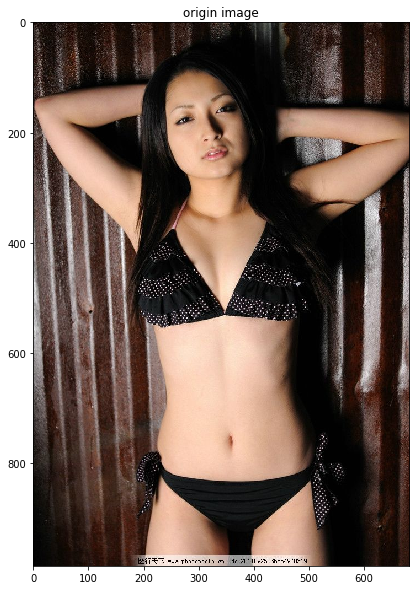

In [2]:
origin_image = cv2.imread('images/color_image.jpg')
# opencv以BGR模式加载彩色图片，而matplotlib以RGB模式显示，需转换
origin_image = cv2.cvtColor(origin_image, cv2.COLOR_BGR2RGB)
#grayImage = cv2.cvtColor(origin_image,cv2.COLOR_BGR2GRAY) #灰度变换 
print('origin_image shape',origin_image.shape)
#显示图像
plt.figure(figsize=(20,10))
plt.imshow(origin_image)
plt.title("origin image")

In [3]:
# 添加椒盐噪声的函数
# srcImage 源图片
# 加噪百分比
# return noiseImg 加完椒盐噪声的图片
def SaltAndPepperNoise(srcImage,percentage):
    noiseImg = srcImage
    #print(noiseImg[0,0])
    #noiseImg[0,0] = 0
    #print(noiseImg[0,0])
    noiseNum = int(percentage * srcImage.shape[0] * srcImage.shape[1])
    print('noiseNum %s' % (noiseNum))
    for i in range (noiseNum):
        randX=np.random.randint(0,srcImage.shape[0]) 
        randY=np.random.randint(0,srcImage.shape[1]) 
        randInt = np.random.randint(0,2)
#         print('randInt',randInt)
        if randInt == 0:
            noiseImg[randX,randY] = 0
        else:
            noiseImg[randX,randY] = 255
    return noiseImg

noiseNum 20223


Text(0.5,1,'saltAndPepper Noise image')

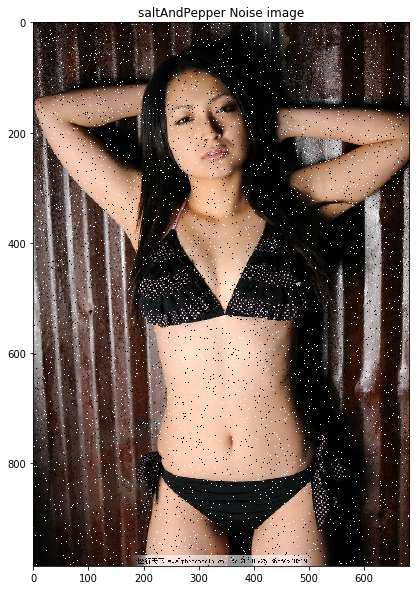

In [4]:
saltAndPepperImage = SaltAndPepperNoise(origin_image, 0.03)
plt.figure(figsize=(20,10))
# plt.subplot(2, 3, 2)
plt.imshow(saltAndPepperImage)
plt.title("saltAndPepper Noise image")

In [5]:
def GaussianNoise(srcImage,percentage):
    noiseImg = srcImage
    noiseNum = int(percentage * srcImage.shape[0] * srcImage.shape[1])
    print('noiseNum %s' % (noiseNum))
    for i in range (noiseNum):
        randX=np.random.randint(0,srcImage.shape[0]) 
        randY=np.random.randint(0,srcImage.shape[1]) 
        noiseImg[randX,randY] = 255
    return noiseImg

noiseNum 20223


Text(0.5,1,'Gaussian noise image')

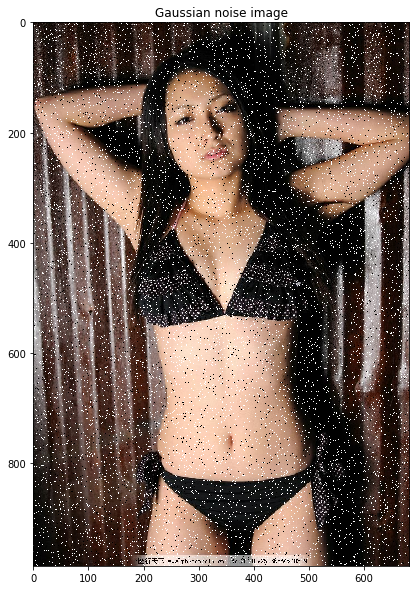

In [6]:
gaussianImage = GaussianNoise(origin_image, 0.03)
plt.figure(figsize=(20,10))
# plt.subplot(2, 3, 2)
plt.imshow(gaussianImage)
plt.title("Gaussian noise image")

In [7]:
meanFilter = np.array([[1,1,1],
                        [1,1,1],
                        [1,1,1]])
count = meanFilter.shape[1] * meanFilter.shape[1]
print(count)

9


In [8]:
#r,g,b = cv2.split(saltAndPepperImage)

In [11]:
def handleImageByFilter(image,filter):
    count = filter.shape[1] * filter.shape[1]
    rows,cols = image.shape[0],image.shape[1]
    print('rows= %s, cols=%s'%(rows,cols))
    a_slice_prev = image[0:3,0:3,:] 
#     print('rows %s cols %s ' % (rows,cols))
    print(a_slice_prev)
    for i in range(rows-2):
        for j in range(cols-2):
            a_slice = image[i:i+3,j:j+3,:] 
            #print(a_slice)
            s =  np.multiply(a_slice,filter) 
           # print('s %s'%s)
            s = np.sum(s,axis=1)
            s = np.sum(s,axis=0)
            s = np.multiply(s,1/count)
            print('sum %s'%s)

        
    
    

In [ ]:
handleImageByFilter(gaussianImage,meanFilter)

rows= 987, cols=683
[[[92 81 77]
  [29 18 14]
  [22 11  7]]

 [[31 20 16]
  [39 28 24]
  [44 33 29]]

 [[17  6  2]
  [28 17 13]
  [18  7  3]]]
sum [35.55555556 24.55555556 20.55555556]
sum [52.66666667 43.22222222 40.11111111]
sum [49.77777778 40.33333333 37.44444444]
sum [49.66666667 40.22222222 37.33333333]
sum [25.11111111 14.11111111 10.33333333]
sum [32.44444444 21.44444444 17.44444444]
sum [39.44444444 28.44444444 24.44444444]
sum [38.55555556 28.77777778 25.22222222]
sum [32.88888889 23.11111111 19.55555556]
sum [28.88888889 19.11111111 15.55555556]
sum [30.88888889 19.88888889 15.88888889]
sum [30.77777778 19.77777778 15.77777778]
sum [25.11111111 14.11111111 10.11111111]
sum [25.77777778 14.77777778 10.77777778]
sum [29.55555556 17.88888889 14.11111111]
sum [42.77777778 30.77777778 27.11111111]
sum [66.11111111 55.33333333 52.33333333]
sum [59.77777778 49.88888889 46.66666667]
sum [48.         39.11111111 35.44444444]
sum [26.22222222 16.77777778 12.11111111]
sum [31.44444444 

sum [72.11111111 55.88888889 49.55555556]
sum [74.11111111 56.66666667 49.77777778]
sum [65.55555556 49.11111111 42.55555556]
sum [35.88888889 18.22222222 10.55555556]
sum [55.22222222 40.55555556 33.66666667]
sum [52.22222222 38.22222222 31.88888889]
sum [75.77777778 64.55555556 59.55555556]
sum [49.44444444 37.22222222 31.77777778]
sum [72.66666667 64.22222222 60.22222222]
sum [46.22222222 37.         32.33333333]
sum [46.11111111 37.55555556 33.55555556]
sum [22.22222222 11.22222222  6.55555556]
sum [22.66666667 11.          6.33333333]
sum [22.77777778 10.44444444  4.44444444]
sum [24.55555556 10.22222222  3.22222222]
sum [26.33333333 10.66666667  3.        ]
sum [29.         11.66666667  3.33333333]
sum [30.55555556 12.88888889  3.55555556]
sum [27.88888889 11.88888889  3.        ]
sum [24.44444444 10.44444444  2.66666667]
sum [23.88888889 10.22222222  3.11111111]
sum [51.33333333 38.55555556 31.66666667]
sum [53.55555556 39.77777778 33.44444444]
sum [52.         39.55555556 33.88

sum [21.88888889 16.         11.55555556]
sum [20.66666667 13.33333333 10.11111111]
sum [19.55555556 11.55555556  8.88888889]
sum [25.44444444 16.77777778 14.66666667]
sum [30.         20.66666667 18.88888889]
sum [27.88888889 18.22222222 16.66666667]
sum [23.11111111 13.44444444 11.66666667]
sum [21.22222222 11.55555556  9.77777778]
sum [26.55555556 16.88888889 15.11111111]
sum [39.44444444 29.44444444 27.66666667]
sum [48.88888889 38.55555556 36.77777778]
sum [51.44444444 40.44444444 38.44444444]
sum [46. 35. 33.]
sum [63.66666667 53.88888889 52.11111111]
sum [63.66666667 53.88888889 52.11111111]
sum [63.11111111 52.33333333 50.22222222]
sum [40.77777778 27.77777778 25.11111111]
sum [39.33333333 25.33333333 22.33333333]
sum [34.88888889 20.88888889 18.        ]
sum [32.44444444 18.77777778 15.11111111]
sum [35.11111111 21.77777778 17.11111111]
sum [38.44444444 24.77777778 19.33333333]
sum [36.22222222 22.22222222 17.44444444]
sum [34.         19.33333333 15.11111111]
sum [41.        

sum [40.22222222 27.66666667 23.88888889]
sum [37.11111111 24.         20.11111111]
sum [38.55555556 24.88888889 20.33333333]
sum [39.44444444 25.77777778 20.66666667]
sum [36.         21.88888889 16.        ]
sum [36.44444444 21.88888889 15.77777778]
sum [38.44444444 22.77777778 16.22222222]
sum [38.88888889 22.55555556 15.77777778]
sum [38.44444444 21.44444444 14.22222222]
sum [38.55555556 21.55555556 14.11111111]
sum [39.55555556 22.55555556 14.88888889]
sum [42.11111111 26.         18.11111111]
sum [41.44444444 26.66666667 18.66666667]
sum [72.88888889 61.55555556 54.11111111]
sum [75.77777778 64.88888889 57.55555556]
sum [80.         69.11111111 61.77777778]
sum [50.         36.33333333 28.66666667]
sum [45.77777778 31.22222222 23.88888889]
sum [43.88888889 27.55555556 21.55555556]
sum [57.         39.55555556 34.55555556]
sum [66.22222222 47.77777778 43.77777778]
sum [69.33333333 50.88888889 46.88888889]
sum [59.55555556 41.22222222 37.22222222]
sum [51.77777778 34.33333333 30.11

sum [65.11111111 50.66666667 42.88888889]
sum [70.22222222 55.         47.33333333]
sum [69.77777778 54.88888889 46.88888889]
sum [57.44444444 43.66666667 36.11111111]
sum [41.55555556 29.88888889 23.33333333]
sum [35.77777778 26.         21.33333333]
sum [55.77777778 49.22222222 46.11111111]
sum [48.44444444 44.33333333 42.88888889]
sum [38.22222222 36.77777778 36.55555556]
sum [8.         7.66666667 8.55555556]
sum [8.         8.66666667 9.88888889]
sum [8.22222222 8.88888889 9.66666667]
sum [6.55555556 7.         6.66666667]
sum [8.22222222 7.22222222 5.44444444]
sum [39.22222222 37.55555556 34.88888889]
sum [47.22222222 43.88888889 39.88888889]
sum [47.88888889 44.11111111 39.33333333]
sum [18.88888889 15.          9.77777778]
sum [13.         10.44444444  5.55555556]
sum [10.33333333  8.88888889  4.44444444]
sum [8.         7.11111111 3.22222222]
sum [8.22222222 7.33333333 3.44444444]
sum [7.66666667 6.77777778 2.88888889]
sum [7.66666667 6.66666667 2.33333333]
sum [7.22222222 6.2

sum [19.44444444 10.44444444  5.44444444]
sum [45.11111111 37.11111111 32.66666667]
sum [71.88888889 64.88888889 61.        ]
sum [71.44444444 64.44444444 60.55555556]
sum [44.44444444 36.44444444 32.        ]
sum [18.77777778  9.77777778  4.77777778]
sum [20.44444444 11.44444444  6.44444444]
sum [20.88888889 11.88888889  8.11111111]
sum [22.44444444 13.11111111 10.33333333]
sum [35.         25.         23.22222222]
sum [69.         58.33333333 56.33333333]
sum [92.66666667 80.66666667 78.33333333]
sum [86.         73.         70.33333333]
sum [62.88888889 48.55555556 45.44444444]
sum [72.66666667 59.66666667 56.44444444]
sum [82.33333333 68.33333333 63.77777778]
sum [87.55555556 72.88888889 67.11111111]
sum [64.66666667 46.66666667 39.66666667]
sum [83.77777778 67.         60.77777778]
sum [81.         62.22222222 56.33333333]
sum [77.22222222 57.44444444 51.88888889]
sum [52.66666667 29.66666667 23.        ]
sum [56.22222222 33.22222222 25.88888889]
sum [60.44444444 37.44444444 30.11

sum [9.88888889 5.88888889 2.88888889]
sum [38.         35.11111111 32.66666667]
sum [39.66666667 36.77777778 34.33333333]
sum [42.77777778 38.66666667 34.66666667]
sum [20.55555556 13.55555556  8.        ]
sum [21.33333333 13.44444444  6.88888889]
sum [27.55555556 18.22222222 11.44444444]
sum [36.         24.77777778 17.66666667]
sum [47.77777778 33.33333333 25.88888889]
sum [56.         39.22222222 32.55555556]
sum [75.77777778 59.77777778 54.11111111]
sum [74.         56.44444444 51.44444444]
sum [67.77777778 49.55555556 44.88888889]
sum [45.44444444 24.66666667 19.55555556]
sum [70.55555556 60.77777778 57.22222222]
sum [79.44444444 69.66666667 66.11111111]
sum [82.77777778 73.         69.44444444]
sum [59.55555556 48.55555556 44.55555556]
sum [59.44444444 48.44444444 44.44444444]
sum [64.22222222 53.22222222 49.22222222]
sum [58.55555556 47.55555556 43.55555556]
sum [41.44444444 30.44444444 26.88888889]
sum [26.66666667 15.66666667 12.11111111]
sum [22.22222222 12.44444444  9.33333

sum [34.11111111 23.44444444 19.88888889]
sum [35.11111111 24.44444444 20.88888889]
sum [44.33333333 33.33333333 29.33333333]
sum [74.44444444 64.66666667 61.11111111]
sum [75.22222222 65.44444444 61.88888889]
sum [71.77777778 62.         58.44444444]
sum [45.77777778 34.77777778 30.77777778]
sum [43.77777778 32.77777778 28.77777778]
sum [37.66666667 26.66666667 22.77777778]
sum [34.77777778 23.77777778 20.55555556]
sum [31.88888889 20.88888889 18.33333333]
sum [35.66666667 24.66666667 22.66666667]
sum [35.55555556 24.55555556 22.55555556]
sum [35.         24.         21.33333333]
sum [33.88888889 22.88888889 19.55555556]
sum [36.88888889 24.88888889 21.22222222]
sum [45.         32.         28.66666667]
sum [51.33333333 37.66666667 33.66666667]
sum [53.44444444 40.11111111 35.11111111]
sum [50.33333333 36.66666667 31.        ]
sum [43.11111111 28.77777778 23.44444444]
sum [43.11111111 28.11111111 23.11111111]
sum [42.55555556 27.55555556 22.55555556]
sum [43.         29.66666667 24.77

sum [25.55555556 13.22222222  9.66666667]
sum [24.33333333 11.33333333  8.        ]
sum [24.22222222 11.88888889  8.33333333]
sum [23.88888889 12.22222222  8.44444444]
sum [48.33333333 38.55555556 35.        ]
sum [47.22222222 37.66666667 34.        ]
sum [45.77777778 36.88888889 32.88888889]
sum [72.11111111 64.66666667 61.        ]
sum [71.66666667 64.88888889 60.88888889]
sum [69.22222222 63.66666667 60.11111111]
sum [17.33333333 10.44444444  5.44444444]
sum [18.55555556 12.11111111  7.        ]
sum [45.77777778 39.66666667 35.11111111]
sum [46.66666667 40.55555556 36.        ]
sum [47.77777778 41.44444444 37.        ]
sum [33.11111111 25.66666667 20.        ]
sum [46.11111111 38.         32.66666667]
sum [56.11111111 47.33333333 42.22222222]
sum [56.22222222 46.11111111 41.11111111]
sum [74.55555556 64.33333333 59.77777778]
sum [93.77777778 83.66666667 79.44444444]
sum [93.         81.77777778 77.33333333]
sum [68.22222222 54.66666667 49.33333333]
sum [48.66666667 33.22222222 26.77

sum [33.55555556 17.         10.        ]
sum [32.11111111 17.22222222 11.        ]
sum [36.11111111 20.55555556 14.55555556]
sum [49.         32.77777778 27.11111111]
sum [61.11111111 42.         35.55555556]
sum [57.66666667 38.44444444 32.55555556]
sum [42.55555556 23.         16.77777778]
sum [32.11111111 12.55555556  6.        ]
sum [33.11111111 12.11111111  4.88888889]
sum [37.11111111 15.11111111  7.55555556]
sum [40.44444444 17.44444444  9.88888889]
sum [43.77777778 20.77777778 12.77777778]
sum [43.66666667 20.66666667 12.66666667]
sum [43.11111111 20.11111111 12.11111111]
sum [42.22222222 18.55555556 10.88888889]
sum [42.22222222 17.88888889 10.55555556]
sum [47.55555556 22.55555556 15.55555556]
sum [69.         49.55555556 44.11111111]
sum [74.88888889 55.44444444 50.        ]
sum [71.         52.22222222 46.44444444]
sum [49.         26.22222222 19.88888889]
sum [40.44444444 19.88888889 13.77777778]
sum [36.22222222 17.66666667 11.88888889]
sum [38.66666667 21.22222222 14.44

sum [38.55555556 19.33333333 12.66666667]
sum [43.44444444 24.33333333 18.        ]
sum [52.33333333 33.33333333 27.33333333]
sum [58.55555556 39.55555556 33.55555556]
sum [60.22222222 41.88888889 35.55555556]
sum [61.66666667 44.         37.33333333]
sum [63.88888889 47.55555556 41.22222222]
sum [86.55555556 72.55555556 67.44444444]
sum [79.77777778 67.11111111 62.33333333]
sum [67.55555556 55.55555556 50.44444444]
sum [34.11111111 21.77777778 15.77777778]
sum [27.         15.33333333  9.33333333]
sum [23.22222222 12.22222222  6.88888889]
sum [47.22222222 37.44444444 33.22222222]
sum [70.77777778 62.66666667 59.33333333]
sum [68.88888889 61.44444444 57.66666667]
sum [42.55555556 34.11111111 29.33333333]
sum [16.22222222  6.55555556  0.33333333]
sum [43.77777778 34.88888889 29.        ]
sum [44.44444444 35.55555556 29.44444444]
sum [45.         36.33333333 30.44444444]
sum [19.11111111  9.66666667  2.88888889]
sum [19.22222222 10.44444444  3.33333333]
sum [45.44444444 37.66666667 31.33

sum [44.77777778 45.         40.55555556]
sum [20.11111111 19.77777778 14.77777778]
sum [49.66666667 49.         43.88888889]
sum [58.         57.66666667 51.55555556]
sum [64.22222222 64.22222222 58.        ]
sum [55.77777778 55.77777778 48.66666667]
sum [67.11111111 66.44444444 58.88888889]
sum [82.         80.44444444 71.        ]
sum [84.11111111 80.44444444 69.88888889]
sum [102.55555556  97.55555556  87.77777778]
sum [99.22222222 91.11111111 80.77777778]
sum [92.88888889 82.33333333 71.11111111]
sum [64.22222222 50.11111111 36.77777778]
sum [51.77777778 36.         22.11111111]
sum [42.11111111 24.88888889 11.22222222]
sum [41.33333333 23.66666667 12.        ]
sum [43.         25.22222222 15.55555556]
sum [40.33333333 23.88888889 16.22222222]
sum [31.33333333 18.         10.88888889]
sum [51.66666667 41.66666667 36.        ]
sum [48.88888889 40.55555556 35.44444444]
sum [52.33333333 43.88888889 38.77777778]
sum [25.66666667 16.11111111 10.        ]
sum [30.55555556 19.66666667 12

sum [47.77777778 27.77777778 20.77777778]
sum [42.88888889 22.88888889 15.88888889]
sum [41.77777778 21.77777778 14.77777778]
sum [42.11111111 22.11111111 15.11111111]
sum [46.11111111 26.11111111 19.11111111]
sum [48.66666667 28.66666667 21.66666667]
sum [50.88888889 30.88888889 23.88888889]
sum [48.88888889 28.88888889 21.88888889]
sum [48.11111111 28.11111111 21.11111111]
sum [50.88888889 30.88888889 23.88888889]
sum [52.22222222 32.22222222 25.22222222]
sum [48.88888889 28.55555556 22.44444444]
sum [43.77777778 23.11111111 17.66666667]
sum [41.44444444 20.66666667 15.77777778]
sum [45.88888889 25.55555556 20.22222222]
sum [56.22222222 36.55555556 30.88888889]
sum [68.33333333 49.55555556 43.44444444]
sum [71.11111111 52.88888889 47.33333333]
sum [61.         44.11111111 38.88888889]
sum [74.         59.88888889 55.66666667]
sum [72.22222222 59.77777778 54.88888889]
sum [77.88888889 66.77777778 61.55555556]
sum [69.22222222 57.55555556 51.55555556]
sum [86.         75.66666667 70.  

sum [58.11111111 39.11111111 32.        ]
sum [38.22222222 21.55555556 14.55555556]
sum [27.33333333 14.33333333  6.66666667]
sum [25.44444444 15.11111111  7.55555556]
sum [24.         15.          7.33333333]
sum [22.33333333 13.33333333  6.44444444]
sum [47.55555556 39.55555556 33.44444444]
sum [47.         39.         32.88888889]
sum [47.         39.         32.77777778]
sum [24.         15.          8.66666667]
sum [48.33333333 41.33333333 36.77777778]
sum [51.55555556 44.55555556 40.66666667]
sum [76.55555556 70.55555556 67.22222222]
sum [52.33333333 44.         40.77777778]
sum [48.33333333 39.66666667 37.44444444]
sum [18.55555556  9.66666667  8.11111111]
sum [21.11111111 12.22222222 10.44444444]
sum [23.         14.44444444 11.66666667]
sum [52.33333333 44.         40.55555556]
sum [52.44444444 44.44444444 40.        ]
sum [51.77777778 43.77777778 39.33333333]
sum [23.55555556 14.55555556  9.55555556]
sum [20.44444444 11.44444444  6.44444444]
sum [18.33333333  9.33333333  4.33

sum [9.33333333 7.         2.        ]
sum [9.33333333 6.33333333 1.33333333]
sum [9.11111111 6.11111111 1.11111111]
sum [9.44444444 6.44444444 1.44444444]
sum [10.  7.  2.]
sum [11.66666667  8.          3.33333333]
sum [12.          7.66666667  3.33333333]
sum [11.44444444  6.44444444  2.44444444]
sum [37.22222222 32.77777778 29.22222222]
sum [38.77777778 33.33333333 30.11111111]
sum [41.88888889 35.44444444 32.55555556]
sum [16.88888889  8.88888889  5.88888889]
sum [16.22222222  8.55555556  5.44444444]
sum [13.          6.22222222  3.11111111]
sum [12.33333333  6.44444444  3.        ]
sum [13.22222222  7.88888889  4.22222222]
sum [14.77777778  8.66666667  5.        ]
sum [14.33333333  7.66666667  3.55555556]
sum [16.          8.11111111  3.66666667]
sum [20.66666667 11.44444444  6.        ]
sum [25.77777778 14.55555556  8.88888889]
sum [34.77777778 21.11111111 14.77777778]
sum [38.33333333 24.77777778 18.88888889]
sum [37.11111111 23.66666667 18.22222222]
sum [33.55555556 18.88888889

sum [28.33333333 29.33333333 26.        ]
sum [25.33333333 26.88888889 25.        ]
sum [49.44444444 51.88888889 50.44444444]
sum [50.55555556 53.         51.55555556]
sum [60.44444444 62.66666667 60.44444444]
sum [53.33333333 55.33333333 52.33333333]
sum [67.88888889 69.88888889 66.88888889]
sum [67. 69. 66.]
sum [49.77777778 51.77777778 48.77777778]
sum [33.11111111 35.11111111 32.11111111]
sum [28.88888889 30.88888889 27.88888889]
sum [30.44444444 32.44444444 29.44444444]
sum [34.77777778 36.77777778 33.77777778]
sum [40.22222222 42.22222222 39.22222222]
sum [45.11111111 47.11111111 44.11111111]
sum [48. 50. 47.]
sum [48.22222222 50.22222222 47.22222222]
sum [70.88888889 72.66666667 70.        ]
sum [70.11111111 71.88888889 68.55555556]
sum [93.66666667 95.22222222 91.77777778]
sum [75.44444444 77.55555556 72.44444444]
sum [88.         90.44444444 84.66666667]
sum [75.55555556 78.55555556 71.55555556]
sum [79.88888889 82.55555556 76.22222222]
sum [77.33333333 79.66666667 74.        

sum [49.88888889 31.22222222 23.88888889]
sum [40.88888889 25.11111111 18.33333333]
sum [32.55555556 18.11111111 11.44444444]
sum [25.55555556 11.77777778  5.66666667]
sum [24.77777778 10.44444444  4.11111111]
sum [24.77777778 11.11111111  5.        ]
sum [25.88888889 13.55555556  7.55555556]
sum [25.11111111 13.44444444  7.77777778]
sum [21.44444444 10.44444444  5.55555556]
sum [45.77777778 36.         32.22222222]
sum [46.77777778 36.33333333 32.33333333]
sum [74.66666667 65.         60.55555556]
sum [52.44444444 39.55555556 33.66666667]
sum [56.22222222 42.         35.33333333]
sum [33.         15.66666667  7.33333333]
sum [33.22222222 15.55555556  6.22222222]
sum [33.55555556 15.55555556  5.55555556]
sum [34.44444444 16.44444444  6.44444444]
sum [33.11111111 15.44444444  6.11111111]
sum [30.33333333 14.          5.        ]
sum [78.77777778 66.77777778 60.55555556]
sum [76.55555556 65.88888889 60.33333333]
sum [75.44444444 65.77777778 61.88888889]
sum [23.33333333 11.66666667  7.  

sum [27.11111111 19.11111111 16.11111111]
sum [22.22222222 14.22222222 11.22222222]
sum [20.         11.33333333  8.66666667]
sum [22.88888889 13.55555556 11.22222222]
sum [26.88888889 16.88888889 14.88888889]
sum [26.33333333 16.33333333 14.33333333]
sum [50.         41.44444444 39.88888889]
sum [51.77777778 43.22222222 41.66666667]
sum [84.22222222 76.55555556 75.22222222]
sum [67.55555556 58.11111111 56.33333333]
sum [74.22222222 64.44444444 62.66666667]
sum [52.33333333 41.66666667 39.88888889]
sum [48.55555556 37.88888889 36.11111111]
sum [45.22222222 34.55555556 32.77777778]
sum [66.44444444 56.         54.        ]
sum [78.33333333 67.22222222 64.77777778]
sum [88.22222222 76.11111111 73.33333333]
sum [67.88888889 54.22222222 51.11111111]
sum [51.77777778 38.44444444 35.11111111]
sum [61.         49.77777778 46.77777778]
sum [62.44444444 50.88888889 47.22222222]
sum [74.         61.88888889 58.44444444]
sum [80.55555556 67.66666667 63.77777778]
sum [101.11111111  89.88888889  86

sum [59.66666667 39.33333333 34.        ]
sum [50.88888889 33.33333333 28.33333333]
sum [47.44444444 30.66666667 26.        ]
sum [49.55555556 32.88888889 28.88888889]
sum [50.77777778 32.44444444 29.11111111]
sum [55.55555556 37.44444444 34.55555556]
sum [52.44444444 35.22222222 32.77777778]
sum [52.55555556 36.33333333 34.        ]
sum [51.44444444 35.77777778 33.77777778]
sum [60.         44.33333333 42.33333333]
sum [76.11111111 59.66666667 56.77777778]
sum [74.33333333 59.77777778 55.88888889]
sum [96.         82.55555556 78.22222222]
sum [108.77777778  94.88888889  89.88888889]
sum [137.22222222 122.77777778 118.22222222]
sum [108.88888889  92.33333333  87.33333333]
sum [96.33333333 79.55555556 75.33333333]
sum [77.55555556 58.55555556 54.11111111]
sum [76.55555556 57.88888889 53.88888889]
sum [62.88888889 45.22222222 41.        ]
sum [49.88888889 33.55555556 29.        ]
sum [48.88888889 34.66666667 29.44444444]
sum [100.44444444  90.33333333  86.22222222]
sum [128.66666667 121.

sum [67.         63.22222222 60.77777778]
sum [66.66666667 62.55555556 59.33333333]
sum [86.44444444 82.77777778 79.66666667]
sum [56.44444444 52.66666667 49.        ]
sum [78.66666667 75.77777778 72.22222222]
sum [52.55555556 49.         45.22222222]
sum [76.         72.55555556 69.33333333]
sum [46. 42. 39.]
sum [69.22222222 65.66666667 62.88888889]
sum [68.33333333 65.77777778 62.77777778]
sum [64.88888889 62.55555556 59.66666667]
sum [36.22222222 34.55555556 31.55555556]
sum [8.66666667 7.44444444 4.77777778]
sum [8.55555556 8.33333333 5.88888889]
sum [35.55555556 35.55555556 33.77777778]
sum [33.77777778 33.77777778 32.        ]
sum [32.11111111 32.         30.11111111]
sum [3.88888889 3.55555556 1.66666667]
sum [4.55555556 4.11111111 2.        ]
sum [5.66666667 5.22222222 2.88888889]
sum [7.55555556 7.22222222 4.33333333]
sum [8.         7.66666667 4.66666667]
sum [35.66666667 35.44444444 32.66666667]
sum [36.55555556 36.33333333 33.55555556]
sum [37.22222222 37.         34.22222

sum [19.22222222  9.77777778  3.66666667]
sum [18.66666667  9.66666667  3.77777778]
sum [17.77777778  8.77777778  3.33333333]
sum [18.22222222  9.22222222  4.22222222]
sum [19.88888889 10.88888889  5.88888889]
sum [20.11111111 11.          6.33333333]
sum [19.88888889 10.66666667  6.33333333]
sum [21.33333333 11.44444444  7.66666667]
sum [24.22222222 14.11111111 10.77777778]
sum [34.66666667 23.66666667 20.22222222]
sum [46.33333333 35.         31.        ]
sum [52.44444444 39.88888889 34.88888889]
sum [56.22222222 43.11111111 37.66666667]
sum [66.88888889 52.55555556 46.88888889]
sum [80.11111111 64.88888889 59.        ]
sum [79.66666667 63.11111111 56.88888889]
sum [66.77777778 49.22222222 42.66666667]
sum [58.55555556 40.         33.44444444]
sum [57.77777778 38.66666667 32.22222222]
sum [59.66666667 39.77777778 33.66666667]
sum [58.44444444 38.55555556 32.11111111]
sum [58.11111111 38.44444444 31.55555556]
sum [52.44444444 33.55555556 26.        ]
sum [48.33333333 29.44444444 21.77

sum [16.33333333 10.22222222  7.88888889]
sum [18.88888889 12.33333333 10.11111111]
sum [23.55555556 14.22222222 12.22222222]
sum [27.66666667 14.55555556 12.33333333]
sum [35.66666667 19.22222222 16.        ]
sum [43.22222222 25.33333333 21.11111111]
sum [59.11111111 40.11111111 35.        ]
sum [68.44444444 48.77777778 43.55555556]
sum [75.         54.66666667 49.        ]
sum [72.55555556 52.22222222 46.22222222]
sum [71.55555556 51.44444444 45.        ]
sum [75.22222222 55.44444444 48.88888889]
sum [69.         51.77777778 46.        ]
sum [55.88888889 44.88888889 42.88888889]
sum [63.88888889 52.88888889 50.88888889]
sum [71.22222222 60.22222222 57.55555556]
sum [73.33333333 62.33333333 59.        ]
sum [90.22222222 80.44444444 76.88888889]
sum [85.         75.22222222 71.66666667]
sum [86.44444444 76.66666667 72.44444444]
sum [74.66666667 63.66666667 58.33333333]
sum [100.22222222  90.44444444  85.11111111]
sum [87.22222222 77.44444444 72.11111111]
sum [73.77777778 64.         58

sum [34. 23. 19.]
sum [40.         29.66666667 25.33333333]
sum [64.77777778 56.11111111 52.        ]
sum [84.11111111 77.11111111 73.22222222]
sum [82.         75.         71.11111111]
sum [60.         52.         47.55555556]
sum [36. 27. 22.]
sum [37.88888889 28.55555556 24.55555556]
sum [40.66666667 31.         28.        ]
sum [40.22222222 30.22222222 28.22222222]
sum [38.44444444 28.44444444 26.44444444]
sum [37.33333333 27.         24.33333333]
sum [39.         28.33333333 25.        ]
sum [62.11111111 51.66666667 48.33333333]
sum [58.22222222 46.77777778 43.77777778]
sum [56.66666667 44.55555556 40.88888889]
sum [38.11111111 24.77777778 19.77777778]
sum [45.11111111 31.44444444 25.77777778]
sum [51.33333333 37.         31.66666667]
sum [55.77777778 39.77777778 35.11111111]
sum [52.88888889 35.88888889 31.55555556]
sum [47.88888889 30.22222222 25.22222222]
sum [41.88888889 24.11111111 18.33333333]
sum [45.55555556 27.         20.44444444]
sum [54.         33.66666667 27.55555556

sum [51.33333333 43.33333333 37.11111111]
sum [51.55555556 44.         38.        ]
sum [49.66666667 42.33333333 36.44444444]
sum [45.11111111 38.44444444 32.88888889]
sum [42.66666667 36.22222222 30.77777778]
sum [15.22222222  8.66666667  3.11111111]
sum [15.88888889  9.77777778  4.66666667]
sum [14.22222222  8.77777778  4.33333333]
sum [13.22222222  8.          3.77777778]
sum [40.         35.55555556 32.        ]
sum [39.55555556 35.66666667 32.55555556]
sum [40.11111111 36.44444444 33.55555556]
sum [15.55555556 11.66666667  8.33333333]
sum [48.66666667 45.22222222 41.22222222]
sum [55.88888889 52.88888889 47.66666667]
sum [64.22222222 60.88888889 55.        ]
sum [44.66666667 40.33333333 34.        ]
sum [74.33333333 69.44444444 64.11111111]
sum [74.33333333 68.55555556 63.33333333]
sum [74.55555556 67.44444444 62.55555556]
sum [52.44444444 43.88888889 38.66666667]
sum [49.77777778 40.77777778 35.77777778]
sum [49.55555556 40.55555556 35.55555556]
sum [65.66666667 58.11111111 53.44

sum [35.66666667 18.66666667 11.66666667]
sum [35.88888889 20.77777778 14.33333333]
sum [40.44444444 24.66666667 18.22222222]
sum [41.22222222 25.11111111 18.77777778]
sum [65.44444444 48.88888889 43.11111111]
sum [108.22222222  96.          92.        ]
sum [108.66666667  95.77777778  91.        ]
sum [86.66666667 71.33333333 64.77777778]
sum [42.11111111 22.11111111 13.11111111]
sum [43.44444444 23.44444444 14.44444444]
sum [44.11111111 23.77777778 14.88888889]
sum [44.22222222 23.55555556 14.77777778]
sum [42.77777778 21.11111111 12.66666667]
sum [41.66666667 19.33333333 11.11111111]
sum [44.55555556 21.33333333 13.44444444]
sum [54.33333333 30.88888889 23.11111111]
sum [66.33333333 42.66666667 35.        ]
sum [72.88888889 49.         41.44444444]
sum [77.88888889 52.88888889 44.88888889]
sum [75.33333333 49.55555556 41.        ]
sum [71.11111111 45.44444444 36.        ]
sum [59.44444444 35.66666667 25.55555556]
sum [47.22222222 27.66666667 18.66666667]
sum [42.44444444 25.22222222

sum [61.         43.77777778 38.66666667]
sum [66.33333333 46.88888889 41.        ]
sum [86.88888889 70.66666667 65.66666667]
sum [85.55555556 70.22222222 65.        ]
sum [82.         67.22222222 61.88888889]
sum [59.77777778 43.77777778 37.33333333]
sum [32.55555556 15.88888889  8.55555556]
sum [30.77777778 15.44444444  8.11111111]
sum [27.66666667 14.          6.33333333]
sum [26.55555556 14.44444444  6.77777778]
sum [23.88888889 13.55555556  5.77777778]
sum [20.11111111 11.          3.55555556]
sum [17.77777778  9.44444444  1.88888889]
sum [17.33333333  9.77777778  2.11111111]
sum [17.44444444 10.11111111  2.33333333]
sum [17.77777778  9.88888889  1.66666667]
sum [18.22222222  9.22222222  0.66666667]
sum [18.55555556  8.44444444  0.44444444]
sum [18.22222222  7.55555556  0.55555556]
sum [17.77777778  6.77777778  0.77777778]
sum [44.11111111 34.33333333 29.        ]
sum [42.22222222 34.11111111 29.22222222]
sum [42.44444444 35.         29.77777778]
sum [42.22222222 35.22222222 30.22

sum [17.66666667 18.66666667 13.33333333]
sum [47.         47.88888889 42.88888889]
sum [56.44444444 57.33333333 52.        ]
sum [70.77777778 71.66666667 65.66666667]
sum [58.77777778 59.44444444 51.66666667]
sum [67.55555556 67.88888889 58.33333333]
sum [72.77777778 72.11111111 61.22222222]
sum [75.88888889 74.11111111 62.33333333]
sum [75.88888889 72.33333333 60.44444444]
sum [72.11111111 66.77777778 54.66666667]
sum [89.55555556 83.11111111 72.44444444]
sum [107.55555556 100.44444444  91.        ]
sum [98.77777778 89.66666667 80.44444444]
sum [68.         56.11111111 45.88888889]
sum [63.44444444 50.22222222 40.44444444]
sum [63.         48.55555556 39.66666667]
sum [59.44444444 44.55555556 36.77777778]
sum [29.77777778 13.22222222  5.77777778]
sum [50.77777778 36.33333333 30.33333333]
sum [51.         37.         31.77777778]
sum [77.11111111 65.55555556 61.22222222]
sum [51.77777778 39.77777778 35.88888889]
sum [52.55555556 41.88888889 38.33333333]
sum [29.22222222 18.11111111 14

sum [47.55555556 29.77777778 23.55555556]
sum [49.77777778 32.         25.77777778]
sum [51.55555556 31.55555556 24.55555556]
sum [51.77777778 31.77777778 24.77777778]
sum [57.55555556 37.55555556 30.55555556]
sum [60.33333333 40.33333333 33.33333333]
sum [56.22222222 36.22222222 29.22222222]
sum [54.55555556 34.55555556 27.55555556]
sum [79.55555556 61.77777778 55.55555556]
sum [83.44444444 65.66666667 59.44444444]
sum [79.55555556 61.77777778 55.55555556]
sum [57.66666667 37.66666667 30.66666667]
sum [61.44444444 41.44444444 34.44444444]
sum [111.22222222  95.66666667  90.22222222]
sum [103.88888889  88.66666667  83.22222222]
sum [96.66666667 81.77777778 76.33333333]
sum [53.44444444 34.44444444 27.77777778]
sum [59.55555556 40.55555556 34.22222222]
sum [59.88888889 41.55555556 35.22222222]
sum [63.22222222 45.55555556 38.88888889]
sum [84.77777778 69.44444444 63.88888889]
sum [92.66666667 77.         72.44444444]
sum [102.33333333  86.33333333  82.77777778]
sum [91.66666667 73.66666

sum [43.22222222 29.88888889 21.55555556]
sum [29.22222222 17.66666667 10.66666667]
sum [25.22222222 13.66666667  6.66666667]
sum [21.66666667 10.22222222  4.44444444]
sum [25.         12.11111111  5.33333333]
sum [26.         13.77777778  7.66666667]
sum [26.22222222 14.55555556  8.22222222]
sum [26.66666667 15.66666667 10.        ]
sum [23.33333333 12.33333333  6.88888889]
sum [24.44444444 14.11111111  8.        ]
sum [23.66666667 14.          7.55555556]
sum [23.77777778 14.77777778  8.44444444]
sum [23.88888889 14.88888889  9.22222222]
sum [25. 16. 11.]
sum [25.11111111 17.11111111 12.66666667]
sum [24.55555556 16.55555556 12.11111111]
sum [21.88888889 13.88888889  9.44444444]
sum [21.66666667 12.66666667  7.66666667]
sum [21.88888889 12.88888889  7.88888889]
sum [22.33333333 13.33333333  8.33333333]
sum [22. 13.  8.]
sum [20.66666667 11.66666667  6.66666667]
sum [19.22222222 10.22222222  5.44444444]
sum [17.55555556  8.77777778  4.55555556]
sum [19.66666667 10.88888889  6.66666667

sum [7.44444444 4.55555556 0.55555556]
sum [7.11111111 3.88888889 0.55555556]
sum [6.55555556 3.44444444 1.55555556]
sum [8.33333333 4.77777778 3.22222222]
sum [35.11111111 32.22222222 31.66666667]
sum [36.55555556 32.55555556 32.22222222]
sum [36.55555556 32.22222222 31.22222222]
sum [10.55555556  5.22222222  3.22222222]
sum [11.44444444  5.44444444  2.44444444]
sum [12.77777778  5.77777778  2.77777778]
sum [14.33333333  6.66666667  2.66666667]
sum [15.33333333  8.          3.        ]
sum [15.66666667  9.          3.88888889]
sum [15.66666667  9.33333333  5.22222222]
sum [41.55555556 36.44444444 33.44444444]
sum [41.11111111 35.66666667 32.66666667]
sum [40.88888889 34.44444444 31.33333333]
sum [15.33333333  6.66666667  3.22222222]
sum [18.11111111  7.77777778  4.22222222]
sum [47.22222222 37.22222222 33.66666667]
sum [54.55555556 42.88888889 38.88888889]
sum [57.88888889 45.44444444 41.33333333]
sum [39.         22.88888889 17.88888889]
sum [37.33333333 19.88888889 14.55555556]
sum 

sum [16.22222222 16.22222222 15.55555556]
sum [16.11111111 16.11111111 14.77777778]
sum [20.77777778 21.11111111 18.11111111]
sum [34.11111111 34.77777778 30.77777778]
sum [53.11111111 54.11111111 49.11111111]
sum [59.77777778 60.77777778 55.77777778]
sum [50.44444444 51.44444444 46.44444444]
sum [33.33333333 34.         30.        ]
sum [50.66666667 51.         48.22222222]
sum [49.11111111 49.11111111 47.33333333]
sum [50.11111111 50.11111111 48.33333333]
sum [50.55555556 50.55555556 49.22222222]
sum [50.22222222 50.22222222 49.55555556]
sum [50.44444444 50.44444444 50.44444444]
sum [51.77777778 51.77777778 51.77777778]
sum [54.77777778 54.77777778 54.77777778]
sum [55.55555556 55.55555556 55.55555556]
sum [54.44444444 54.88888889 54.66666667]
sum [56.33333333 57.44444444 56.88888889]
sum [65.33333333 67.11111111 66.22222222]
sum [51.44444444 53.44444444 52.44444444]
sum [55.77777778 57.77777778 56.77777778]
sum [52.88888889 54.88888889 53.88888889]
sum [49.55555556 51.55555556 50.55

sum [83.55555556 66.33333333 59.88888889]
sum [72.         55.66666667 50.        ]
sum [40.11111111 22.77777778 16.44444444]
sum [32.77777778 16.77777778 11.        ]
sum [27.22222222 12.22222222  6.66666667]
sum [23.66666667  9.44444444  4.33333333]
sum [49.44444444 37.33333333 32.55555556]
sum [51.88888889 39.33333333 34.        ]
sum [55.33333333 41.77777778 35.55555556]
sum [31.33333333 15.          7.77777778]
sum [55.77777778 40.88888889 34.44444444]
sum [55.33333333 40.22222222 34.        ]
sum [55.66666667 40.77777778 34.55555556]
sum [30.88888889 14.55555556  7.44444444]
sum [56.11111111 41.88888889 35.44444444]
sum [52.         39.66666667 33.88888889]
sum [49.77777778 37.44444444 31.66666667]
sum [24.33333333  9.88888889  3.44444444]
sum [53.11111111 38.44444444 32.11111111]
sum [53.77777778 38.66666667 32.44444444]
sum [53.11111111 38.         31.88888889]
sum [29.11111111 12.33333333  5.22222222]
sum [31.         15.11111111  7.55555556]
sum [31.         16.44444444  8.44

sum [19.44444444 10.66666667  6.77777778]
sum [22.11111111 13.33333333  9.44444444]
sum [29.55555556 19.88888889 15.77777778]
sum [38.77777778 28.44444444 24.11111111]
sum [39.33333333 28.33333333 24.33333333]
sum [38.44444444 27.77777778 24.22222222]
sum [45.11111111 33.44444444 30.22222222]
sum [56.         43.33333333 40.44444444]
sum [64.33333333 50.33333333 47.33333333]
sum [64.55555556 50.55555556 47.55555556]
sum [77.33333333 64.88888889 62.22222222]
sum [66.11111111 53.66666667 51.        ]
sum [81.77777778 71.11111111 68.22222222]
sum [95.22222222 84.77777778 81.        ]
sum [101.44444444  91.33333333  86.44444444]
sum [69.66666667 58.33333333 53.66666667]
sum [35.88888889 22.44444444 17.        ]
sum [34.77777778 20.66666667 15.        ]
sum [40.88888889 25.22222222 18.11111111]
sum [37.77777778 21.44444444 14.66666667]
sum [58.22222222 44.77777778 39.55555556]
sum [62.66666667 49.         43.66666667]
sum [68.         53.55555556 47.66666667]
sum [41.88888889 25.22222222 18

sum [39.33333333 18.33333333 14.11111111]
sum [60.         41.33333333 37.66666667]
sum [87.88888889 71.55555556 67.88888889]
sum [89.         72.66666667 68.77777778]
sum [91.88888889 75.55555556 71.66666667]
sum [65.11111111 46.44444444 42.        ]
sum [93.77777778 77.44444444 73.55555556]
sum [66.55555556 47.88888889 43.44444444]
sum [70.11111111 52.11111111 47.33333333]
sum [47.11111111 28.55555556 23.11111111]
sum [54.66666667 38.55555556 32.66666667]
sum [50.88888889 37.55555556 32.33333333]
sum [72.11111111 60.11111111 55.44444444]
sum [69.22222222 55.55555556 51.44444444]
sum [77.88888889 61.44444444 57.11111111]
sum [58.77777778 39.22222222 34.88888889]
sum [58.66666667 38.33333333 34.33333333]
sum [59.77777778 38.77777778 35.11111111]
sum [57.88888889 37.11111111 33.33333333]
sum [70.         49.88888889 45.77777778]
sum [72.11111111 52.77777778 48.33333333]
sum [72.11111111 54.         49.11111111]
sum [57.22222222 40.44444444 35.22222222]
sum [45.88888889 30.55555556 24.88

sum [12.33333333 12.55555556  9.88888889]
sum [11.11111111 11.44444444  8.44444444]
sum [ 9.88888889 10.11111111  7.44444444]
sum [9.77777778 9.88888889 7.55555556]
sum [10.22222222 10.22222222  8.66666667]
sum [9.22222222 9.22222222 8.11111111]
sum [6.77777778 6.77777778 6.33333333]
sum [4.55555556 4.55555556 4.33333333]
sum [3.33333333 3.33333333 3.77777778]
sum [2.66666667 2.66666667 3.55555556]
sum [30.22222222 30.22222222 31.33333333]
sum [30.         30.         31.11111111]
sum [30.         30.         31.33333333]
sum [2.22222222 2.22222222 4.        ]
sum [2.11111111 2.11111111 3.44444444]
sum [2.22222222 2.22222222 2.66666667]
sum [2.11111111 2.11111111 1.66666667]
sum [2.33333333 2.33333333 1.66666667]
sum [2.33333333 2.33333333 1.66666667]
sum [3.         3.         2.33333333]
sum [4.88888889 4.88888889 4.22222222]
sum [34.88888889 34.88888889 34.44444444]
sum [36.77777778 36.77777778 36.33333333]
sum [36.77777778 36.77777778 36.33333333]
sum [35.66666667 35.66666667 35.  

sum [44.22222222 37.22222222 32.66666667]
sum [45.88888889 37.88888889 32.77777778]
sum [46.22222222 38.22222222 33.77777778]
sum [20.33333333 11.33333333  6.33333333]
sum [19.88888889 10.88888889  6.11111111]
sum [21.77777778 12.77777778  8.        ]
sum [22.33333333 13.          9.        ]
sum [24.66666667 14.66666667 10.77777778]
sum [22.66666667 12.          7.88888889]
sum [27.77777778 16.77777778 11.55555556]
sum [57.77777778 47.55555556 42.33333333]
sum [68.11111111 57.22222222 51.88888889]
sum [77.77777778 65.55555556 60.55555556]
sum [60.         45.66666667 40.33333333]
sum [65.88888889 50.22222222 44.55555556]
sum [68.55555556 52.22222222 45.88888889]
sum [71.77777778 54.11111111 47.44444444]
sum [66.44444444 48.11111111 41.77777778]
sum [57.22222222 38.22222222 32.22222222]
sum [74.66666667 57.77777778 52.44444444]
sum [72.77777778 55.22222222 50.22222222]
sum [75.66666667 57.11111111 52.55555556]
sum [53.         31.         25.77777778]
sum [56.66666667 34.         27.77

sum [56.77777778 48.88888889 46.88888889]
sum [59.88888889 51.         48.33333333]
sum [66.44444444 56.44444444 53.11111111]
sum [81.66666667 70.55555556 66.        ]
sum [91.11111111 78.         72.44444444]
sum [61.55555556 45.66666667 39.11111111]
sum [81.11111111 65.33333333 59.11111111]
sum [101.77777778  87.22222222  81.77777778]
sum [110.          93.44444444  88.33333333]
sum [86.66666667 66.88888889 61.33333333]
sum [60.44444444 37.11111111 31.77777778]
sum [91.22222222 82.66666667 81.11111111]
sum [90.88888889 82.33333333 80.77777778]
sum [50.11111111 39.11111111 36.44444444]
sum [56.88888889 45.88888889 42.55555556]
sum [64.66666667 53.66666667 49.66666667]
sum [85.77777778 76.         72.44444444]
sum [80.11111111 70.33333333 66.11111111]
sum [74.         64.22222222 59.33333333]
sum [54.33333333 43.33333333 37.33333333]
sum [53.22222222 42.22222222 36.22222222]
sum [47.77777778 38.         32.66666667]
sum [38.55555556 28.77777778 23.44444444]
sum [33.33333333 25.        

sum [33.77777778 23.44444444 19.11111111]
sum [27.11111111 18.44444444 14.33333333]
sum [28.11111111 20.11111111 15.66666667]
sum [32.33333333 24.33333333 19.88888889]
sum [39.88888889 30.88888889 25.88888889]
sum [38.88888889 30.         25.55555556]
sum [36.         26.77777778 23.33333333]
sum [34.11111111 24.55555556 22.11111111]
sum [60.44444444 52.66666667 51.11111111]
sum [65.66666667 57.88888889 56.33333333]
sum [73.         64.88888889 62.66666667]
sum [53.77777778 43.11111111 39.77777778]
sum [51.         39.         35.33333333]
sum [53.77777778 40.77777778 37.44444444]
sum [56.66666667 43.         39.        ]
sum [59.11111111 45.77777778 40.77777778]
sum [59.11111111 45.44444444 39.77777778]
sum [51.33333333 37.         31.66666667]
sum [70.44444444 56.44444444 52.22222222]
sum [58.77777778 43.77777778 40.33333333]
sum [64.11111111 48.44444444 44.33333333]
sum [44.         26.66666667 21.11111111]
sum [43.88888889 26.66666667 19.44444444]
sum [41.88888889 24.44444444 17.  

sum [40.88888889 37.11111111 34.22222222]
sum [40.11111111 36.55555556 33.88888889]
sum [66.66666667 63.55555556 61.22222222]
sum [38.44444444 35.88888889 33.55555556]
sum [36.77777778 35.22222222 33.22222222]
sum [35.88888889 35.         33.22222222]
sum [35.55555556 34.66666667 32.88888889]
sum [35.22222222 34.44444444 32.88888889]
sum [7.88888889 7.11111111 5.55555556]
sum [35.33333333 34.88888889 34.        ]
sum [35.44444444 35.22222222 34.55555556]
sum [35.55555556 35.66666667 34.88888889]
sum [10.         10.33333333  8.22222222]
sum [14.11111111 14.11111111 11.11111111]
sum [46.22222222 45.88888889 42.55555556]
sum [52.22222222 50.33333333 47.55555556]
sum [56.44444444 53.55555556 51.11111111]
sum [31.22222222 26.77777778 24.55555556]
sum [28.33333333 23.44444444 21.44444444]
sum [24.66666667 19.33333333 17.44444444]
sum [22.11111111 16.77777778 14.88888889]
sum [21.66666667 16.66666667 14.55555556]
sum [48.         44.         42.22222222]
sum [50.22222222 47.66666667 45.44444

sum [52.77777778 35.11111111 28.11111111]
sum [55.66666667 37.         30.        ]
sum [48.66666667 30.55555556 24.11111111]
sum [52.33333333 32.88888889 26.33333333]
sum [54.22222222 33.77777778 26.88888889]
sum [50.11111111 27.         20.33333333]
sum [65.88888889 44.88888889 39.11111111]
sum [67.11111111 45.66666667 40.11111111]
sum [72.44444444 50.66666667 44.22222222]
sum [71.55555556 49.55555556 43.66666667]
sum [68.         45.33333333 39.55555556]
sum [68.33333333 45.         39.33333333]
sum [46.33333333 19.77777778 12.77777778]
sum [48.55555556 21.77777778 14.77777778]
sum [53.88888889 26.88888889 19.88888889]
sum [65.77777778 38.33333333 31.55555556]
sum [85.55555556 57.44444444 51.        ]
sum [99.55555556 70.55555556 63.77777778]
sum [120.44444444  94.33333333  87.88888889]
sum [128.         105.33333333  99.        ]
sum [115.88888889  94.11111111  87.44444444]
sum [90.33333333 67.         59.66666667]
sum [62.77777778 39.         30.55555556]
sum [52.         30.66666

sum [46.11111111 23.22222222 13.22222222]
sum [47.11111111 24.33333333 14.        ]
sum [50.33333333 27.66666667 17.        ]
sum [51.55555556 28.66666667 18.66666667]
sum [71.22222222 50.66666667 42.22222222]
sum [65.88888889 45.         37.55555556]
sum [59.77777778 38.77777778 32.66666667]
sum [34.66666667 11.55555556  4.88888889]
sum [60.22222222 40.22222222 34.44444444]
sum [64.11111111 45.         38.55555556]
sum [63.11111111 44.33333333 38.22222222]
sum [34.88888889 13.88888889  7.22222222]
sum [29.44444444  9.33333333  3.33333333]
sum [26.44444444  9.          2.55555556]
sum [23.11111111  9.22222222  2.33333333]
sum [21.88888889 10.44444444  3.11111111]
sum [20.22222222  9.44444444  2.77777778]
sum [19.  8.  2.]
sum [18.11111111  7.33333333  1.33333333]
sum [15.44444444  6.33333333  0.77777778]
sum [14.88888889  6.44444444  0.77777778]
sum [15.          7.          1.66666667]
sum [17.22222222  8.44444444  2.88888889]
sum [17.55555556  8.77777778  3.66666667]
sum [16.88888889

sum [16.66666667 17.66666667 12.22222222]
sum [22.66666667 23.66666667 18.        ]
sum [31.77777778 32.77777778 27.        ]
sum [63.11111111 63.88888889 58.44444444]
sum [68.77777778 69.66666667 63.33333333]
sum [70.66666667 71.77777778 65.11111111]
sum [72.         73.55555556 66.44444444]
sum [97.44444444 99.22222222 93.33333333]
sum [101.11111111 103.33333333  96.77777778]
sum [102.22222222 104.11111111  97.77777778]
sum [81.55555556 82.77777778 74.44444444]
sum [82.11111111 81.44444444 72.11111111]
sum [66.88888889 64.         51.77777778]
sum [90.66666667 85.55555556 73.22222222]
sum [95.77777778 86.44444444 72.44444444]
sum [96.66666667 83.11111111 67.22222222]
sum [78.11111111 59.77777778 40.11111111]
sum [79.22222222 58.22222222 36.22222222]
sum [73.77777778 51.44444444 28.88888889]
sum [61.11111111 39.55555556 21.11111111]
sum [46.22222222 27.22222222 14.        ]
sum [59.55555556 45.         37.11111111]
sum [79.11111111 68.22222222 62.22222222]
sum [75.11111111 65.33333333

sum [43.22222222 24.55555556 15.55555556]
sum [38.44444444 19.77777778 11.77777778]
sum [35.66666667 16.77777778  9.55555556]
sum [39.44444444 20.88888889 14.11111111]
sum [43.11111111 25.33333333 18.44444444]
sum [47.11111111 30.55555556 24.        ]
sum [51.11111111 35.33333333 29.66666667]
sum [50.11111111 34.55555556 29.11111111]
sum [49.77777778 33.77777778 27.88888889]
sum [46.11111111 29.33333333 22.55555556]
sum [48.11111111 30.33333333 23.        ]
sum [46.22222222 28.22222222 20.66666667]
sum [48.77777778 30.77777778 23.44444444]
sum [54.33333333 36.66666667 29.44444444]
sum [56.88888889 39.22222222 32.33333333]
sum [76.         60.44444444 54.33333333]
sum [76.44444444 61.22222222 55.66666667]
sum [88.88888889 74.33333333 69.11111111]
sum [77.11111111 61.         55.77777778]
sum [74.66666667 60.44444444 56.        ]
sum [86.66666667 74.         70.44444444]
sum [79.33333333 66.66666667 63.11111111]
sum [101.66666667  89.33333333  86.11111111]
sum [74.66666667 61.33333333 58

sum [31.22222222 19.         13.44444444]
sum [22.44444444 10.88888889  6.33333333]
sum [21.          9.44444444  5.44444444]
sum [26.33333333 13.33333333  8.55555556]
sum [29.         16.         10.55555556]
sum [31.33333333 18.33333333 12.33333333]
sum [29.33333333 16.33333333 10.33333333]
sum [27.44444444 14.44444444  8.44444444]
sum [27.33333333 14.33333333  8.33333333]
sum [28.44444444 15.66666667  9.66666667]
sum [30.         17.22222222 11.22222222]
sum [28.33333333 15.77777778  9.77777778]
sum [25.33333333 12.55555556  6.55555556]
sum [24.22222222 12.11111111  6.11111111]
sum [25.22222222 14.22222222  7.44444444]
sum [23.         14.          6.55555556]
sum [20.55555556 12.88888889  4.77777778]
sum [19.77777778 12.77777778  4.77777778]
sum [21.22222222 14.22222222  6.22222222]
sum [23.77777778 16.77777778  8.77777778]
sum [23.         16.77777778  9.66666667]
sum [22.44444444 16.22222222  9.11111111]
sum [18.44444444 12.22222222  5.88888889]
sum [17.44444444 10.44444444  3.88

sum [34.77777778 34.11111111 31.22222222]
sum [6.33333333 5.77777778 3.11111111]
sum [5.44444444 5.11111111 3.11111111]
sum [4.88888889 4.55555556 2.55555556]
sum [5.         4.44444444 1.77777778]
sum [33.33333333 32.33333333 29.55555556]
sum [62.         60.44444444 57.22222222]
sum [63.66666667 61.22222222 57.77777778]
sum [37.88888889 34.33333333 29.77777778]
sum [11.77777778  7.66666667  2.22222222]
sum [11.66666667  7.77777778  2.77777778]
sum [11.33333333  8.77777778  4.33333333]
sum [10.22222222  7.88888889  4.33333333]
sum [9.55555556 6.88888889 3.44444444]
sum [10.          6.11111111  2.77777778]
sum [10.66666667  6.11111111  2.55555556]
sum [13.11111111  7.          3.        ]
sum [18.         10.44444444  6.        ]
sum [29.22222222 19.22222222 14.33333333]
sum [39.55555556 27.88888889 22.55555556]
sum [42.22222222 27.66666667 22.33333333]
sum [43.55555556 27.11111111 21.88888889]
sum [45.55555556 27.33333333 22.        ]
sum [61.44444444 42.55555556 37.        ]
sum [73

sum [6.33333333 6.33333333 6.33333333]
sum [35.77777778 35.77777778 35.77777778]
sum [40.55555556 40.55555556 40.55555556]
sum [45.22222222 45.22222222 45.22222222]
sum [21.11111111 21.11111111 21.11111111]
sum [19.44444444 19.44444444 19.44444444]
sum [15.66666667 15.66666667 15.66666667]
sum [14.55555556 14.55555556 14.55555556]
sum [14.33333333 14.33333333 14.33333333]
sum [14.66666667 14.66666667 14.66666667]
sum [13.88888889 13.88888889 13.88888889]
sum [15.44444444 15.44444444 15.44444444]
sum [17.22222222 17.22222222 17.22222222]
sum [18.77777778 18.77777778 18.77777778]
sum [19.77777778 19.77777778 19.77777778]
sum [20.33333333 20.33333333 20.33333333]
sum [19.22222222 19.22222222 19.22222222]
sum [19.66666667 19.66666667 19.66666667]
sum [22.11111111 22.11111111 22.11111111]
sum [51.44444444 51.44444444 51.44444444]
sum [78.88888889 78.88888889 78.88888889]
sum [78.77777778 78.77777778 78.77777778]
sum [52.77777778 52.77777778 52.77777778]
sum [27.11111111 27.11111111 27.11111

sum [51.33333333 27.55555556 21.33333333]
sum [67.88888889 46.88888889 41.88888889]
sum [58.         40.33333333 35.66666667]
sum [56.22222222 38.77777778 34.11111111]
sum [31.11111111 12.44444444  6.88888889]
sum [35.         15.          8.44444444]
sum [32.77777778 14.44444444  7.22222222]
sum [31.44444444 14.          6.22222222]
sum [29.88888889 12.88888889  4.88888889]
sum [28.22222222 11.22222222  3.22222222]
sum [27. 10.  2.]
sum [26.          9.66666667  2.        ]
sum [25.88888889 10.22222222  2.88888889]
sum [25.66666667 10.66666667  3.66666667]
sum [21.77777778  8.44444444  2.55555556]
sum [46.77777778 35.55555556 30.66666667]
sum [47.44444444 36.88888889 32.33333333]
sum [51.77777778 40.22222222 34.88888889]
sum [27.88888889 14.88888889  8.88888889]
sum [28.66666667 15.66666667  9.66666667]
sum [27.33333333 14.33333333  8.33333333]
sum [26.44444444 13.44444444  7.44444444]
sum [25. 12.  6.]
sum [25.77777778 12.77777778  6.77777778]
sum [25. 12.  6.]
sum [24.55555556 11.55

sum [53.22222222 45.         42.88888889]
sum [48.22222222 39.33333333 37.55555556]
sum [45.22222222 36.33333333 34.55555556]
sum [22.77777778 12.77777778 10.77777778]
sum [29.44444444 19.44444444 17.44444444]
sum [44.         33.66666667 31.66666667]
sum [59.55555556 48.88888889 46.88888889]
sum [68.88888889 57.88888889 55.88888889]
sum [66.55555556 55.55555556 53.55555556]
sum [61.66666667 50.66666667 48.66666667]
sum [63.88888889 52.88888889 50.88888889]
sum [64.44444444 54.11111111 51.11111111]
sum [66.11111111 56.44444444 52.44444444]
sum [62.22222222 52.77777778 48.        ]
sum [82.55555556 73.88888889 69.77777778]
sum [74.66666667 64.88888889 60.44444444]
sum [71.88888889 61.22222222 56.33333333]
sum [70.44444444 58.66666667 53.22222222]
sum [70.44444444 57.77777778 52.        ]
sum [66.22222222 54.11111111 48.44444444]
sum [49.         34.11111111 27.55555556]
sum [57.44444444 41.11111111 33.77777778]
sum [67.         47.77777778 39.22222222]
sum [66.         45.22222222 36.44

sum [60.77777778 43.88888889 38.66666667]
sum [27.22222222 12.44444444  7.88888889]
sum [30.22222222 15.44444444 10.77777778]
sum [30.55555556 17.88888889 13.88888889]
sum [41.77777778 24.88888889 19.55555556]
sum [40.55555556 23.66666667 18.33333333]
sum [40.22222222 21.88888889 15.55555556]
sum [36.55555556 18.88888889 12.22222222]
sum [58.55555556 44.11111111 38.66666667]
sum [66.88888889 52.44444444 47.        ]
sum [77.11111111 62.66666667 57.22222222]
sum [61.33333333 44.         38.        ]
sum [67.33333333 49.33333333 43.66666667]
sum [77.66666667 58.77777778 53.55555556]
sum [87.44444444 68.         62.22222222]
sum [85.33333333 65.88888889 60.11111111]
sum [77.22222222 58.         52.11111111]
sum [83.77777778 69.22222222 64.44444444]
sum [80.44444444 67.22222222 62.11111111]
sum [71.11111111 59.44444444 53.88888889]
sum [44.88888889 31.11111111 24.33333333]
sum [30.44444444 19.44444444 13.        ]
sum [24.11111111 14.44444444  8.77777778]
sum [22.22222222 11.88888889  7.22

sum [3. 3. 3.]
sum [30.66666667 30.66666667 30.66666667]
sum [30.33333333 30.33333333 30.33333333]
sum [30. 30. 30.]
sum [2. 2. 2.]
sum [2. 2. 2.]
sum [2. 2. 2.]
sum [2. 2. 2.]
sum [29.88888889 29.88888889 29.88888889]
sum [29.55555556 29.55555556 29.55555556]
sum [29.11111111 29.11111111 29.11111111]
sum [0.88888889 0.88888889 0.88888889]
sum [0.88888889 0.88888889 0.88888889]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1.33333333 1.33333333 1.33333333]
sum [1.66666667 1.66666667 1.66666667]
sum [30.11111111 30.11111111 30.11111111]
sum [30.11111111 30.11111111 30.11111111]
sum [29.77777778 29.77777778 29.77777778]
sum [1. 1. 1.]
sum [0.66666667 0.66666667 0.66666667]
sum [1. 1. 1.]
sum [1.66666667 1.66666667 1.66666667]
sum [1.66666667 1.66666667 1.66666667]
sum [1. 1. 1.]
sum [0.66666667 0.66666667 0.66666667]
sum [0.66666667 0.66666667 0.66666667]
sum [29.22222222 29.22222222 29.22222222]
sum [29.22222222 29.22222222 29.22222222]
sum [29.22222222

sum [47.55555556 37.77777778 34.22222222]
sum [46.22222222 36.44444444 32.88888889]
sum [46.         35.55555556 32.22222222]
sum [20.77777778  8.44444444  4.88888889]
sum [22.55555556  9.22222222  6.        ]
sum [22.88888889  9.55555556  6.77777778]
sum [25.         11.22222222  7.77777778]
sum [28.44444444 14.55555556 10.33333333]
sum [33.33333333 18.11111111 13.11111111]
sum [38.33333333 22.22222222 17.55555556]
sum [45.88888889 28.33333333 24.11111111]
sum [56.66666667 38.55555556 34.44444444]
sum [67.11111111 47.88888889 43.44444444]
sum [87.77777778 70.33333333 66.        ]
sum [78.55555556 59.88888889 55.88888889]
sum [70.88888889 51.33333333 47.66666667]
sum [51.33333333 28.55555556 24.66666667]
sum [49.66666667 27.         22.55555556]
sum [44.77777778 23.22222222 18.33333333]
sum [60.55555556 42.44444444 37.66666667]
sum [64.22222222 46.88888889 41.44444444]
sum [68.44444444 51.11111111 45.33333333]
sum [49.44444444 29.         22.44444444]
sum [46.44444444 27.44444444 21.77

sum [57.33333333 47.77777778 43.44444444]
sum [71.55555556 61.11111111 56.22222222]
sum [63.         50.66666667 44.66666667]
sum [73.55555556 58.88888889 53.55555556]
sum [70.11111111 55.77777778 51.55555556]
sum [71.55555556 55.22222222 51.66666667]
sum [67.88888889 53.33333333 50.22222222]
sum [78.55555556 61.         57.77777778]
sum [76.77777778 58.55555556 55.66666667]
sum [72.44444444 54.22222222 51.33333333]
sum [50.88888889 36.88888889 33.88888889]
sum [76.22222222 63.77777778 61.11111111]
sum [71.         58.88888889 56.55555556]
sum [92.         81.44444444 79.44444444]
sum [69.66666667 57.55555556 55.22222222]
sum [100.66666667  89.77777778  87.44444444]
sum [96.55555556 84.11111111 81.44444444]
sum [117.88888889 105.44444444 102.77777778]
sum [104.33333333  90.33333333  87.33333333]
sum [91.44444444 79.         76.33333333]
sum [72.88888889 60.44444444 57.77777778]
sum [85.33333333 74.44444444 72.11111111]
sum [77.22222222 64.77777778 62.11111111]
sum [67.33333333 55.22222

sum [63.77777778 54.88888889 53.11111111]
sum [59.88888889 52.11111111 50.55555556]
sum [56.88888889 49.11111111 47.55555556]
sum [39.55555556 30.66666667 28.88888889]
sum [43.88888889 33.88888889 31.88888889]
sum [45.33333333 35.33333333 33.33333333]
sum [40.55555556 30.55555556 28.55555556]
sum [33.88888889 24.         22.22222222]
sum [35.44444444 25.22222222 22.77777778]
sum [39.55555556 29.         26.        ]
sum [39.44444444 29.         25.77777778]
sum [45.55555556 34.11111111 31.22222222]
sum [49.77777778 37.66666667 34.        ]
sum [54.44444444 41.11111111 36.55555556]
sum [51.55555556 37.88888889 32.66666667]
sum [48.66666667 34.33333333 30.        ]
sum [52.44444444 36.44444444 32.33333333]
sum [47.77777778 30.77777778 27.        ]
sum [68.55555556 52.77777778 48.55555556]
sum [63.         47.55555556 42.88888889]
sum [60.55555556 47.44444444 43.11111111]
sum [38.         23.33333333 19.        ]
sum [39.66666667 25.33333333 21.22222222]
sum [39.11111111 23.11111111 18.44

sum [29.55555556 29.55555556 29.55555556]
sum [29.22222222 29.22222222 29.22222222]
sum [29.33333333 29.33333333 29.33333333]
sum [29.44444444 29.44444444 29.44444444]
sum [1.55555556 1.55555556 1.55555556]
sum [1.55555556 1.55555556 1.55555556]
sum [1.55555556 1.55555556 1.55555556]
sum [57.88888889 57.88888889 57.88888889]
sum [57.77777778 57.77777778 57.77777778]
sum [58.11111111 58.11111111 58.11111111]
sum [2.22222222 2.22222222 2.22222222]
sum [30.44444444 30.44444444 30.44444444]
sum [31. 31. 31.]
sum [31.33333333 31.33333333 31.33333333]
sum [3.22222222 3.22222222 3.22222222]
sum [30.77777778 30.77777778 30.77777778]
sum [30.88888889 30.88888889 30.88888889]
sum [32. 32. 32.]
sum [4.77777778 4.77777778 4.77777778]
sum [4.33333333 4.33333333 4.33333333]
sum [5.66666667 5.66666667 5.66666667]
sum [35. 35. 35.]
sum [35.55555556 35.55555556 35.55555556]
sum [34. 34. 34.]
sum [4.66666667 4.66666667 4.66666667]
sum [4.77777778 4.77777778 4.77777778]
sum [4.66666667 4.66666667 4.66666

sum [61.55555556 37.77777778 33.        ]
sum [72.11111111 42.55555556 37.55555556]
sum [89.33333333 62.         57.33333333]
sum [82.22222222 55.11111111 50.44444444]
sum [76.44444444 49.33333333 44.66666667]
sum [76.33333333 49.22222222 44.55555556]
sum [78.11111111 51.22222222 46.44444444]
sum [81.44444444 55.         50.        ]
sum [61.33333333 32.33333333 26.33333333]
sum [57.33333333 29.22222222 22.77777778]
sum [51.66666667 24.22222222 17.44444444]
sum [46.55555556 20.22222222 13.22222222]
sum [46.66666667 21.22222222 14.11111111]
sum [73.55555556 52.         45.44444444]
sum [83.22222222 62.33333333 55.44444444]
sum [87.77777778 70.55555556 64.55555556]
sum [75.         56.33333333 49.77777778]
sum [96.22222222 80.88888889 75.55555556]
sum [99.55555556 82.22222222 76.22222222]
sum [86.11111111 69.         63.11111111]
sum [51.11111111 32.22222222 25.44444444]
sum [41.77777778 23.66666667 16.77777778]
sum [39.         21.55555556 14.55555556]
sum [39.88888889 23.55555556 16.77

sum [56.22222222 32.77777778 25.66666667]
sum [54.11111111 30.55555556 22.        ]
sum [54.11111111 30.44444444 20.44444444]
sum [47.66666667 24.33333333 12.66666667]
sum [45.77777778 22.66666667 10.22222222]
sum [41.66666667 19.          6.33333333]
sum [64.11111111 44.77777778 33.77777778]
sum [63.11111111 44.66666667 34.22222222]
sum [61.22222222 43.77777778 35.33333333]
sum [34.88888889 15.77777778  7.33333333]
sum [31.33333333 13.          6.        ]
sum [28.44444444 10.77777778  4.        ]
sum [23.66666667  8.77777778  2.88888889]
sum [48.77777778 36.66666667 31.33333333]
sum [49.22222222 38.         32.33333333]
sum [128.55555556 120.66666667 116.55555556]
sum [153.33333333 146.88888889 143.88888889]
sum [152.22222222 146.         143.33333333]
sum [75.66666667 65.11111111 60.44444444]
sum [24.44444444 11.44444444  5.33333333]
sum [23.55555556 10.77777778  5.44444444]
sum [22.11111111  9.66666667  4.88888889]
sum [47.         36.22222222 32.55555556]
sum [46.33333333 36.44444

sum [49.77777778 50.66666667 46.22222222]
sum [29.55555556 30.77777778 26.22222222]
sum [36.11111111 37.55555556 33.22222222]
sum [64.         65.22222222 61.77777778]
sum [66.88888889 67.88888889 63.77777778]
sum [90.66666667 91.11111111 87.        ]
sum [61.66666667 62.         56.44444444]
sum [85.66666667 85.         79.33333333]
sum [61.88888889 60.33333333 52.        ]
sum [64.33333333 61.44444444 52.66666667]
sum [44.77777778 39.88888889 28.77777778]
sum [72.11111111 66.         56.        ]
sum [99.66666667 92.44444444 82.44444444]
sum [96.55555556 87.55555556 77.88888889]
sum [68.88888889 56.88888889 45.88888889]
sum [39.88888889 25.         12.44444444]
sum [31.11111111 15.77777778  5.22222222]
sum [24.77777778 10.88888889  1.66666667]
sum [20.66666667  9.11111111  1.77777778]
sum [20.         10.55555556  3.22222222]
sum [19.44444444 11.33333333  5.        ]
sum [19.33333333 12.55555556  7.22222222]
sum [18.77777778 13.11111111  8.44444444]
sum [17.11111111 12.44444444  8.77

sum [38.         18.88888889 11.33333333]
sum [41.         19.66666667 11.77777778]
sum [42.66666667 22.22222222 14.77777778]
sum [44.44444444 24.55555556 18.77777778]
sum [50.11111111 31.44444444 26.44444444]
sum [45.11111111 28.66666667 25.66666667]
sum [44.55555556 29.22222222 26.55555556]
sum [33.88888889 21.         18.66666667]
sum [35.44444444 21.77777778 18.11111111]
sum [34.66666667 21.33333333 17.11111111]
sum [65.         51.66666667 47.66666667]
sum [71.77777778 58.77777778 55.44444444]
sum [73.22222222 61.22222222 58.11111111]
sum [50.44444444 38.55555556 34.77777778]
sum [44.11111111 33.88888889 29.44444444]
sum [38.44444444 29.33333333 25.22222222]
sum [59.66666667 52.66666667 49.22222222]
sum [60.77777778 54.77777778 51.77777778]
sum [66.22222222 61.88888889 58.22222222]
sum [43.77777778 39.22222222 35.11111111]
sum [63.88888889 60.88888889 56.88888889]
sum [53.88888889 51.44444444 47.77777778]
sum [45.44444444 44.44444444 40.55555556]
sum [12.77777778 12.33333333  8.  

sum [30.88888889 20.77777778 16.11111111]
sum [25.88888889 14.44444444  9.77777778]
sum [48.55555556 38.55555556 34.55555556]
sum [47.44444444 38.88888889 35.55555556]
sum [49.77777778 41.11111111 37.11111111]
sum [51.88888889 41.77777778 37.11111111]
sum [52.         40.44444444 35.11111111]
sum [77.         66.88888889 62.22222222]
sum [75.66666667 67.         63.        ]
sum [78.66666667 70.         66.        ]
sum [54.55555556 44.44444444 39.77777778]
sum [32.77777778 19.77777778 13.77777778]
sum [30.55555556 18.55555556 11.55555556]
sum [26.66666667 15.66666667  7.66666667]
sum [23.11111111 12.77777778  4.77777778]
sum [21.88888889 11.22222222  4.22222222]
sum [21.88888889 10.88888889  5.        ]
sum [21.33333333 10.33333333  5.22222222]
sum [24.         13.          7.88888889]
sum [33.44444444 22.44444444 17.22222222]
sum [41.88888889 30.88888889 25.55555556]
sum [39.33333333 28.33333333 23.66666667]
sum [28.88888889 17.88888889 14.11111111]
sum [22.66666667 11.66666667  7.88

sum [12.66666667  8.33333333  6.66666667]
sum [11.44444444  7.44444444  6.44444444]
sum [10.44444444  6.44444444  5.44444444]
sum [10.          5.66666667  4.        ]
sum [11.11111111  6.44444444  4.11111111]
sum [13.  7.  4.]
sum [14.  7.  4.]
sum [15.          6.66666667  3.        ]
sum [15.11111111  7.11111111  2.44444444]
sum [14.44444444  6.77777778  1.44444444]
sum [40.77777778 35.         30.        ]
sum [40.66666667 34.88888889 29.88888889]
sum [40.66666667 34.88888889 30.        ]
sum [15.44444444  7.77777778  1.88888889]
sum [17.          8.66666667  2.44444444]
sum [20.33333333 10.          3.        ]
sum [23.55555556 11.88888889  4.55555556]
sum [30.         15.66666667  8.66666667]
sum [42.33333333 26.66666667 19.33333333]
sum [44.33333333 28.66666667 22.22222222]
sum [47.88888889 31.22222222 24.        ]
sum [48.         29.33333333 22.11111111]
sum [77.77777778 58.33333333 51.11111111]
sum [77.77777778 56.88888889 49.44444444]
sum [73.55555556 52.66666667 44.66666667

sum [4.77777778 4.77777778 4.77777778]
sum [7.55555556 7.55555556 7.55555556]
sum [9.44444444 9.44444444 9.44444444]
sum [9.44444444 9.44444444 9.44444444]
sum [8.66666667 8.66666667 8.66666667]
sum [7.88888889 7.88888889 7.88888889]
sum [8.11111111 8.11111111 8.11111111]
sum [8.33333333 8.33333333 8.33333333]
sum [8.44444444 8.44444444 8.44444444]
sum [35.66666667 35.66666667 35.66666667]
sum [35.66666667 35.66666667 35.66666667]
sum [36.11111111 36.11111111 36.11111111]
sum [9.33333333 9.33333333 9.33333333]
sum [10.11111111 10.11111111 10.11111111]
sum [11.77777778 11.77777778 11.77777778]
sum [10. 10. 10.]
sum [10.11111111 10.11111111 10.11111111]
sum [36.88888889 36.88888889 36.88888889]
sum [66.22222222 66.22222222 66.22222222]
sum [65.11111111 65.11111111 65.11111111]
sum [39. 39. 39.]
sum [13.11111111 13.11111111 13.11111111]
sum [16.44444444 16.44444444 16.44444444]
sum [15.33333333 15.33333333 15.33333333]
sum [14.44444444 14.44444444 14.44444444]
sum [41. 41. 41.]
sum [43.55

sum [43.11111111 23.33333333 16.33333333]
sum [30.44444444 13.11111111  7.22222222]
sum [26.          9.22222222  3.22222222]
sum [25.55555556  9.33333333  3.11111111]
sum [29.44444444 12.11111111  4.33333333]
sum [29.44444444 12.88888889  4.77777778]
sum [28.44444444 12.33333333  4.22222222]
sum [27.88888889 11.77777778  3.66666667]
sum [28.22222222 11.77777778  3.88888889]
sum [28.66666667 12.22222222  4.33333333]
sum [29.         12.88888889  5.44444444]
sum [28.66666667 13.22222222  6.        ]
sum [28.55555556 13.55555556  6.55555556]
sum [30. 15.  8.]
sum [31.         16.66666667 10.        ]
sum [29.77777778 16.11111111  9.77777778]
sum [26.55555556 13.55555556  7.66666667]
sum [25.11111111 12.11111111  6.22222222]
sum [26.         12.77777778  7.        ]
sum [26.11111111 12.88888889  7.        ]
sum [26.         12.77777778  6.88888889]
sum [26. 13.  7.]
sum [27.33333333 14.33333333  8.33333333]
sum [27.22222222 14.22222222  8.22222222]
sum [51.77777778 40.22222222 34.88888889

sum [29.         18.88888889 16.33333333]
sum [33.11111111 22.77777778 20.11111111]
sum [37.33333333 27.         24.33333333]
sum [35.88888889 26.22222222 23.88888889]
sum [48.         37.77777778 35.55555556]
sum [60.11111111 49.33333333 47.22222222]
sum [70.88888889 58.88888889 56.55555556]
sum [70.         58.         55.66666667]
sum [86.22222222 75.77777778 73.77777778]
sum [78.66666667 67.77777778 65.66666667]
sum [81.         69.66666667 67.44444444]
sum [71.22222222 57.88888889 55.22222222]
sum [99.11111111 87.         84.55555556]
sum [117.77777778 106.77777778 104.33333333]
sum [107.44444444  96.11111111  92.77777778]
sum [76.66666667 65.44444444 61.55555556]
sum [48.33333333 35.         29.66666667]
sum [42.33333333 28.33333333 22.33333333]
sum [64.33333333 49.66666667 43.11111111]
sum [57.66666667 44.66666667 39.22222222]
sum [62.77777778 49.55555556 43.44444444]
sum [43.77777778 28.44444444 21.11111111]
sum [51.66666667 34.33333333 24.88888889]
sum [44.66666667 27.33333333

sum [66.         47.11111111 41.77777778]
sum [59.33333333 41.11111111 35.55555556]
sum [59.88888889 42.55555556 36.66666667]
sum [67.88888889 51.33333333 45.11111111]
sum [76.44444444 60.22222222 54.44444444]
sum [85.44444444 69.88888889 64.44444444]
sum [106.44444444  93.55555556  89.44444444]
sum [116.55555556 105.33333333 101.44444444]
sum [122.55555556 111.77777778 108.33333333]
sum [120.         107.44444444 103.44444444]
sum [134.44444444 120.55555556 116.66666667]
sum [149.22222222 136.33333333 132.88888889]
sum [135.88888889 121.55555556 118.55555556]
sum [119.77777778 104.44444444 101.77777778]
sum [98.         80.22222222 77.44444444]
sum [86.33333333 68.77777778 65.44444444]
sum [69.66666667 52.55555556 49.11111111]
sum [56.22222222 39.66666667 35.66666667]
sum [44.44444444 28.11111111 24.11111111]
sum [40.66666667 24.77777778 20.11111111]
sum [33.33333333 17.77777778 12.88888889]
sum [31.88888889 17.11111111 12.        ]
sum [28.22222222 14.          8.66666667]
sum [26.66

sum [30.33333333 30.33333333 30.33333333]
sum [30.55555556 30.55555556 30.55555556]
sum [87. 87. 87.]
sum [86.55555556 86.55555556 86.55555556]
sum [86. 86. 86.]
sum [29.44444444 29.44444444 29.44444444]
sum [1.77777778 1.77777778 1.77777778]
sum [2.11111111 2.11111111 2.11111111]
sum [2.22222222 2.22222222 2.22222222]
sum [2.11111111 2.11111111 2.11111111]
sum [1.77777778 1.77777778 1.77777778]
sum [1.22222222 1.22222222 1.22222222]
sum [0.66666667 0.66666667 0.66666667]
sum [0.55555556 0.55555556 0.55555556]
sum [0.77777778 0.77777778 0.77777778]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [0.77777778 0.77777778 0.77777778]
sum [0.55555556 0.55555556 0.55555556]
sum [0.55555556 0.55555556 0.55555556]
sum [29. 29. 29.]
sum [29.22222222 29.22222222 29.22222222]
sum [29.22222222 29.22222222 29.22222222]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [29.22222222 29.22222222 29.22222222]
sum [29.22222222 29.22222222 29.22222222]
sum [29.22222222 29.22222222 29.22222222]
sum [1. 1.

sum [24.11111111 11.77777778  6.        ]
sum [21.88888889 10.77777778  6.22222222]
sum [16.88888889  8.          5.22222222]
sum [17.          8.33333333  6.66666667]
sum [17.55555556  8.55555556  7.        ]
sum [21.66666667 11.11111111  8.88888889]
sum [46.88888889 37.44444444 35.66666667]
sum [48.22222222 37.55555556 35.44444444]
sum [59.33333333 47.66666667 45.44444444]
sum [52.11111111 37.77777778 34.77777778]
sum [73.77777778 59.11111111 55.88888889]
sum [87.22222222 71.22222222 67.66666667]
sum [113.          98.          94.55555556]
sum [136.55555556 122.33333333 119.22222222]
sum [147.22222222 134.77777778 132.11111111]
sum [117.77777778 103.          99.88888889]
sum [86.         68.44444444 64.55555556]
sum [62.66666667 39.88888889 34.77777778]
sum [82.44444444 59.44444444 53.88888889]
sum [101.11111111  78.66666667  73.        ]
sum [106.11111111  84.11111111  77.55555556]
sum [91.22222222 67.11111111 59.22222222]
sum [73.77777778 48.11111111 38.66666667]
sum [73.44444444

sum [86.44444444 73.11111111 68.66666667]
sum [100.11111111  86.77777778  82.33333333]
sum [102.88888889  89.55555556  85.11111111]
sum [76.66666667 60.66666667 56.        ]
sum [67.33333333 50.33333333 46.        ]
sum [65.22222222 47.22222222 43.22222222]
sum [70.66666667 52.66666667 48.66666667]
sum [75.55555556 57.55555556 53.55555556]
sum [56.11111111 40.11111111 36.55555556]
sum [46.66666667 30.66666667 27.11111111]
sum [48.66666667 30.66666667 26.66666667]
sum [67.66666667 51.66666667 48.11111111]
sum [65.77777778 50.77777778 46.88888889]
sum [64.66666667 50.66666667 46.44444444]
sum [72.33333333 59.44444444 54.77777778]
sum [98.88888889 86.66666667 81.66666667]
sum [113.44444444 102.11111111  96.77777778]
sum [98.22222222 85.66666667 79.66666667]
sum [94.33333333 82.44444444 76.44444444]
sum [87.55555556 76.11111111 70.11111111]
sum [74.33333333 63.33333333 57.33333333]
sum [79.88888889 69.66666667 64.33333333]
sum [70.66666667 60.77777778 55.88888889]
sum [64.88888889 53.     

sum [36.22222222 28.22222222 25.22222222]
sum [61.66666667 54.55555556 51.88888889]
sum [67.22222222 60.11111111 57.44444444]
sum [76.11111111 69.         66.33333333]
sum [57. 49. 46.]
sum [66.33333333 57.88888889 55.11111111]
sum [68.22222222 59.33333333 56.77777778]
sum [65.33333333 56.11111111 52.88888889]
sum [56.11111111 47.         42.88888889]
sum [47.66666667 38.         33.33333333]
sum [48.         37.33333333 33.11111111]
sum [47.77777778 35.33333333 31.        ]
sum [51.66666667 37.88888889 33.22222222]
sum [45.33333333 30.         25.66666667]
sum [47.55555556 31.         27.11111111]
sum [48.11111111 32.44444444 29.33333333]
sum [59.88888889 43.66666667 40.11111111]
sum [64.88888889 48.33333333 44.11111111]
sum [70.33333333 51.77777778 46.33333333]
sum [108.44444444  93.77777778  89.55555556]
sum [96.         81.44444444 78.66666667]
sum [87.33333333 72.77777778 71.22222222]
sum [38.77777778 20.33333333 18.        ]
sum [64.33333333 48.11111111 45.44444444]
sum [64.66666

sum [2. 2. 2.]
sum [2.11111111 2.11111111 2.11111111]
sum [2.11111111 2.11111111 2.11111111]
sum [1.66666667 1.66666667 1.66666667]
sum [1.44444444 1.44444444 1.44444444]
sum [1.33333333 1.33333333 1.33333333]
sum [1.11111111 1.11111111 1.11111111]
sum [0.77777778 0.77777778 0.77777778]
sum [0.88888889 0.88888889 0.88888889]
sum [1.22222222 1.22222222 1.22222222]
sum [29.77777778 29.77777778 29.77777778]
sum [29.77777778 29.77777778 29.77777778]
sum [57.88888889 57.88888889 57.88888889]
sum [29.77777778 29.77777778 29.77777778]
sum [29.77777778 29.77777778 29.77777778]
sum [1.66666667 1.66666667 1.66666667]
sum [1.44444444 1.44444444 1.44444444]
sum [1.22222222 1.22222222 1.22222222]
sum [29.22222222 29.22222222 29.22222222]
sum [29.22222222 29.22222222 29.22222222]
sum [29.22222222 29.22222222 29.22222222]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [29.22222222 29.22222222 29

sum [42.88888889 24.22222222 19.77777778]
sum [45.55555556 24.55555556 19.55555556]
sum [46.33333333 25.33333333 20.44444444]
sum [50.33333333 29.33333333 24.44444444]
sum [47.44444444 29.11111111 24.33333333]
sum [46.44444444 28.55555556 23.        ]
sum [49.55555556 32.11111111 25.88888889]
sum [51.55555556 31.88888889 24.88888889]
sum [51.66666667 32.11111111 24.33333333]
sum [50.11111111 30.66666667 22.11111111]
sum [54.66666667 35.33333333 26.        ]
sum [58.11111111 38.77777778 29.44444444]
sum [61.11111111 41.77777778 32.44444444]
sum [70.88888889 51.55555556 42.22222222]
sum [86.33333333 67.11111111 58.88888889]
sum [101.22222222  82.11111111  75.        ]
sum [111.66666667  92.66666667  86.66666667]
sum [112.  93.  87.]
sum [97.55555556 79.22222222 72.88888889]
sum [76.77777778 59.11111111 52.44444444]
sum [55.55555556 40.44444444 34.22222222]
sum [50.33333333 35.22222222 29.        ]
sum [45.11111111 30.         23.77777778]
sum [44.44444444 27.44444444 20.44444444]
sum [37

sum [70.66666667 53.77777778 48.55555556]
sum [69.22222222 52.33333333 46.55555556]
sum [44.44444444 25.11111111 18.33333333]
sum [45.11111111 25.44444444 18.        ]
sum [40.66666667 20.66666667 12.55555556]
sum [40.11111111 20.11111111 11.11111111]
sum [41.44444444 21.22222222 11.33333333]
sum [65.66666667 47.44444444 38.11111111]
sum [63.22222222 44.33333333 34.33333333]
sum [59.44444444 40.77777778 31.22222222]
sum [32.22222222 12.55555556  2.77777778]
sum [29.22222222 11.88888889  3.66666667]
sum [27.44444444 12.44444444  5.44444444]
sum [27.55555556 13.88888889  7.55555556]
sum [28.55555556 15.55555556  9.55555556]
sum [27.44444444 14.44444444  8.44444444]
sum [24.         11.66666667  5.66666667]
sum [21.44444444  9.77777778  3.77777778]
sum [19.33333333  9.          3.33333333]
sum [19.11111111  9.44444444  4.11111111]
sum [17.66666667  9.33333333  4.        ]
sum [16.66666667  9.          3.33333333]
sum [14.22222222  7.88888889  2.55555556]
sum [13.33333333  7.66666667  3.  

sum [23.11111111 23.88888889 20.55555556]
sum [26.88888889 28.66666667 23.66666667]
sum [28.77777778 30.77777778 24.55555556]
sum [30.11111111 31.77777778 24.55555556]
sum [31.88888889 31.55555556 24.11111111]
sum [34.22222222 32.55555556 24.33333333]
sum [35.88888889 32.55555556 23.77777778]
sum [57.77777778 54.55555556 46.11111111]
sum [52.33333333 47.77777778 39.22222222]
sum [72.22222222 67.44444444 60.66666667]
sum [69.55555556 64.66666667 58.88888889]
sum [66.77777778 62.77777778 57.55555556]
sum [39.55555556 36.11111111 30.22222222]
sum [11.66666667  8.22222222  1.55555556]
sum [36.88888889 34.66666667 29.55555556]
sum [37.11111111 35.55555556 31.11111111]
sum [38.55555556 37.66666667 34.55555556]
sum [12.77777778 11.77777778  9.        ]
sum [13.55555556 11.55555556  9.22222222]
sum [15.55555556 12.55555556  9.88888889]
sum [18.55555556 14.55555556 11.55555556]
sum [19.66666667 15.66666667 12.66666667]
sum [45.11111111 41.55555556 38.88888889]
sum [41.77777778 38.66666667 36.33

sum [22.11111111 12.55555556  8.44444444]
sum [19.55555556 13.          8.55555556]
sum [15.55555556 11.77777778  7.11111111]
sum [10.44444444  9.33333333  4.44444444]
sum [6.77777778 7.11111111 2.11111111]
sum [5.44444444 6.22222222 2.22222222]
sum [34.22222222 34.88888889 31.66666667]
sum [34.44444444 34.77777778 32.44444444]
sum [33.33333333 33.66666667 31.33333333]
sum [5.55555556 5.88888889 3.33333333]
sum [5.44444444 5.77777778 3.        ]
sum [5.44444444 5.77777778 3.22222222]
sum [6.55555556 6.88888889 4.33333333]
sum [7.66666667 8.         5.44444444]
sum [9.33333333 9.66666667 6.88888889]
sum [36.22222222 36.55555556 34.        ]
sum [63.88888889 64.11111111 62.11111111]
sum [92.         92.11111111 90.44444444]
sum [90.88888889 90.88888889 89.77777778]
sum [64.22222222 64.33333333 62.66666667]
sum [36.55555556 36.66666667 34.77777778]
sum [9.         9.11111111 7.44444444]
sum [7.66666667 7.66666667 7.        ]
sum [7.55555556 7.55555556 7.55555556]
sum [35.33333333 35.33333

sum [31.33333333 18.33333333 12.33333333]
sum [33.11111111 20.11111111 14.11111111]
sum [31.33333333 18.33333333 12.33333333]
sum [29.22222222 16.22222222 10.22222222]
sum [27.55555556 14.55555556  8.55555556]
sum [31.33333333 18.33333333 12.33333333]
sum [33.11111111 20.11111111 14.11111111]
sum [30.         17.11111111 11.77777778]
sum [50.44444444 39.11111111 35.11111111]
sum [99.11111111 90.66666667 88.        ]
sum [98.33333333 90.44444444 87.33333333]
sum [71.22222222 63.11111111 59.33333333]
sum [19.11111111 10.11111111  5.        ]
sum [17.66666667 10.          4.66666667]
sum [16.88888889  9.88888889  4.        ]
sum [16.88888889  9.22222222  3.66666667]
sum [21.44444444 13.11111111  7.88888889]
sum [23.88888889 15.88888889 11.44444444]
sum [22.88888889 14.66666667 10.33333333]
sum [20.22222222 11.          7.11111111]
sum [20.33333333  9.11111111  5.11111111]
sum [20.22222222  7.88888889  4.77777778]
sum [20.77777778  7.66666667  4.77777778]
sum [21.11111111  7.11111111  4.44

sum [15.11111111  7.11111111  4.11111111]
sum [15.  7.  4.]
sum [13.88888889  5.88888889  2.88888889]
sum [12.88888889  4.88888889  1.88888889]
sum [12.77777778  4.77777778  1.77777778]
sum [13.33333333  5.33333333  2.33333333]
sum [14.33333333  6.33333333  3.33333333]
sum [14.55555556  5.88888889  3.22222222]
sum [14.77777778  6.11111111  3.44444444]
sum [13.22222222  5.55555556  2.55555556]
sum [9.77777778 5.11111111 2.22222222]
sum [8.66666667 6.66666667 2.11111111]
sum [37.         36.         31.22222222]
sum [68.55555556 66.33333333 60.33333333]
sum [73.55555556 67.66666667 62.33333333]
sum [56.33333333 44.77777778 39.        ]
sum [36.11111111 18.22222222 13.33333333]
sum [91.44444444 74.11111111 70.77777778]
sum [99.66666667 79.         76.33333333]
sum [108.          85.88888889  82.77777778]
sum [66.44444444 39.11111111 34.77777778]
sum [87.88888889 65.11111111 60.33333333]
sum [91.11111111 71.         64.55555556]
sum [92.22222222 74.11111111 67.        ]
sum [65.77777778 46

sum [5.66666667 5.66666667 5.66666667]
sum [6.77777778 6.77777778 6.77777778]
sum [6.44444444 6.44444444 6.44444444]
sum [5.66666667 5.66666667 5.66666667]
sum [33.11111111 33.11111111 33.11111111]
sum [33.11111111 33.11111111 33.11111111]
sum [33.11111111 33.11111111 33.11111111]
sum [5.22222222 5.22222222 5.22222222]
sum [5.33333333 5.33333333 5.33333333]
sum [5.33333333 5.33333333 5.33333333]
sum [5.44444444 5.44444444 5.44444444]
sum [5.55555556 5.55555556 5.55555556]
sum [33.55555556 33.55555556 33.55555556]
sum [34.11111111 34.11111111 34.11111111]
sum [34.44444444 34.44444444 34.44444444]
sum [34.44444444 34.44444444 34.44444444]
sum [34.66666667 34.66666667 34.66666667]
sum [35.11111111 35.11111111 35.11111111]
sum [35.44444444 35.44444444 35.44444444]
sum [35.33333333 35.33333333 35.33333333]
sum [35.44444444 35.44444444 35.44444444]
sum [8.22222222 8.22222222 8.22222222]
sum [8. 8. 8.]
sum [8. 8. 8.]
sum [8.77777778 8.77777778 8.77777778]
sum [10.77777778 10.77777778 10.77777

sum [46.55555556 25.55555556 18.88888889]
sum [40.77777778 20.22222222 13.44444444]
sum [60.66666667 43.33333333 37.11111111]
sum [57.88888889 42.66666667 36.11111111]
sum [57.         43.44444444 36.66666667]
sum [30.55555556 15.88888889  8.22222222]
sum [28.66666667 13.66666667  6.11111111]
sum [27.88888889 12.55555556  5.11111111]
sum [29.77777778 13.66666667  6.33333333]
sum [32.         15.44444444  8.11111111]
sum [57.44444444 42.11111111 35.66666667]
sum [58.88888889 43.33333333 37.        ]
sum [60.88888889 44.66666667 38.66666667]
sum [37.33333333 18.77777778 12.22222222]
sum [35.66666667 16.66666667 10.33333333]
sum [33.88888889 14.88888889  8.55555556]
sum [34.33333333 15.22222222  8.88888889]
sum [35.55555556 16.88888889 10.33333333]
sum [59.44444444 43.77777778 37.77777778]
sum [56.66666667 42.88888889 36.44444444]
sum [53.33333333 41.11111111 34.33333333]
sum [52.         40.22222222 33.22222222]
sum [50.66666667 39.11111111 32.        ]
sum [49.88888889 38.33333333 31.44

sum [55.88888889 46.11111111 42.55555556]
sum [62.55555556 52.77777778 49.22222222]
sum [68.77777778 58.         54.77777778]
sum [51.11111111 38.11111111 34.77777778]
sum [57.33333333 43.33333333 40.33333333]
sum [68.66666667 54.66666667 51.66666667]
sum [74.55555556 60.55555556 57.55555556]
sum [70.44444444 57.44444444 54.11111111]
sum [68.11111111 56.44444444 53.66666667]
sum [76.22222222 65.88888889 63.44444444]
sum [90.44444444 80.11111111 78.33333333]
sum [113.44444444 104.         102.22222222]
sum [102.88888889  93.11111111  90.66666667]
sum [87.44444444 77.66666667 74.55555556]
sum [56.11111111 44.44444444 39.77777778]
sum [75.11111111 64.22222222 59.55555556]
sum [76.11111111 63.88888889 58.22222222]
sum [76.55555556 63.66666667 57.66666667]
sum [53.55555556 37.88888889 30.55555556]
sum [75.44444444 61.         54.22222222]
sum [80.66666667 64.88888889 58.11111111]
sum [107.22222222  92.88888889  87.22222222]
sum [80.88888889 64.33333333 57.11111111]
sum [93.77777778 79.11111

sum [116.88888889 101.88888889  97.55555556]
sum [115.         102.33333333  98.        ]
sum [104.55555556  93.22222222  89.22222222]
sum [90.         80.33333333 75.66666667]
sum [88.         78.         74.22222222]
sum [102.          90.66666667  88.33333333]
sum [112.88888889  99.88888889  98.88888889]
sum [120.22222222 106.55555556 105.66666667]
sum [126.77777778 112.77777778 111.77777778]
sum [131.77777778 117.77777778 116.77777778]
sum [130.         115.44444444 114.44444444]
sum [120.33333333 105.22222222 104.22222222]
sum [122.11111111 108.         106.77777778]
sum [113.          98.77777778  97.        ]
sum [104.44444444  89.33333333  87.        ]
sum [74.55555556 57.         54.33333333]
sum [60.11111111 41.77777778 38.66666667]
sum [43.55555556 27.22222222 24.11111111]
sum [39.33333333 23.         19.44444444]
sum [60.33333333 46.11111111 43.        ]
sum [59.22222222 43.88888889 39.33333333]
sum [56.77777778 43.22222222 37.33333333]
sum [54.22222222 41.77777778 35.44444

sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1.33333333 1.33333333 1.33333333]
sum [1.66666667 1.66666667 1.66666667]
sum [2. 2. 2.]
sum [2. 2. 2.]
sum [1.66666667 1.66666667 1.66666667]
sum [1.33333333 1.33333333 1.33333333]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [29.44444444 29.44444444 29.44444444]
sum [29.77777778 29.77777778 29.77777778]
sum [30.11111111 30.11111111 30.11111111]
sum [2. 2. 2.]
sum [2.33333333 2.33333333 2.33333333]
sum [2.66666667 2.66666667 2.66666667]
sum [2.33333333 2.33333333 2.33333333]
sum [1.66666667 1.66666667 1.66666667]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [29.22222222 29.22222222 29.22222222]
sum [29.22222222 29.22222222 29.22222222]
sum [29.22222222 29.22222222 29.22222222]
sum [29.22222222 29.22222222 29.22222222]
sum [29.22222222 29.22222222 29.22222222]
sum [29.22222222 29.22222222 29.22222222]
sum [1. 1. 1.]
sum [29.22222222 29.22222222 29.22222222]
sum [29.22222

sum [24.22222222 11.22222222  6.11111111]
sum [20.11111111  8.11111111  3.88888889]
sum [19.11111111  6.66666667  2.66666667]
sum [23.55555556 10.44444444  5.44444444]
sum [30.88888889 16.11111111 10.11111111]
sum [31.44444444 17.66666667 11.88888889]
sum [62.77777778 50.22222222 45.        ]
sum [72.66666667 58.77777778 53.44444444]
sum [93.11111111 76.66666667 70.66666667]
sum [85.88888889 66.55555556 59.77777778]
sum [100.55555556  80.88888889  74.        ]
sum [108.22222222  87.55555556  80.77777778]
sum [104.88888889  83.55555556  77.        ]
sum [91.11111111 68.77777778 62.55555556]
sum [97.11111111 76.55555556 70.88888889]
sum [88.         65.11111111 59.33333333]
sum [104.88888889  83.          77.44444444]
sum [81.         55.         48.33333333]
sum [80.66666667 55.33333333 47.88888889]
sum [63.55555556 35.88888889 27.22222222]
sum [63.88888889 37.88888889 28.55555556]
sum [63.88888889 39.55555556 29.55555556]
sum [69.88888889 47.22222222 36.55555556]
sum [77.66666667 55.66

sum [89.55555556 74.55555556 69.55555556]
sum [78.55555556 65.22222222 60.77777778]
sum [80.22222222 65.88888889 61.77777778]
sum [79.44444444 64.11111111 60.33333333]
sum [93.66666667 75.66666667 71.66666667]
sum [104.88888889  88.88888889  85.33333333]
sum [104.55555556  88.55555556  85.        ]
sum [68.33333333 55.         50.55555556]
sum [54.88888889 39.88888889 34.88888889]
sum [62.44444444 46.44444444 41.77777778]
sum [61.11111111 44.11111111 39.77777778]
sum [54.44444444 36.33333333 32.33333333]
sum [49.33333333 31.11111111 27.11111111]
sum [47.         30.55555556 27.        ]
sum [73.22222222 58.66666667 55.55555556]
sum [79.33333333 63.88888889 61.11111111]
sum [98.66666667 80.44444444 77.55555556]
sum [85.66666667 64.33333333 61.44444444]
sum [82.55555556 60.88888889 58.11111111]
sum [81.44444444 59.44444444 56.77777778]
sum [88.77777778 67.33333333 64.44444444]
sum [97.44444444 77.         73.        ]
sum [77.55555556 58.77777778 54.        ]
sum [49.55555556 32.55555556

sum [73.         65.44444444 63.        ]
sum [71.55555556 62.66666667 60.66666667]
sum [67.         55.88888889 54.66666667]
sum [41.         27.22222222 26.22222222]
sum [39.77777778 25.11111111 24.44444444]
sum [40.55555556 26.11111111 24.66666667]
sum [42.         27.77777778 25.55555556]
sum [41. 27. 24.]
sum [37.77777778 23.77777778 20.77777778]
sum [58.         45.77777778 42.44444444]
sum [55.22222222 43.33333333 39.22222222]
sum [59.88888889 48.33333333 43.22222222]
sum [37.88888889 24.88888889 19.11111111]
sum [44.         31.22222222 25.22222222]
sum [45.55555556 33.         27.        ]
sum [44.11111111 31.88888889 25.11111111]
sum [49.66666667 37.88888889 31.11111111]
sum [67.22222222 56.22222222 50.77777778]
sum [68.88888889 59.22222222 55.88888889]
sum [62.88888889 54.22222222 52.22222222]
sum [65.         57.88888889 56.11111111]
sum [66.88888889 60.22222222 58.77777778]
sum [74.22222222 66.88888889 65.55555556]
sum [52.55555556 43.33333333 41.77777778]
sum [63.66666667

sum [32.11111111 32.11111111 32.11111111]
sum [32.88888889 32.88888889 32.88888889]
sum [32.77777778 32.77777778 32.77777778]
sum [4.33333333 4.33333333 4.33333333]
sum [4.22222222 4.22222222 4.22222222]
sum [4.11111111 4.11111111 4.11111111]
sum [4.44444444 4.44444444 4.44444444]
sum [32.22222222 32.22222222 32.22222222]
sum [59.88888889 59.88888889 59.88888889]
sum [59.77777778 59.77777778 59.77777778]
sum [31.66666667 31.66666667 31.66666667]
sum [3.77777778 3.77777778 3.77777778]
sum [3.44444444 3.44444444 3.44444444]
sum [3.22222222 3.22222222 3.22222222]
sum [3. 3. 3.]
sum [2.88888889 2.88888889 2.88888889]
sum [30.55555556 30.55555556 30.55555556]
sum [58.77777778 58.77777778 58.77777778]
sum [58.77777778 58.77777778 58.77777778]
sum [31. 31. 31.]
sum [2.66666667 2.66666667 2.66666667]
sum [2.66666667 2.66666667 2.66666667]
sum [2.66666667 2.66666667 2.66666667]
sum [2.77777778 2.77777778 2.77777778]
sum [2.88888889 2.88888889 2.88888889]
sum [3. 3. 3.]
sum [3. 3. 3.]
sum [3. 3.

sum [75.         56.33333333 50.22222222]
sum [78.44444444 59.         53.22222222]
sum [54.22222222 31.55555556 25.22222222]
sum [54.11111111 30.66666667 24.44444444]
sum [56.44444444 32.33333333 26.22222222]
sum [61.33333333 36.77777778 30.88888889]
sum [64.         38.55555556 32.66666667]
sum [66.88888889 41.         34.88888889]
sum [67.33333333 40.77777778 34.55555556]
sum [65.55555556 38.22222222 32.33333333]
sum [63.88888889 35.55555556 30.11111111]
sum [63.44444444 35.44444444 30.11111111]
sum [66.         40.77777778 35.44444444]
sum [80.66666667 59.55555556 53.88888889]
sum [100.22222222  81.66666667  75.77777778]
sum [102.66666667  86.88888889  81.33333333]
sum [98.66666667 82.88888889 76.88888889]
sum [83.88888889 68.55555556 61.88888889]
sum [80.44444444 63.33333333 55.33333333]
sum [66.77777778 49.55555556 41.22222222]
sum [54.88888889 37.66666667 29.33333333]
sum [71.88888889 56.66666667 49.22222222]
sum [67.55555556 53.33333333 45.66666667]
sum [65.33333333 51.88888889

sum [51.         28.88888889 20.44444444]
sum [45.11111111 24.         15.22222222]
sum [45.88888889 25.66666667 16.55555556]
sum [48.22222222 28.77777778 19.44444444]
sum [71.88888889 55.33333333 47.        ]
sum [90.88888889 76.88888889 70.11111111]
sum [81.66666667 67.88888889 62.        ]
sum [54.33333333 38.77777778 32.77777778]
sum [27.22222222 10.          3.22222222]
sum [26.44444444 10.11111111  3.33333333]
sum [25.33333333  9.88888889  2.88888889]
sum [24.11111111 10.          3.33333333]
sum [50.         38.         32.33333333]
sum [50.55555556 39.         33.66666667]
sum [49.22222222 37.66666667 32.44444444]
sum [21.77777778  9.44444444  3.55555556]
sum [47.11111111 36.66666667 31.44444444]
sum [45.88888889 36.55555556 31.66666667]
sum [45.11111111 36.44444444 31.88888889]
sum [16.88888889  7.88888889  2.88888889]
sum [16.44444444  8.11111111  2.77777778]
sum [15.66666667  7.77777778  3.11111111]
sum [14.55555556  7.44444444  3.33333333]
sum [13.44444444  6.33333333  3.11

sum [14.44444444 15.         12.66666667]
sum [17.66666667 18.11111111 15.55555556]
sum [46.44444444 46.55555556 44.11111111]
sum [49.77777778 49.33333333 46.66666667]
sum [49.55555556 48.44444444 45.33333333]
sum [49.66666667 48.         44.22222222]
sum [43.88888889 41.55555556 37.88888889]
sum [67.33333333 64.55555556 61.55555556]
sum [39.33333333 35.77777778 32.77777778]
sum [40.33333333 36.44444444 33.44444444]
sum [40.55555556 36.88888889 33.77777778]
sum [40.44444444 37.11111111 33.66666667]
sum [40.11111111 37.44444444 33.55555556]
sum [13.66666667 10.88888889  6.77777778]
sum [40.         38.11111111 35.        ]
sum [39.66666667 38.22222222 36.        ]
sum [92.66666667 91.66666667 90.22222222]
sum [91.44444444 90.22222222 88.88888889]
sum [92.55555556 90.33333333 88.66666667]
sum [39.88888889 36.77777778 34.44444444]
sum [15.44444444 11.44444444  8.44444444]
sum [15.66666667 11.66666667  8.66666667]
sum [67.55555556 64.33333333 62.33333333]
sum [68.         64.44444444 62.11

sum [4.22222222 4.22222222 4.22222222]
sum [5.77777778 5.77777778 5.77777778]
sum [7.11111111 7.11111111 7.11111111]
sum [8.11111111 8.11111111 8.11111111]
sum [7.77777778 7.77777778 7.77777778]
sum [34.66666667 34.66666667 34.66666667]
sum [33.77777778 33.77777778 33.77777778]
sum [33.66666667 33.66666667 33.66666667]
sum [5.11111111 5.11111111 5.11111111]
sum [4.22222222 4.22222222 4.22222222]
sum [4. 4. 4.]
sum [4.55555556 4.55555556 4.55555556]
sum [5.33333333 5.33333333 5.33333333]
sum [5.33333333 5.33333333 5.33333333]
sum [5.22222222 5.22222222 5.22222222]
sum [32.77777778 32.77777778 32.77777778]
sum [32.22222222 32.22222222 32.22222222]
sum [32. 32. 32.]
sum [4.11111111 4.11111111 4.11111111]
sum [4.55555556 4.55555556 4.55555556]
sum [4.22222222 4.22222222 4.22222222]
sum [3.55555556 3.55555556 3.55555556]
sum [30.66666667 30.66666667 30.66666667]
sum [30.66666667 30.66666667 30.66666667]
sum [30.88888889 30.88888889 30.88888889]
sum [3.44444444 3.44444444 3.44444444]
sum [4.

sum [42.88888889 32.33333333 25.33333333]
sum [41.55555556 30.55555556 24.55555556]
sum [35.66666667 24.66666667 18.66666667]
sum [54.66666667 44.88888889 39.55555556]
sum [75.77777778 67.22222222 62.77777778]
sum [74.33333333 65.77777778 62.        ]
sum [50.55555556 40.77777778 37.        ]
sum [25.55555556 14.55555556 10.55555556]
sum [24.11111111 13.11111111  9.11111111]
sum [23.         11.33333333  6.66666667]
sum [47.44444444 36.55555556 32.11111111]
sum [48.66666667 37.11111111 32.11111111]
sum [49.33333333 37.77777778 32.88888889]
sum [24.33333333 11.33333333  5.66666667]
sum [29. 16. 10.]
sum [40.44444444 27.44444444 21.11111111]
sum [49.         37.44444444 31.44444444]
sum [46.         34.44444444 28.44444444]
sum [34.55555556 23.         17.        ]
sum [23.88888889 12.33333333  6.55555556]
sum [22.66666667 11.11111111  5.33333333]
sum [22.66666667 11.11111111  5.33333333]
sum [25.66666667 12.66666667  6.        ]
sum [24.88888889 11.88888889  5.22222222]
sum [23.        

sum [12.33333333  7.33333333  3.33333333]
sum [13.33333333  8.33333333  4.33333333]
sum [14.33333333  8.33333333  4.66666667]
sum [14.33333333  7.33333333  4.        ]
sum [14.66666667  6.66666667  3.66666667]
sum [13.22222222  6.11111111  3.44444444]
sum [13.55555556  7.44444444  4.44444444]
sum [12.55555556  7.44444444  4.11111111]
sum [14.11111111  8.11111111  4.44444444]
sum [15.55555556  8.55555556  5.22222222]
sum [18.          9.66666667  6.        ]
sum [18.22222222  9.55555556  5.44444444]
sum [19.22222222  8.88888889  3.77777778]
sum [22.55555556 10.88888889  5.44444444]
sum [32.11111111 17.77777778 11.44444444]
sum [45.66666667 30.         23.33333333]
sum [63.11111111 45.22222222 38.22222222]
sum [69.44444444 50.55555556 43.55555556]
sum [72.33333333 51.44444444 44.77777778]
sum [62.55555556 40.55555556 34.22222222]
sum [60.77777778 37.11111111 30.77777778]
sum [57.44444444 33.11111111 26.44444444]
sum [60.55555556 35.88888889 29.88888889]
sum [72.11111111 47.77777778 42.77

sum [6.33333333 6.33333333 6.33333333]
sum [6.33333333 6.33333333 6.33333333]
sum [5.66666667 5.66666667 5.66666667]
sum [5.55555556 5.55555556 5.55555556]
sum [5.33333333 5.33333333 5.33333333]
sum [5.22222222 5.22222222 5.22222222]
sum [4.66666667 4.66666667 4.66666667]
sum [4.11111111 4.11111111 4.11111111]
sum [3.77777778 3.77777778 3.77777778]
sum [31.66666667 31.66666667 31.66666667]
sum [31.88888889 31.88888889 31.88888889]
sum [31.66666667 31.66666667 31.66666667]
sum [3.44444444 3.44444444 3.44444444]
sum [3. 3. 3.]
sum [2.88888889 2.88888889 2.88888889]
sum [3.88888889 3.88888889 3.88888889]
sum [4.88888889 4.88888889 4.88888889]
sum [5.66666667 5.66666667 5.66666667]
sum [5. 5. 5.]
sum [4.55555556 4.55555556 4.55555556]
sum [4.55555556 4.55555556 4.55555556]
sum [4.66666667 4.66666667 4.66666667]
sum [4.55555556 4.55555556 4.55555556]
sum [4.66666667 4.66666667 4.66666667]
sum [5.66666667 5.66666667 5.66666667]
sum [7.44444444 7.44444444 7.44444444]
sum [9.44444444 9.4444444

sum [66.55555556 49.66666667 44.33333333]
sum [63.66666667 46.88888889 41.77777778]
sum [60.77777778 43.88888889 39.11111111]
sum [34.11111111 15.11111111  9.66666667]
sum [34.77777778 15.22222222  9.77777778]
sum [37.33333333 17.55555556 11.44444444]
sum [38.33333333 18.33333333 11.66666667]
sum [61.77777778 44.22222222 37.55555556]
sum [61.22222222 44.11111111 37.11111111]
sum [62.77777778 46.         38.88888889]
sum [37.88888889 19.88888889 11.77777778]
sum [36.11111111 19.33333333 11.33333333]
sum [35.         20.11111111 12.44444444]
sum [35.88888889 22.66666667 16.        ]
sum [34.88888889 23.44444444 17.44444444]
sum [30.66666667 20.88888889 16.        ]
sum [26.66666667 18.33333333 13.88888889]
sum [25.77777778 18.11111111 14.77777778]
sum [26.44444444 18.55555556 15.77777778]
sum [25.66666667 17.55555556 15.44444444]
sum [22.44444444 14.55555556 12.44444444]
sum [18.11111111 10.88888889  9.22222222]
sum [14.          7.77777778  6.33333333]
sum [10.11111111  5.33333333  4.44

sum [67.33333333 61.         58.11111111]
sum [76.66666667 69.         66.66666667]
sum [86.         77.         75.11111111]
sum [91.88888889 82.44444444 80.66666667]
sum [121.66666667 112.22222222 111.        ]
sum [140.         131.11111111 130.33333333]
sum [113.55555556 103.44444444 102.44444444]
sum [84.88888889 74.44444444 72.88888889]
sum [70.77777778 58.77777778 56.88888889]
sum [77.55555556 64.55555556 62.77777778]
sum [77.88888889 63.55555556 61.44444444]
sum [71.11111111 56.44444444 53.88888889]
sum [84.11111111 70.11111111 67.22222222]
sum [76.44444444 61.44444444 58.22222222]
sum [92.22222222 80.11111111 77.22222222]
sum [70.44444444 56.         52.        ]
sum [75.11111111 59.         54.33333333]
sum [60.         38.33333333 32.33333333]
sum [63.55555556 39.88888889 34.        ]
sum [77.66666667 58.88888889 54.22222222]
sum [83.88888889 64.44444444 59.44444444]
sum [93.55555556 74.33333333 68.22222222]
sum [82.44444444 58.         48.66666667]
sum [74.         50.11111

sum [123.33333333 107.33333333 104.66666667]
sum [129.22222222 114.55555556 111.55555556]
sum [135.66666667 121.33333333 118.33333333]
sum [120.         108.22222222 105.77777778]
sum [132.66666667 123.11111111 121.22222222]
sum [127.33333333 117.77777778 116.55555556]
sum [142.11111111 130.33333333 129.22222222]
sum [123.66666667 109.66666667 108.        ]
sum [125.88888889 111.88888889 109.55555556]
sum [123.55555556 109.22222222 106.22222222]
sum [126.         111.33333333 108.33333333]
sum [134.55555556 120.55555556 117.66666667]
sum [115.88888889 100.88888889  97.66666667]
sum [94.22222222 77.88888889 74.33333333]
sum [63.22222222 44.55555556 40.55555556]
sum [59.66666667 40.         36.33333333]
sum [55.44444444 35.11111111 31.77777778]
sum [49.77777778 28.77777778 25.11111111]
sum [41.22222222 21.44444444 17.44444444]
sum [34.77777778 16.         11.66666667]
sum [29.77777778 13.66666667  9.        ]
sum [27.22222222 12.55555556  7.22222222]
sum [23.44444444 11.77777778  5.44444

sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [0.88888889 0.88888889 0.88888889]
sum [0.88888889 0.88888889 0.88888889]
sum [29.11111111 29.11111111 29.11111111]
sum [29.22222222 29.22222222 29.22222222]
sum [29.22222222 29.22222222 29.22222222]
sum [1. 1. 1.]
sum [29.22222222 29.22222222 29.22222222]
sum [29.22222222 29.22222222 29.22222222]
sum [29.22222222 29.22222222 29.22222222]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [0.88888889 0.88888889 0.88888889]
sum [0.88888889 0.88888889 0.88888889]
sum [0.88888889 0.88888889 0.88888889]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [0.88888889 0.88888889 0.88888889]
sum [0.88888889 0.88888889 0.88888889]
sum [0.88888889 0.88888889 0.88888889]
sum [29.22222222 29.22222222 29.22222222]
sum [29.22222222 29.22222222 29.22222222]
sum [29.22222222 29.22222222 29.22222222]
sum [1. 1. 1.]
sum [1.333

sum [25.44444444 12.22222222  9.        ]
sum [21.  8.  5.]
sum [45.66666667 33.77777778 31.        ]
sum [48.66666667 36.22222222 32.77777778]
sum [54.88888889 41.11111111 37.33333333]
sum [36.88888889 20.66666667 16.33333333]
sum [46.77777778 29.66666667 24.77777778]
sum [46.88888889 31.66666667 26.66666667]
sum [58.77777778 42.88888889 37.33333333]
sum [72.77777778 56.33333333 50.77777778]
sum [92.77777778 73.33333333 67.22222222]
sum [91.77777778 71.88888889 65.66666667]
sum [82.11111111 61.77777778 55.44444444]
sum [71.33333333 50.77777778 44.11111111]
sum [68.         46.77777778 39.44444444]
sum [59.11111111 39.88888889 33.        ]
sum [56.55555556 36.22222222 29.55555556]
sum [58.88888889 37.88888889 31.77777778]
sum [77.55555556 53.22222222 46.55555556]
sum [87.44444444 63.11111111 56.44444444]
sum [90.66666667 66.11111111 59.33333333]
sum [96.66666667 71.88888889 65.        ]
sum [102.77777778  77.55555556  70.55555556]
sum [107.22222222  81.77777778  74.77777778]
sum [117.3

sum [86.44444444 67.22222222 64.        ]
sum [62.66666667 39.44444444 35.77777778]
sum [65.66666667 40.44444444 36.44444444]
sum [68.22222222 42.         38.        ]
sum [76.88888889 49.88888889 45.88888889]
sum [54.77777778 30.77777778 26.66666667]
sum [58.         34.44444444 30.22222222]
sum [50.77777778 27.33333333 23.11111111]
sum [48.11111111 25.66666667 21.11111111]
sum [71.55555556 52.11111111 47.88888889]
sum [80.33333333 61.77777778 57.22222222]
sum [90.77777778 73.         68.11111111]
sum [87.44444444 68.22222222 62.33333333]
sum [106.55555556  88.44444444  82.        ]
sum [117.          99.55555556  92.77777778]
sum [117.66666667 101.11111111  94.11111111]
sum [111.33333333  95.22222222  88.22222222]
sum [120.22222222 106.44444444 100.22222222]
sum [103.88888889  90.33333333  84.11111111]
sum [84.55555556 71.88888889 65.33333333]
sum [46.77777778 33.11111111 25.66666667]
sum [40.33333333 27.33333333 20.22222222]
sum [41.44444444 28.44444444 22.        ]
sum [41.11111111

sum [58.33333333 50.55555556 48.55555556]
sum [42.33333333 33.         31.33333333]
sum [74.         65.11111111 64.22222222]
sum [74.88888889 66.         65.11111111]
sum [68.22222222 59.33333333 58.11111111]
sum [38.22222222 28.22222222 26.55555556]
sum [38.66666667 28.33333333 26.33333333]
sum [36.33333333 26.         24.22222222]
sum [29.88888889 19.22222222 16.77777778]
sum [28.55555556 17.88888889 14.77777778]
sum [39.11111111 27.11111111 23.44444444]
sum [44.22222222 31.22222222 27.88888889]
sum [66.88888889 54.66666667 51.33333333]
sum [62.33333333 50.44444444 46.11111111]
sum [77.88888889 66.33333333 61.        ]
sum [86.44444444 73.44444444 67.44444444]
sum [119.88888889 106.22222222 101.22222222]
sum [119.66666667 105.33333333 101.33333333]
sum [105.44444444  90.44444444  87.44444444]
sum [84.77777778 69.77777778 66.77777778]
sum [81.88888889 66.88888889 63.88888889]
sum [74.66666667 59.66666667 56.66666667]
sum [73.88888889 58.88888889 55.88888889]
sum [82.22222222 67.22222

sum [3.11111111 3.11111111 3.11111111]
sum [2.77777778 2.77777778 2.77777778]
sum [3.11111111 3.11111111 3.11111111]
sum [3.77777778 3.77777778 3.77777778]
sum [4.77777778 4.77777778 4.77777778]
sum [5.66666667 5.66666667 5.66666667]
sum [34.66666667 34.66666667 34.66666667]
sum [36.22222222 36.22222222 36.22222222]
sum [37.77777778 37.77777778 37.77777778]
sum [11.11111111 11.11111111 11.11111111]
sum [11. 11. 11.]
sum [9.77777778 9.77777778 9.77777778]
sum [8. 8. 8.]
sum [5.88888889 5.88888889 5.88888889]
sum [4.55555556 4.55555556 4.55555556]
sum [3.66666667 3.66666667 3.66666667]
sum [3.44444444 3.44444444 3.44444444]
sum [3.22222222 3.22222222 3.22222222]
sum [3. 3. 3.]
sum [3. 3. 3.]
sum [2.88888889 2.88888889 2.88888889]
sum [3.11111111 3.11111111 3.11111111]
sum [3.22222222 3.22222222 3.22222222]
sum [3.33333333 3.33333333 3.33333333]
sum [2.88888889 2.88888889 2.88888889]
sum [30.55555556 30.55555556 30.55555556]
sum [30. 30. 30.]
sum [29.66666667 29.66666667 29.66666667]
sum 

sum [53.11111111 29.11111111 19.11111111]
sum [60.33333333 36.         27.        ]
sum [66.22222222 41.55555556 33.55555556]
sum [63.33333333 38.33333333 31.33333333]
sum [59. 34. 27.]
sum [56.88888889 31.88888889 25.55555556]
sum [61.22222222 36.22222222 30.55555556]
sum [68.66666667 43.66666667 38.66666667]
sum [76.77777778 51.77777778 46.77777778]
sum [80.11111111 55.11111111 50.11111111]
sum [78.33333333 54.         48.66666667]
sum [78.22222222 55.22222222 50.55555556]
sum [90.66666667 69.44444444 65.22222222]
sum [104.          83.33333333  79.44444444]
sum [115.88888889  95.22222222  90.11111111]
sum [119.33333333  97.66666667  91.77777778]
sum [120.11111111  97.66666667  90.88888889]
sum [109.11111111  86.11111111  78.        ]
sum [90.66666667 67.66666667 58.        ]
sum [60.66666667 40.66666667 31.11111111]
sum [47.22222222 27.66666667 18.        ]
sum [38.66666667 20.22222222 11.        ]
sum [42.         22.55555556 12.44444444]
sum [40.         21.55555556 13.        ]
s

sum [62.55555556 44.33333333 34.88888889]
sum [67.11111111 46.88888889 36.44444444]
sum [60.44444444 43.77777778 35.55555556]
sum [32.11111111 14.          6.33333333]
sum [28.66666667 11.55555556  5.44444444]
sum [30.22222222 11.88888889  5.66666667]
sum [27.77777778 10.77777778  4.77777778]
sum [25.11111111  9.44444444  3.22222222]
sum [23.88888889  9.55555556  2.44444444]
sum [48.66666667 36.44444444 30.11111111]
sum [49.33333333 37.77777778 31.77777778]
sum [51.55555556 40.         34.66666667]
sum [26.44444444 13.44444444  7.44444444]
sum [24.22222222 11.88888889  5.88888889]
sum [21.66666667 10.          4.        ]
sum [20.11111111  9.11111111  3.77777778]
sum [19.55555556  8.55555556  3.88888889]
sum [18.11111111  7.77777778  3.44444444]
sum [16.77777778  7.11111111  2.44444444]
sum [16.44444444  7.11111111  3.11111111]
sum [17.11111111  7.44444444  4.44444444]
sum [17.44444444  7.44444444  5.44444444]
sum [17.22222222  7.22222222  5.22222222]
sum [18.11111111  7.77777778  5.11

sum [23. 23. 21.]
sum [26.55555556 26.55555556 24.55555556]
sum [28.11111111 28.11111111 26.11111111]
sum [29.88888889 29.55555556 26.88888889]
sum [35.         34.33333333 31.        ]
sum [41.66666667 40.66666667 36.66666667]
sum [46.66666667 45.66666667 41.66666667]
sum [44.         42.         38.33333333]
sum [35.55555556 32.55555556 29.22222222]
sum [26.11111111 22.44444444 18.88888889]
sum [20.88888889 17.55555556 13.33333333]
sum [20.         17.         12.11111111]
sum [17.33333333 14.33333333  9.88888889]
sum [13.55555556 11.22222222  7.88888889]
sum [14.         12.33333333 10.        ]
sum [41.66666667 40.11111111 38.44444444]
sum [40.66666667 38.66666667 37.22222222]
sum [38.22222222 35.22222222 33.66666667]
sum [12.          8.55555556  6.44444444]
sum [16.44444444 12.44444444  9.66666667]
sum [22.88888889 18.88888889 15.88888889]
sum [23.88888889 19.55555556 16.22222222]
sum [50.55555556 46.44444444 43.22222222]
sum [45.         40.55555556 37.        ]
sum [70.33333333

sum [16.22222222 16.22222222 16.22222222]
sum [13.22222222 13.22222222 13.22222222]
sum [11.33333333 11.33333333 11.33333333]
sum [11.22222222 11.22222222 11.22222222]
sum [38. 38. 38.]
sum [64.44444444 64.44444444 64.44444444]
sum [91.44444444 91.44444444 91.44444444]
sum [65. 65. 65.]
sum [37.88888889 37.88888889 37.88888889]
sum [9.66666667 9.66666667 9.66666667]
sum [9.33333333 9.33333333 9.33333333]
sum [8.77777778 8.77777778 8.77777778]
sum [8.88888889 8.88888889 8.88888889]
sum [8. 8. 8.]
sum [35.22222222 35.22222222 35.22222222]
sum [35.11111111 35.11111111 35.11111111]
sum [35.33333333 35.33333333 35.33333333]
sum [7.77777778 7.77777778 7.77777778]
sum [8.55555556 8.55555556 8.55555556]
sum [9.44444444 9.44444444 9.44444444]
sum [10.66666667 10.66666667 10.66666667]
sum [11.44444444 11.44444444 11.44444444]
sum [11.88888889 11.88888889 11.88888889]
sum [11.55555556 11.55555556 11.55555556]
sum [10.66666667 10.66666667 10.66666667]
sum [9.66666667 9.66666667 9.66666667]
sum [8.

sum [40.11111111 23.66666667 19.11111111]
sum [59.77777778 46.44444444 41.88888889]
sum [53.         41.66666667 36.88888889]
sum [48.55555556 38.33333333 33.88888889]
sum [21.11111111 10.11111111  5.88888889]
sum [19.66666667  8.66666667  4.77777778]
sum [21.22222222 10.88888889  6.77777778]
sum [25.         15.33333333 10.66666667]
sum [27.11111111 17.77777778 13.77777778]
sum [51.66666667 43.11111111 40.33333333]
sum [49.22222222 40.33333333 38.55555556]
sum [53.55555556 44.66666667 42.88888889]
sum [57.22222222 48.33333333 46.55555556]
sum [56.88888889 48.         46.22222222]
sum [48.88888889 40.         38.22222222]
sum [21.         11.          9.22222222]
sum [20.22222222 10.22222222  8.44444444]
sum [21.55555556 11.55555556  9.77777778]
sum [20.11111111 10.11111111  8.11111111]
sum [20.55555556 10.55555556  8.55555556]
sum [21. 11.  9.]
sum [21.22222222 11.22222222  9.22222222]
sum [21.22222222 11.22222222  9.22222222]
sum [21.33333333 11.          8.33333333]
sum [24.11111111

sum [41.88888889 36.44444444 33.22222222]
sum [42.66666667 36.22222222 33.33333333]
sum [16.66666667  8.66666667  5.66666667]
sum [16.11111111  9.11111111  5.77777778]
sum [41.88888889 36.88888889 33.44444444]
sum [40.22222222 37.55555556 33.44444444]
sum [39.88888889 37.88888889 33.44444444]
sum [12.55555556 10.22222222  5.22222222]
sum [12.44444444  8.77777778  3.55555556]
sum [12.44444444  7.88888889  2.33333333]
sum [15.22222222  8.66666667  2.44444444]
sum [19.66666667 11.77777778  5.11111111]
sum [29.22222222 18.88888889 11.55555556]
sum [39.77777778 28.11111111 20.44444444]
sum [52.33333333 38.         30.        ]
sum [62.88888889 47.22222222 39.22222222]
sum [71.22222222 53.55555556 45.88888889]
sum [74.11111111 55.77777778 48.44444444]
sum [92.66666667 75.55555556 68.88888889]
sum [90.33333333 72.88888889 65.55555556]
sum [95.22222222 76.44444444 68.77777778]
sum [76.44444444 54.44444444 46.11111111]
sum [77.11111111 54.11111111 46.11111111]
sum [70.44444444 47.44444444 39.44

sum [33.44444444 33.44444444 33.44444444]
sum [33.11111111 33.11111111 33.11111111]
sum [32.77777778 32.77777778 32.77777778]
sum [4.66666667 4.66666667 4.66666667]
sum [4.33333333 4.33333333 4.33333333]
sum [3.66666667 3.66666667 3.66666667]
sum [3.33333333 3.33333333 3.33333333]
sum [3. 3. 3.]
sum [3. 3. 3.]
sum [3. 3. 3.]
sum [31. 31. 31.]
sum [31. 31. 31.]
sum [31.33333333 31.33333333 31.33333333]
sum [4. 4. 4.]
sum [4.66666667 4.66666667 4.66666667]
sum [5. 5. 5.]
sum [60.55555556 60.55555556 60.55555556]
sum [88.11111111 88.11111111 88.11111111]
sum [88.11111111 88.11111111 88.11111111]
sum [32.66666667 32.66666667 32.66666667]
sum [5.11111111 5.11111111 5.11111111]
sum [4.77777778 4.77777778 4.77777778]
sum [4. 4. 4.]
sum [3.66666667 3.66666667 3.66666667]
sum [4.22222222 4.22222222 4.22222222]
sum [5.77777778 5.77777778 5.77777778]
sum [6.44444444 6.44444444 6.44444444]
sum [6.22222222 6.22222222 6.22222222]
sum [32.88888889 32.88888889 32.88888889]
sum [32.55555556 32.55555556

sum [35.22222222 22.22222222 13.11111111]
sum [56.88888889 47.44444444 38.66666667]
sum [55.44444444 48.22222222 39.88888889]
sum [55.22222222 49.55555556 42.66666667]
sum [54.         50.         44.33333333]
sum [47.55555556 45.         40.77777778]
sum [41.33333333 40.         37.        ]
sum [10.88888889 10.22222222  8.        ]
sum [9.11111111 8.88888889 8.44444444]
sum [7.88888889 7.88888889 8.77777778]
sum [7.55555556 7.55555556 9.33333333]
sum [ 8.77777778  8.33333333 10.55555556]
sum [ 9.44444444  8.55555556 11.        ]
sum [8.         6.88888889 9.22222222]
sum [6.33333333 5.66666667 7.77777778]
sum [4.55555556 4.11111111 6.66666667]
sum [4.11111111 4.11111111 7.33333333]
sum [3.33333333 3.55555556 7.33333333]
sum [3.22222222 3.88888889 7.55555556]
sum [2.66666667 3.33333333 6.88888889]
sum [2.11111111 2.77777778 5.77777778]
sum [2.         2.22222222 5.33333333]
sum [2.55555556 2.44444444 5.22222222]
sum [2.44444444 2.11111111 4.44444444]
sum [30.33333333 30.22222222 31.44

sum [54.44444444 40.66666667 39.66666667]
sum [58.66666667 45.22222222 44.33333333]
sum [61.22222222 47.88888889 47.33333333]
sum [59.33333333 46.66666667 46.22222222]
sum [56.66666667 44.88888889 44.        ]
sum [56.33333333 45.11111111 43.44444444]
sum [63.66666667 52.77777778 50.        ]
sum [75.88888889 64.         60.44444444]
sum [90.44444444 77.77777778 73.44444444]
sum [92.88888889 78.55555556 74.        ]
sum [94.55555556 79.11111111 73.55555556]
sum [86.33333333 69.22222222 63.        ]
sum [75.33333333 57.         49.77777778]
sum [63.88888889 44.11111111 36.33333333]
sum [50.55555556 31.55555556 23.66666667]
sum [73.44444444 55.55555556 47.77777778]
sum [75.88888889 56.44444444 47.22222222]
sum [108.33333333  87.88888889  78.        ]
sum [110.          88.88888889  78.66666667]
sum [115.11111111  93.11111111  82.        ]
sum [104.44444444  78.55555556  65.88888889]
sum [92.55555556 61.55555556 48.44444444]
sum [93.44444444 60.         49.11111111]
sum [102.55555556  71.

sum [139.22222222 126.55555556 124.44444444]
sum [130.11111111 119.88888889 117.33333333]
sum [104.11111111  95.          91.77777778]
sum [95.88888889 86.44444444 82.88888889]
sum [83.44444444 72.         67.77777778]
sum [85.         72.11111111 67.66666667]
sum [96.66666667 82.77777778 78.11111111]
sum [119.44444444 106.11111111 102.33333333]
sum [134.44444444 121.66666667 118.55555556]
sum [107.88888889  93.66666667  90.55555556]
sum [79.44444444 62.11111111 58.22222222]
sum [60.88888889 40.88888889 36.33333333]
sum [89.88888889 71.66666667 67.44444444]
sum [107.88888889  92.          88.33333333]
sum [113.33333333  97.66666667  93.44444444]
sum [89.11111111 71.55555556 66.33333333]
sum [59.44444444 40.         33.77777778]
sum [45.88888889 27.22222222 21.11111111]
sum [34.44444444 18.77777778 13.22222222]
sum [29.33333333 15.22222222  9.88888889]
sum [50.11111111 39.11111111 34.44444444]
sum [48.77777778 37.55555556 33.11111111]
sum [44.77777778 35.55555556 31.22222222]
sum [16.11

sum [29.11111111 29.11111111 29.11111111]
sum [29.22222222 29.22222222 29.22222222]
sum [30. 30. 30.]
sum [2.22222222 2.22222222 2.22222222]
sum [58.44444444 58.44444444 58.44444444]
sum [58. 58. 58.]
sum [57.22222222 57.22222222 57.22222222]
sum [1. 1. 1.]
sum [1.33333333 1.33333333 1.33333333]
sum [2. 2. 2.]
sum [1.66666667 1.66666667 1.66666667]
sum [1.33333333 1.33333333 1.33333333]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [29.22222222 29.22222222 29.22222222]
sum [29.22222222 29.22222222 29.22222222]
sum [29.22222222 29.22222222 29.22222222]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [29.22222222 29.22222222 29.22222222]
sum [29.22222222 29.22222222 29.22222222]
sum [29.22222222 29.22222222 29.22222222]
sum [29.22222222 29.22222222 29.22222222]
sum [29.22222222 29.22222222 29.22222222]
sum [29.11111111 29.11111111 29.11111111]
sum [29.11111111 29.11111111 29.11111111]
sum [29.11111111 29.11111111 29.11111111]
sum [29.22222222 29.22222222 29.22222222]
s

sum [21.44444444 11.33333333  6.33333333]
sum [22.77777778 12.22222222  6.66666667]
sum [31.66666667 20.44444444 15.11111111]
sum [47.77777778 36.33333333 30.33333333]
sum [64.33333333 52.22222222 46.22222222]
sum [73.         60.44444444 54.44444444]
sum [81.         67.77777778 61.88888889]
sum [89.77777778 76.33333333 70.55555556]
sum [104.          90.33333333  84.66666667]
sum [109.77777778  96.11111111  90.44444444]
sum [105.66666667  91.55555556  86.11111111]
sum [85.77777778 71.22222222 66.        ]
sum [68.77777778 53.11111111 47.44444444]
sum [84.77777778 70.33333333 64.77777778]
sum [88.77777778 73.         67.11111111]
sum [90.         73.55555556 68.        ]
sum [91.         73.33333333 68.33333333]
sum [93.         73.77777778 69.22222222]
sum [98.33333333 77.11111111 72.88888889]
sum [82.22222222 57.66666667 52.77777778]
sum [88.11111111 62.22222222 57.22222222]
sum [111.11111111  87.77777778  83.11111111]
sum [117.22222222  93.88888889  88.55555556]
sum [120.44444444  

sum [117.55555556 101.22222222  97.66666667]
sum [92.55555556 73.11111111 69.44444444]
sum [78.88888889 59.11111111 55.55555556]
sum [70.11111111 50.22222222 46.66666667]
sum [75.33333333 62.         57.55555556]
sum [76.88888889 63.55555556 59.11111111]
sum [54.77777778 39.77777778 34.77777778]
sum [51.44444444 36.44444444 31.44444444]
sum [62.55555556 46.55555556 41.88888889]
sum [79.         62.         57.66666667]
sum [116.66666667 100.66666667  97.11111111]
sum [112.44444444  96.44444444  92.88888889]
sum [110.44444444  94.44444444  90.88888889]
sum [90.44444444 72.44444444 68.44444444]
sum [102.66666667  86.44444444  82.88888889]
sum [90.33333333 73.77777778 70.22222222]
sum [76.33333333 59.44444444 55.88888889]
sum [87.55555556 70.66666667 67.11111111]
sum [111.33333333  95.11111111  90.55555556]
sum [121.55555556 106.         100.44444444]
sum [79.33333333 63.         56.66666667]
sum [45.55555556 30.55555556 24.55555556]
sum [34.11111111 20.11111111 15.44444444]
sum [37.     

sum [26.66666667 22.33333333 15.44444444]
sum [27.         22.77777778 14.55555556]
sum [29.33333333 24.11111111 16.77777778]
sum [26.55555556 20.44444444 13.77777778]
sum [30.88888889 24.22222222 19.11111111]
sum [43.33333333 36.         31.22222222]
sum [48.         39.33333333 35.88888889]
sum [74.55555556 65.44444444 62.66666667]
sum [76.33333333 65.55555556 64.11111111]
sum [77.77777778 66.         64.88888889]
sum [66.11111111 52.11111111 51.33333333]
sum [69.11111111 55.11111111 54.55555556]
sum [74.33333333 59.66666667 59.77777778]
sum [76.11111111 60.77777778 61.33333333]
sum [77.66666667 62.33333333 62.66666667]
sum [81.55555556 66.88888889 66.55555556]
sum [73. 59. 58.]
sum [74. 60. 59.]
sum [96.22222222 83.77777778 82.44444444]
sum [119.         106.55555556 104.55555556]
sum [141.33333333 130.22222222 127.88888889]
sum [123.44444444 110.44444444 107.77777778]
sum [116.33333333 103.          99.66666667]
sum [97.77777778 82.77777778 78.44444444]
sum [107.11111111  91.111111

sum [61.77777778 64.11111111 64.55555556]
sum [60.33333333 63.44444444 63.55555556]
sum [58.66666667 61.66666667 61.77777778]
sum [57.33333333 60.         60.22222222]
sum [29.66666667 31.77777778 32.22222222]
sum [2.88888889 4.22222222 4.44444444]
sum [5.11111111 5.44444444 5.55555556]
sum [6.88888889 6.88888889 6.88888889]
sum [8.66666667 8.66666667 8.66666667]
sum [37.11111111 37.11111111 37.11111111]
sum [37.33333333 37.33333333 37.33333333]
sum [36.66666667 36.66666667 36.66666667]
sum [7.66666667 7.66666667 7.66666667]
sum [5.77777778 5.77777778 5.77777778]
sum [3.66666667 3.66666667 3.66666667]
sum [2.44444444 2.44444444 2.44444444]
sum [2.11111111 2.11111111 2.11111111]
sum [2.55555556 2.55555556 2.55555556]
sum [2.88888889 2.88888889 2.88888889]
sum [2.66666667 2.66666667 2.66666667]
sum [2.66666667 2.66666667 2.66666667]
sum [3.33333333 3.33333333 3.33333333]
sum [32.55555556 32.55555556 32.55555556]
sum [34.66666667 34.66666667 34.66666667]
sum [36.66666667 36.66666667 36.66

sum [44.11111111 26.22222222 19.        ]
sum [44.11111111 25.77777778 18.77777778]
sum [49.88888889 31.55555556 24.55555556]
sum [50.77777778 32.         25.11111111]
sum [53.88888889 34.66666667 27.88888889]
sum [56.55555556 36.88888889 30.22222222]
sum [57.77777778 38.11111111 31.44444444]
sum [66.77777778 47.11111111 40.44444444]
sum [72.88888889 53.33333333 46.66666667]
sum [83.44444444 64.11111111 57.88888889]
sum [89.55555556 70.77777778 64.88888889]
sum [94.55555556 76.44444444 70.77777778]
sum [105.55555556  88.33333333  82.33333333]
sum [142.77777778 129.66666667 124.77777778]
sum [162.44444444 151.33333333 146.88888889]
sum [146.11111111 135.         130.55555556]
sum [99.77777778 85.33333333 79.55555556]
sum [66.55555556 50.88888889 44.55555556]
sum [55.55555556 40.55555556 34.11111111]
sum [44.11111111 29.55555556 23.        ]
sum [37.44444444 23.33333333 16.55555556]
sum [33.11111111 19.44444444 12.44444444]
sum [28.55555556 15.55555556  8.33333333]
sum [25.22222222 12.66

sum [62.66666667 32.33333333 19.        ]
sum [57.66666667 29.         17.11111111]
sum [50.77777778 22.77777778 12.77777778]
sum [44.77777778 19.22222222  9.88888889]
sum [40.66666667 16.44444444  8.22222222]
sum [34.11111111 12.55555556  5.77777778]
sum [26.66666667  8.33333333  2.55555556]
sum [21.88888889  7.55555556  2.66666667]
sum [72.         62.77777778 59.        ]
sum [72.55555556 64.         60.88888889]
sum [73.         64.44444444 61.33333333]
sum [46.33333333 36.55555556 33.        ]
sum [71.33333333 63.22222222 59.88888889]
sum [96.66666667 90.22222222 87.11111111]
sum [69.33333333 62.33333333 58.44444444]
sum [41.77777778 33.77777778 29.44444444]
sum [14.66666667  5.66666667  0.77777778]
sum [15.66666667  6.66666667  1.77777778]
sum [16.66666667  8.33333333  3.        ]
sum [16.22222222  8.55555556  2.88888889]
sum [15.  8.  2.]
sum [15.22222222  8.22222222  2.22222222]
sum [16.55555556  9.55555556  2.88888889]
sum [17.55555556 10.55555556  3.22222222]
sum [17.55555556

sum [19.66666667 19.66666667 17.66666667]
sum [23.66666667 23.33333333 20.66666667]
sum [24.88888889 24.22222222 20.88888889]
sum [28.44444444 27.44444444 23.44444444]
sum [31.22222222 30.22222222 26.22222222]
sum [34.22222222 32.22222222 28.55555556]
sum [31.33333333 28.33333333 25.        ]
sum [53.55555556 50.22222222 47.11111111]
sum [52.66666667 49.66666667 45.88888889]
sum [78.11111111 75.77777778 71.88888889]
sum [51.22222222 48.55555556 44.11111111]
sum [51.22222222 48.22222222 44.44444444]
sum [28.66666667 25.         21.33333333]
sum [33. 29. 26.]
sum [38.33333333 34.33333333 31.33333333]
sum [36.66666667 32.66666667 29.66666667]
sum [32.22222222 28.66666667 26.        ]
sum [26.66666667 23.11111111 20.44444444]
sum [23.33333333 19.77777778 17.11111111]
sum [22.44444444 18.44444444 15.44444444]
sum [18.44444444 14.44444444 11.44444444]
sum [16.55555556 12.55555556  9.55555556]
sum [15.55555556 11.55555556  8.55555556]
sum [15. 11.  8.]
sum [41.44444444 37.88888889 35.22222222

sum [32.         23.44444444 16.33333333]
sum [36.33333333 25.44444444 18.55555556]
sum [40.44444444 26.66666667 19.55555556]
sum [43.55555556 27.66666667 20.11111111]
sum [41.88888889 27.33333333 20.11111111]
sum [48.44444444 33.         24.88888889]
sum [54.22222222 37.11111111 28.22222222]
sum [65.33333333 44.22222222 33.22222222]
sum [70.77777778 48.66666667 36.88888889]
sum [75.77777778 53.         40.55555556]
sum [79.33333333 56.66666667 43.88888889]
sum [79.77777778 56.55555556 44.        ]
sum [77.33333333 54.55555556 42.55555556]
sum [73.11111111 50.44444444 39.22222222]
sum [69.88888889 48.77777778 38.11111111]
sum [71.44444444 51.33333333 41.        ]
sum [95.11111111 78.11111111 68.88888889]
sum [96.77777778 78.44444444 68.55555556]
sum [96.11111111 76.22222222 65.11111111]
sum [74.44444444 50.66666667 37.55555556]
sum [74.44444444 50.88888889 37.        ]
sum [75.22222222 51.88888889 38.55555556]
sum [74.88888889 52.33333333 39.33333333]
sum [71.77777778 50.11111111 38.22

sum [39.11111111 31.         27.44444444]
sum [36.55555556 28.88888889 25.66666667]
sum [34.77777778 28.         24.44444444]
sum [25.88888889 20.         15.77777778]
sum [14.66666667  9.66666667  5.55555556]
sum [65.         61.11111111 58.11111111]
sum [64.55555556 60.55555556 58.        ]
sum [93.         89.55555556 87.33333333]
sum [40.33333333 35.55555556 32.22222222]
sum [43.11111111 38.22222222 34.22222222]
sum [20.44444444 14.77777778 10.11111111]
sum [24.11111111 18.44444444 13.77777778]
sum [23.66666667 18.         13.44444444]
sum [44.22222222 39.11111111 35.77777778]
sum [40.11111111 35.         31.88888889]
sum [38.         32.88888889 30.        ]
sum [39.77777778 34.88888889 31.44444444]
sum [41.         36.11111111 32.44444444]
sum [42.33333333 37.44444444 33.44444444]
sum [41.88888889 36.77777778 32.55555556]
sum [41.         35.88888889 31.66666667]
sum [41.22222222 36.         32.11111111]
sum [15.88888889  9.33333333  5.88888889]
sum [18.22222222 10.88888889  8.33

sum [42.55555556 35.         32.55555556]
sum [44.22222222 36.44444444 34.11111111]
sum [45.22222222 37.44444444 35.11111111]
sum [45.22222222 36.88888889 34.77777778]
sum [70.66666667 63.22222222 61.44444444]
sum [43.33333333 35.55555556 33.22222222]
sum [40.44444444 35.         32.44444444]
sum [13.55555556  9.11111111  4.77777778]
sum [12.88888889  9.11111111  3.88888889]
sum [15.88888889 10.88888889  4.        ]
sum [48.88888889 42.44444444 36.55555556]
sum [74.11111111 63.         57.11111111]
sum [93.66666667 76.88888889 72.22222222]
sum [80.         57.33333333 52.33333333]
sum [78.88888889 53.22222222 48.88888889]
sum [82.11111111 55.77777778 51.22222222]
sum [88.         62.33333333 57.44444444]
sum [88.66666667 67.88888889 62.33333333]
sum [106.77777778  90.66666667  84.44444444]
sum [104.44444444  90.22222222  82.66666667]
sum [102.33333333  87.22222222  78.22222222]
sum [100.33333333  85.77777778  76.66666667]
sum [99.11111111 84.88888889 75.66666667]
sum [98.88888889 84.11

sum [4.66666667 4.66666667 4.66666667]
sum [5.11111111 5.11111111 5.11111111]
sum [4.44444444 4.44444444 4.44444444]
sum [3.77777778 3.77777778 3.77777778]
sum [3.11111111 3.11111111 3.11111111]
sum [2.77777778 2.77777778 2.77777778]
sum [2.77777778 2.77777778 2.77777778]
sum [2.88888889 2.88888889 2.88888889]
sum [3. 3. 3.]
sum [31.11111111 31.11111111 31.11111111]
sum [31.66666667 31.66666667 31.66666667]
sum [32.33333333 32.33333333 32.33333333]
sum [32.66666667 32.66666667 32.66666667]
sum [32.88888889 32.88888889 32.88888889]
sum [32.88888889 32.88888889 32.88888889]
sum [5. 5. 5.]
sum [4.55555556 4.55555556 4.55555556]
sum [4.22222222 4.22222222 4.22222222]
sum [4. 4. 4.]
sum [4. 4. 4.]
sum [31.88888889 31.88888889 31.88888889]
sum [31.88888889 31.88888889 31.88888889]
sum [59.77777778 59.77777778 59.77777778]
sum [31.88888889 31.88888889 31.88888889]
sum [31.88888889 31.88888889 31.88888889]
sum [4. 4. 4.]
sum [4. 4. 4.]
sum [3.66666667 3.66666667 3.66666667]
sum [3.66666667 3.6

sum [10.77777778 10.44444444 11.22222222]
sum [ 9.44444444  9.44444444 10.77777778]
sum [ 8.88888889  8.88888889 10.22222222]
sum [ 8.66666667  8.66666667 10.        ]
sum [8.         8.         9.33333333]
sum [6.77777778 6.77777778 8.11111111]
sum [33.77777778 33.77777778 34.88888889]
sum [33.88888889 33.88888889 35.        ]
sum [34.77777778 34.77777778 36.11111111]
sum [7.77777778 7.77777778 9.55555556]
sum [ 8.  8. 10.]
sum [7.44444444 7.44444444 9.44444444]
sum [6.22222222 6.22222222 8.22222222]
sum [32.66666667 32.66666667 34.44444444]
sum [31.44444444 31.44444444 32.55555556]
sum [30.66666667 30.66666667 31.11111111]
sum [2.22222222 2.22222222 2.22222222]
sum [29.88888889 29.88888889 29.88888889]
sum [29.77777778 29.77777778 29.77777778]
sum [58. 58. 58.]
sum [30.66666667 30.66666667 30.66666667]
sum [31.22222222 31.22222222 31.22222222]
sum [3.66666667 3.66666667 3.66666667]
sum [31.55555556 31.55555556 31.55555556]
sum [59.77777778 59.77777778 59.77777778]
sum [61.22222222 61

sum [76.77777778 67.44444444 65.77777778]
sum [86.55555556 75.88888889 75.22222222]
sum [86.88888889 75.77777778 75.        ]
sum [84.88888889 72.44444444 71.66666667]
sum [102.11111111  90.55555556  89.11111111]
sum [95.33333333 84.22222222 82.55555556]
sum [90.66666667 79.22222222 76.88888889]
sum [66.88888889 53.55555556 50.22222222]
sum [76.11111111 61.11111111 56.77777778]
sum [76.55555556 60.88888889 55.22222222]
sum [71.         54.66666667 48.33333333]
sum [84.55555556 69.         62.88888889]
sum [80.44444444 64.22222222 58.11111111]
sum [83.44444444 66.22222222 59.88888889]
sum [66.55555556 46.88888889 39.22222222]
sum [66.11111111 45.44444444 37.33333333]
sum [82.66666667 64.         56.22222222]
sum [84.88888889 65.77777778 57.33333333]
sum [112.77777778  95.88888889  87.66666667]
sum [85.33333333 67.11111111 58.66666667]
sum [70.33333333 53.22222222 45.77777778]
sum [38.22222222 16.66666667  8.33333333]
sum [39.66666667 14.55555556  4.77777778]
sum [47.88888889 18.77777778

sum [130.55555556 119.88888889 118.22222222]
sum [131.66666667 121.33333333 120.        ]
sum [128.66666667 118.22222222 117.11111111]
sum [130.11111111 119.22222222 118.        ]
sum [126.88888889 114.         113.11111111]
sum [119.88888889 105.44444444 105.        ]
sum [127.66666667 110.33333333 110.66666667]
sum [126.77777778 108.11111111 108.77777778]
sum [124.33333333 104.         104.33333333]
sum [125.44444444 107.11111111 106.88888889]
sum [124.88888889 106.22222222 105.33333333]
sum [118.          99.33333333  98.44444444]
sum [94.66666667 74.22222222 72.55555556]
sum [80.11111111 60.22222222 57.88888889]
sum [67.44444444 48.22222222 44.88888889]
sum [58.88888889 39.77777778 36.11111111]
sum [46.         27.66666667 22.66666667]
sum [41.33333333 23.66666667 17.66666667]
sum [32.88888889 16.55555556 10.22222222]
sum [27.66666667 12.66666667  6.66666667]
sum [24.88888889 10.88888889  6.22222222]
sum [23.66666667 11.66666667  7.        ]
sum [22.11111111 11.11111111  8.11111111

sum [1.66666667 1.66666667 1.66666667]
sum [29.55555556 29.55555556 29.55555556]
sum [30.11111111 30.11111111 30.11111111]
sum [30.66666667 30.66666667 30.66666667]
sum [30.33333333 30.33333333 30.33333333]
sum [29.66666667 29.66666667 29.66666667]
sum [29.22222222 29.22222222 29.22222222]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [29.22222222 29.22222222 29.22222222]
sum [29.22222222 29.22222222 29.22222222]
sum [29.22222222 29.22222222 29.22222222]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [1. 1. 1.]
sum [29.11111111 29.11111111 29.11111111]
sum [29.11111111 29.11111111 29.11111111]
sum [29.11111111 29.11111111 29.11111111]
sum [1. 1. 1.]
sum [29.22222222 29.22222222 29.22222222]
sum [57.44444444 57.44444444 57.44444444]
sum [57.44444444 57.44444444 57.44444444]
sum [29.22222222 29.22222222 29.22222222]
sum [1. 1. 1.]
sum [29.22222222 29.22222222 29.22222222]
sum [29.22222222 29.22222222 29.22222222]
sum [29.22

sum [13.66666667 11.44444444  8.33333333]
sum [15.33333333 12.          8.77777778]
sum [20.22222222 16.55555556 13.44444444]
sum [25.55555556 21.33333333 18.33333333]
sum [58.11111111 54.22222222 51.55555556]
sum [73.66666667 69.44444444 66.77777778]
sum [90.77777778 86.44444444 83.77777778]
sum [81.88888889 76.88888889 73.88888889]
sum [81.66666667 76.66666667 73.66666667]
sum [74.33333333 68.66666667 65.88888889]
sum [61.11111111 54.77777778 51.88888889]
sum [72.33333333 65.55555556 62.88888889]
sum [61.         53.88888889 50.88888889]
sum [82.44444444 75.44444444 72.55555556]
sum [61.55555556 52.66666667 49.33333333]
sum [65.22222222 54.22222222 51.        ]
sum [48.88888889 35.11111111 31.88888889]
sum [64.44444444 48.66666667 45.33333333]
sum [75.77777778 58.77777778 55.11111111]
sum [111.66666667  99.66666667  97.        ]
sum [104.55555556  92.55555556  89.88888889]
sum [101.77777778  90.11111111  86.44444444]
sum [68.66666667 51.33333333 45.33333333]
sum [68.11111111 51.55555

sum [85.66666667 65.88888889 62.33333333]
sum [79.66666667 59.77777778 56.22222222]
sum [56.11111111 40.11111111 35.44444444]
sum [54.77777778 38.77777778 34.11111111]
sum [52.44444444 36.44444444 31.77777778]
sum [78.33333333 64.         59.88888889]
sum [87.         72.         68.11111111]
sum [88.44444444 72.77777778 69.11111111]
sum [65.44444444 47.44444444 43.44444444]
sum [75. 57. 53.]
sum [102.77777778  86.77777778  83.22222222]
sum [118.11111111 102.11111111  98.55555556]
sum [129.         112.66666667 109.11111111]
sum [110.55555556  91.88888889  87.88888889]
sum [93.77777778 74.77777778 70.77777778]
sum [70.66666667 51.88888889 47.88888889]
sum [75.88888889 61.77777778 58.55555556]
sum [74.33333333 62.22222222 57.88888889]
sum [75.11111111 65.22222222 60.22222222]
sum [53.33333333 41.88888889 35.44444444]
sum [40.77777778 30.66666667 25.22222222]
sum [31.11111111 22.55555556 17.11111111]
sum [53.44444444 47.         42.66666667]
sum [52.44444444 47.33333333 43.11111111]
sum 

sum [32.11111111 27.11111111 24.22222222]
sum [29.77777778 24.66666667 22.22222222]
sum [33.33333333 27.22222222 25.        ]
sum [38.11111111 30.33333333 28.33333333]
sum [41.88888889 32.55555556 30.44444444]
sum [35.22222222 25.22222222 23.        ]
sum [33.33333333 23.         20.11111111]
sum [34.77777778 23.55555556 19.88888889]
sum [45.22222222 33.11111111 28.66666667]
sum [43.44444444 30.55555556 25.77777778]
sum [49.55555556 36.55555556 31.22222222]
sum [55.66666667 42.         36.88888889]
sum [68.11111111 54.         49.11111111]
sum [69.77777778 55.33333333 51.88888889]
sum [69.44444444 55.22222222 52.88888889]
sum [70.77777778 56.77777778 55.55555556]
sum [99.11111111 86.66666667 85.77777778]
sum [104.          91.55555556  90.        ]
sum [109.33333333  96.88888889  94.66666667]
sum [88.         73.66666667 70.66666667]
sum [75.33333333 60.66666667 57.66666667]
sum [63.         48.         44.33333333]
sum [67.44444444 52.44444444 48.11111111]
sum [101.88888889  87.888888

sum [104.55555556  72.11111111  56.22222222]
sum [114.55555556  87.44444444  73.77777778]
sum [102.11111111  80.22222222  69.        ]
sum [88.         72.22222222 64.77777778]
sum [53.88888889 40.44444444 34.77777778]
sum [40.33333333 29.22222222 25.11111111]
sum [30.22222222 20.77777778 17.        ]
sum [24.88888889 17.11111111 13.77777778]
sum [49.22222222 44.44444444 42.22222222]
sum [50.11111111 46.77777778 45.22222222]
sum [51.44444444 49.33333333 48.77777778]
sum [25.33333333 23.66666667 23.22222222]
sum [51.         50.44444444 50.66666667]
sum [47.33333333 48.11111111 48.33333333]
sum [42.11111111 43.55555556 44.33333333]
sum [ 9.88888889 12.11111111 12.55555556]
sum [ 6.88888889  9.44444444 10.33333333]
sum [6.22222222 9.         9.22222222]
sum [ 8.22222222 10.11111111 10.44444444]
sum [ 9.77777778 10.55555556 10.22222222]
sum [10.66666667 10.44444444 10.        ]
sum [8.44444444 8.11111111 7.44444444]
sum [6.         5.66666667 5.        ]
sum [4.11111111 3.77777778 2.66666

sum [31.22222222 21.66666667 18.11111111]
sum [34.44444444 25.         20.88888889]
sum [38.88888889 29.33333333 25.77777778]
sum [39.         29.55555556 25.44444444]
sum [37.44444444 27.88888889 24.33333333]
sum [41.33333333 31.88888889 27.77777778]
sum [53.33333333 43.44444444 40.        ]
sum [63.33333333 53.11111111 49.77777778]
sum [63.44444444 52.55555556 50.11111111]
sum [67.44444444 56.33333333 54.11111111]
sum [79.22222222 67.77777778 66.22222222]
sum [113.77777778 103.55555556 102.22222222]
sum [133.77777778 125.11111111 124.11111111]
sum [132.44444444 124.44444444 122.77777778]
sum [106.66666667  98.33333333  96.44444444]
sum [81.         72.33333333 69.55555556]
sum [65.88888889 58.11111111 55.33333333]
sum [48.22222222 41.55555556 38.        ]
sum [30.77777778 24.77777778 21.44444444]
sum [44.66666667 40.11111111 37.        ]
sum [39.11111111 35.22222222 32.77777778]
sum [36.88888889 34.11111111 31.        ]
sum [10.11111111  7.66666667  3.88888889]
sum [38.88888889 37.33

sum [71.11111111 50.22222222 41.22222222]
sum [64.33333333 45.55555556 35.55555556]
sum [57.44444444 40.88888889 31.22222222]
sum [54.55555556 39.         29.88888889]
sum [51.66666667 38.22222222 30.44444444]
sum [50.88888889 39.         32.33333333]
sum [24.22222222 11.66666667  5.11111111]
sum [22.11111111  9.77777778  4.22222222]
sum [21.11111111  8.77777778  3.44444444]
sum [20.88888889  8.77777778  3.44444444]
sum [20.77777778  9.11111111  3.77777778]
sum [20.44444444  9.44444444  4.        ]
sum [20.33333333  9.77777778  4.66666667]
sum [19.77777778  9.44444444  4.66666667]
sum [18.44444444  8.55555556  4.        ]
sum [15.          6.55555556  2.33333333]
sum [14.44444444  6.44444444  2.55555556]
sum [15.          7.          3.66666667]
sum [17.          8.          4.66666667]
sum [16.33333333  7.33333333  4.        ]
sum [15.44444444  6.44444444  3.33333333]
sum [15.66666667  6.77777778  3.11111111]
sum [16.77777778  7.88888889  4.22222222]
sum [70.44444444 63.44444444 60.44

sum [42.33333333 42.         41.11111111]
sum [45.33333333 44.66666667 43.11111111]
sum [22.88888889 21.88888889 19.88888889]
sum [53.66666667 52.77777778 51.        ]
sum [59.11111111 57.22222222 55.11111111]
sum [60.33333333 57.44444444 55.        ]
sum [34. 30. 27.]
sum [30.33333333 26.33333333 23.33333333]
sum [27.33333333 23.33333333 20.33333333]
sum [25.55555556 21.55555556 18.55555556]
sum [23.22222222 20.22222222 16.88888889]
sum [21.66666667 19.66666667 16.        ]
sum [17.11111111 16.11111111 12.11111111]
sum [20. 19. 15.]
sum [19.77777778 18.88888889 15.33333333]
sum [20.77777778 19.88888889 16.33333333]
sum [44.33333333 42.88888889 40.        ]
sum [71.44444444 69.33333333 66.66666667]
sum [75.55555556 72.44444444 70.11111111]
sum [79.33333333 76.22222222 73.88888889]
sum [53.77777778 50.22222222 47.55555556]
sum [54.         50.44444444 47.77777778]
sum [50.66666667 46.88888889 44.22222222]
sum [50.77777778 46.66666667 44.        ]
sum [50.44444444 46.         43.33333333

sum [156.         104.88888889  65.88888889]
sum [158.55555556 104.44444444  63.88888889]
sum [160.88888889 105.88888889  64.88888889]
sum [161.22222222 106.88888889  65.55555556]
sum [161.77777778 108.11111111  66.44444444]
sum [163.         110.          68.66666667]
sum [164.33333333 111.33333333  70.66666667]
sum [166.77777778 113.77777778  73.77777778]
sum [168.66666667 115.66666667  75.66666667]
sum [170.33333333 117.66666667  77.88888889]
sum [169.88888889 117.55555556  78.        ]
sum [169.44444444 117.44444444  78.22222222]
sum [169.         117.          77.88888889]
sum [168.33333333 116.33333333  77.33333333]
sum [177.11111111 130.88888889  96.66666667]
sum [175.88888889 129.44444444  96.55555556]
sum [156.88888889 116.          88.55555556]
sum [146.44444444  99.44444444  69.11111111]
sum [146.66666667  99.66666667  69.33333333]
sum [164.22222222 111.44444444  77.        ]
sum [162.22222222 109.66666667  74.33333333]
sum [169.88888889 123.22222222  91.66666667]
sum [168.7

sum [18.77777778 15.11111111 10.44444444]
sum [13.         10.22222222  5.33333333]
sum [9.11111111 6.55555556 2.88888889]
sum [7.33333333 5.44444444 2.11111111]
sum [33.44444444 32.11111111 29.44444444]
sum [37.11111111 35.22222222 32.11111111]
sum [39.88888889 37.         34.22222222]
sum [15.44444444 11.44444444  8.55555556]
sum [16.11111111 12.11111111  9.11111111]
sum [16.22222222 12.22222222  9.22222222]
sum [15.66666667 11.66666667  8.66666667]
sum [14.55555556 10.55555556  7.66666667]
sum [13.55555556  9.55555556  6.66666667]
sum [12.22222222  8.22222222  5.33333333]
sum [11.22222222  7.22222222  4.22222222]
sum [37.66666667 34.11111111 31.44444444]
sum [37.22222222 33.66666667 31.        ]
sum [36.88888889 33.33333333 30.66666667]
sum [9.44444444 5.44444444 2.44444444]
sum [37.11111111 33.55555556 30.88888889]
sum [64.55555556 61.44444444 59.11111111]
sum [65. 62. 60.]
sum [64.77777778 61.88888889 60.22222222]
sum [38.77777778 35.44444444 33.44444444]
sum [39.         35.66666

sum [16.11111111  7.44444444  4.77777778]
sum [43.         35.44444444 33.        ]
sum [44.         36.66666667 34.11111111]
sum [44.11111111 36.33333333 34.        ]
sum [18.          8.66666667  6.33333333]
sum [18.22222222  7.88888889  5.22222222]
sum [18.          7.33333333  4.        ]
sum [20.77777778  8.44444444  4.11111111]
sum [26.55555556 12.88888889  8.22222222]
sum [38.66666667 22.33333333 17.        ]
sum [49.77777778 32.11111111 26.44444444]
sum [70.66666667 50.33333333 44.33333333]
sum [81.44444444 59.77777778 53.77777778]
sum [92.22222222 68.55555556 62.88888889]
sum [97.22222222 72.88888889 67.55555556]
sum [97.11111111 71.44444444 65.77777778]
sum [94.77777778 68.44444444 62.11111111]
sum [95.55555556 69.22222222 62.22222222]
sum [115.11111111  92.22222222  86.        ]
sum [117.66666667  95.44444444  89.22222222]
sum [102.44444444  80.22222222  74.        ]
sum [75.33333333 50.33333333 43.33333333]
sum [63.33333333 38.33333333 31.33333333]
sum [61.22222222 35.55555

sum [4. 4. 4.]
sum [4. 4. 4.]
sum [3.55555556 3.55555556 3.55555556]
sum [31.22222222 31.22222222 31.22222222]
sum [30.88888889 30.88888889 30.88888889]
sum [31. 31. 31.]
sum [3. 3. 3.]
sum [2.44444444 2.44444444 2.44444444]
sum [2.11111111 2.11111111 2.11111111]
sum [2. 2. 2.]
sum [2.55555556 2.55555556 2.55555556]
sum [2.55555556 2.55555556 2.55555556]
sum [2.88888889 2.88888889 2.88888889]
sum [2.66666667 2.66666667 2.66666667]
sum [3.66666667 3.66666667 3.66666667]
sum [4. 4. 4.]
sum [5. 5. 5.]
sum [5.11111111 5.11111111 5.11111111]
sum [5. 5. 5.]
sum [3.77777778 3.77777778 3.77777778]
sum [2.77777778 2.77777778 2.77777778]
sum [2.55555556 2.55555556 2.55555556]
sum [3.66666667 3.66666667 3.66666667]
sum [4.22222222 4.22222222 4.22222222]
sum [4.33333333 4.33333333 4.33333333]
sum [4. 4. 4.]
sum [4. 4. 4.]
sum [4. 4. 4.]
sum [4. 4. 4.]
sum [4. 4. 4.]
sum [4. 4. 4.]
sum [4. 4. 4.]
sum [4. 4. 4.]
sum [3.77777778 3.77777778 3.77777778]
sum [3.55555556 3.55555556 3.55555556]
sum [31.44

sum [6.33333333 6.33333333 6.33333333]
sum [5.66666667 5.66666667 5.66666667]
sum [5. 5. 5.]
sum [4.44444444 4.44444444 4.44444444]
sum [4.44444444 4.44444444 4.44444444]
sum [4.66666667 4.66666667 4.66666667]
sum [4.66666667 4.66666667 4.66666667]
sum [4.22222222 4.22222222 4.22222222]
sum [31.88888889 31.88888889 31.88888889]
sum [32.11111111 32.11111111 32.11111111]
sum [32.55555556 32.55555556 32.55555556]
sum [5.11111111 5.11111111 5.11111111]
sum [4.44444444 4.44444444 4.44444444]
sum [4.         4.11111111 4.33333333]
sum [3.33333333 3.66666667 4.55555556]
sum [3.44444444 4.11111111 5.66666667]
sum [3.44444444 4.33333333 6.33333333]
sum [4.11111111 5.11111111 7.11111111]
sum [6.55555556 7.22222222 8.55555556]
sum [ 9.88888889 10.11111111 10.55555556]
sum [14.11111111 13.33333333 12.33333333]
sum [18.66666667 16.77777778 14.77777778]
sum [25.11111111 21.         17.33333333]
sum [31.88888889 25.55555556 20.22222222]
sum [62.66666667 54.77777778 48.22222222]
sum [70.         60.11

sum [48.11111111 37.77777778 35.77777778]
sum [53.55555556 43.22222222 41.22222222]
sum [63.33333333 53.         51.        ]
sum [74.22222222 63.88888889 61.88888889]
sum [102.22222222  92.88888889  91.11111111]
sum [112.88888889 103.33333333 101.55555556]
sum [118.11111111 107.33333333 105.22222222]
sum [94.44444444 81.44444444 78.77777778]
sum [86.55555556 72.22222222 68.55555556]
sum [73.77777778 58.44444444 54.33333333]
sum [88.44444444 73.55555556 69.11111111]
sum [80.55555556 64.33333333 59.55555556]
sum [79.66666667 62.44444444 56.77777778]
sum [50.55555556 30.55555556 24.        ]
sum [44.         22.44444444 16.        ]
sum [46.88888889 24.11111111 18.11111111]
sum [59.44444444 35.33333333 29.22222222]
sum [66.77777778 43.22222222 36.22222222]
sum [65.88888889 44.         36.22222222]
sum [57.66666667 38.66666667 30.22222222]
sum [49.77777778 32.66666667 24.        ]
sum [42.88888889 26.55555556 17.55555556]
sum [39.44444444 22.77777778 13.88888889]
sum [40.77777778 23.33333

sum [124.77777778 112.77777778 109.11111111]
sum [127.11111111 116.11111111 112.11111111]
sum [120.88888889 108.88888889 105.44444444]
sum [109.55555556  96.55555556  93.66666667]
sum [100.          85.55555556  83.33333333]
sum [90.66666667 75.77777778 73.66666667]
sum [95.33333333 79.11111111 77.33333333]
sum [82.66666667 67.55555556 66.        ]
sum [102.88888889  86.66666667  84.44444444]
sum [110.55555556  94.11111111  91.        ]
sum [117.88888889  98.66666667  94.22222222]
sum [94.88888889 75.11111111 70.22222222]
sum [80.         59.66666667 54.22222222]
sum [68.88888889 49.         43.22222222]
sum [56.44444444 37.44444444 31.22222222]
sum [43.44444444 25.55555556 18.88888889]
sum [33.44444444 16.88888889 10.66666667]
sum [27.22222222 11.55555556  5.88888889]
sum [23.44444444  8.44444444  3.44444444]
sum [23.33333333  8.33333333  3.33333333]
sum [24.55555556 10.22222222  4.88888889]
sum [25.44444444 11.77777778  6.11111111]
sum [24.11111111 11.77777778  6.44444444]
sum [47.55

sum [5.55555556 5.55555556 5.55555556]
sum [7. 7. 7.]
sum [8.33333333 8.33333333 8.33333333]
sum [8.66666667 8.66666667 8.66666667]
sum [8.55555556 8.55555556 8.55555556]
sum [8.55555556 8.55555556 8.55555556]
sum [9. 9. 9.]
sum [8.33333333 8.33333333 8.33333333]
sum [6. 6. 6.]
sum [3.44444444 3.44444444 3.44444444]
sum [2.33333333 2.33333333 2.33333333]
sum [2.22222222 2.22222222 2.22222222]
sum [2. 2. 2.]
sum [2.11111111 2.11111111 2.11111111]
sum [2.22222222 2.22222222 2.22222222]
sum [2.22222222 2.22222222 2.22222222]
sum [1.55555556 1.55555556 1.55555556]
sum [1.33333333 1.33333333 1.33333333]
sum [1.77777778 1.77777778 1.77777778]
sum [2.22222222 2.22222222 2.22222222]
sum [1.88888889 1.88888889 1.88888889]
sum [1.33333333 1.33333333 1.33333333]
sum [1. 1. 1.]
sum [29.22222222 29.22222222 29.22222222]
sum [29.22222222 29.22222222 29.22222222]
sum [29.11111111 29.11111111 29.11111111]
sum [0.88888889 0.88888889 0.88888889]
sum [0.88888889 0.88888889 0.88888889]
sum [1.22222222 1.2

sum [5.66666667 4.66666667 2.66666667]
sum [5.44444444 4.44444444 2.66666667]
sum [6.88888889 5.88888889 4.11111111]
sum [8.77777778 7.77777778 6.        ]
sum [10.66666667  9.66666667  7.66666667]
sum [39.11111111 38.22222222 36.44444444]
sum [68.55555556 67.77777778 66.22222222]
sum [72.33333333 71.55555556 70.        ]
sum [45.88888889 45.         43.22222222]
sum [15.66666667 14.88888889 12.66666667]
sum [11.22222222 10.66666667  8.22222222]
sum [9.22222222 8.88888889 6.22222222]
sum [8.77777778 8.44444444 5.77777778]
sum [7.77777778 7.44444444 5.        ]
sum [8.         7.66666667 5.22222222]
sum [9.88888889 9.55555556 7.11111111]
sum [38.33333333 38.         35.55555556]
sum [37.66666667 37.33333333 34.88888889]
sum [63.         62.77777778 60.77777778]
sum [34.88888889 34.66666667 32.44444444]
sum [34.55555556 34.33333333 32.11111111]
sum [9.33333333 9.         6.33333333]
sum [12.33333333 12.          9.33333333]
sum [13.66666667 13.33333333 10.66666667]
sum [11.55555556 11.11

sum [85.88888889 64.88888889 63.88888889]
sum [75.33333333 66.11111111 59.22222222]
sum [77.44444444 68.77777778 62.88888889]
sum [73.88888889 63.88888889 58.33333333]
sum [95.33333333 85.66666667 81.        ]
sum [79.33333333 67.11111111 62.11111111]
sum [87.88888889 74.33333333 69.88888889]
sum [75.44444444 58.55555556 54.11111111]
sum [94.         77.88888889 74.22222222]
sum [88.33333333 71.11111111 67.77777778]
sum [112.44444444  97.          94.22222222]
sum [108.44444444  90.44444444  87.44444444]
sum [124.66666667 106.66666667 103.66666667]
sum [93.66666667 75.33333333 72.44444444]
sum [66.55555556 51.         48.88888889]
sum [48.11111111 33.44444444 30.22222222]
sum [38.33333333 25.11111111 20.77777778]
sum [40.         25.77777778 20.11111111]
sum [28.77777778 15.88888889 10.55555556]
sum [30.44444444 16.55555556 11.88888889]
sum [28.88888889 16.33333333 12.        ]
sum [27.         15.44444444 12.33333333]
sum [23.77777778 14.33333333 11.88888889]
sum [25.77777778 16.66666

sum [43.11111111 36.11111111 32.77777778]
sum [46.22222222 38.33333333 35.66666667]
sum [62.44444444 55.44444444 53.11111111]
sum [52.88888889 45.22222222 43.22222222]
sum [75.66666667 68.33333333 66.55555556]
sum [57.55555556 48.66666667 46.88888889]
sum [61.88888889 53.         51.22222222]
sum [48.22222222 38.22222222 36.22222222]
sum [54.22222222 44.22222222 42.22222222]
sum [60.22222222 49.88888889 47.88888889]
sum [60.88888889 50.22222222 48.22222222]
sum [77.22222222 66.77777778 64.77777778]
sum [99.88888889 90.         88.        ]
sum [107.          96.11111111  93.77777778]
sum [92.44444444 80.         77.33333333]
sum [81.77777778 67.77777778 64.77777778]
sum [76.33333333 63.88888889 61.22222222]
sum [97.         85.88888889 83.55555556]
sum [93.66666667 82.22222222 79.88888889]
sum [109.55555556  96.22222222  93.55555556]
sum [98.22222222 83.22222222 80.22222222]
sum [100.66666667  84.66666667  82.        ]
sum [90.88888889 73.88888889 71.55555556]
sum [76. 58. 56.]
sum [96

sum [175.77777778 127.55555556  90.77777778]
sum [164.22222222 110.          68.11111111]
sum [162.44444444 108.77777778  66.11111111]
sum [159.88888889 106.66666667  63.77777778]
sum [157.33333333 104.22222222  62.        ]
sum [165.66666667 118.77777778  82.11111111]
sum [162.33333333 116.33333333  80.77777778]
sum [157.66666667 112.77777778  79.33333333]
sum [139.66666667  90.44444444  54.55555556]
sum [131.77777778  84.33333333  51.        ]
sum [125.22222222  80.44444444  49.55555556]
sum [135.          97.22222222  72.33333333]
sum [129.44444444  94.44444444  72.22222222]
sum [123.77777778  91.11111111  71.55555556]
sum [103.77777778  68.88888889  48.66666667]
sum [99.55555556 66.33333333 48.22222222]
sum [93.33333333 62.44444444 46.        ]
sum [104.77777778  80.22222222  67.44444444]
sum [96.88888889 77.33333333 67.11111111]
sum [90.77777778 75.77777778 67.77777778]
sum [65.88888889 51.66666667 44.11111111]
sum [58.22222222 46.33333333 40.88888889]
sum [41.55555556 33.55555556

sum [7. 7. 5.]
sum [7.44444444 7.44444444 5.44444444]
sum [7.22222222 7.22222222 5.22222222]
sum [6.66666667 6.66666667 4.66666667]
sum [6.88888889 6.88888889 4.88888889]
sum [8.11111111 8.11111111 6.11111111]
sum [ 9.88888889 10.11111111  8.66666667]
sum [13.66666667 14.33333333 13.33333333]
sum [17.11111111 18.         17.55555556]
sum [20.22222222 21.11111111 20.66666667]
sum [22.77777778 23.44444444 23.11111111]
sum [24.44444444 25.11111111 24.77777778]
sum [51.33333333 51.77777778 51.55555556]
sum [49.66666667 50.11111111 49.88888889]
sum [44.11111111 44.55555556 44.33333333]
sum [11.44444444 12.55555556 12.        ]
sum [32.55555556 33.77777778 33.11111111]
sum [30.11111111 31.77777778 30.88888889]
sum [29.44444444 31.11111111 30.22222222]
sum [29.55555556 31.22222222 30.33333333]
sum [29.33333333 31.         30.11111111]
sum [29.77777778 31.44444444 30.55555556]
sum [1.55555556 3.55555556 2.55555556]
sum [1.66666667 3.66666667 2.66666667]
sum [29.22222222 31.         30.11111111

sum [35.44444444 12.66666667  3.33333333]
sum [30.55555556  9.44444444  0.44444444]
sum [29.22222222  9.77777778  1.22222222]
sum [27.33333333 10.11111111  1.66666667]
sum [25.         10.11111111  1.88888889]
sum [23.11111111  9.77777778  2.55555556]
sum [23.55555556 10.55555556  3.88888889]
sum [21.22222222  9.66666667  4.33333333]
sum [20.77777778  9.22222222  3.88888889]
sum [45.11111111 35.44444444 30.77777778]
sum [45.66666667 35.22222222 30.        ]
sum [44.88888889 35.11111111 30.55555556]
sum [18.66666667  7.66666667  3.11111111]
sum [45.11111111 35.77777778 32.        ]
sum [44.66666667 36.         31.88888889]
sum [42.88888889 35.66666667 32.44444444]
sum [17.77777778  9.22222222  6.44444444]
sum [16.11111111  8.33333333  6.77777778]
sum [17.77777778  8.88888889  7.11111111]
sum [16.33333333  7.44444444  5.66666667]
sum [17.44444444  7.44444444  5.44444444]
sum [16.66666667  6.66666667  4.66666667]
sum [16.33333333  6.33333333  4.33333333]
sum [16.  6.  4.]
sum [16.33333333

sum [18.11111111 17.33333333 15.88888889]
sum [34.22222222 33.33333333 31.55555556]
sum [38.55555556 36.66666667 34.55555556]
sum [39.11111111 36.11111111 33.44444444]
sum [30.66666667 26.66666667 23.66666667]
sum [30.22222222 26.22222222 23.22222222]
sum [36.11111111 32.11111111 29.11111111]
sum [62.66666667 59.11111111 56.44444444]
sum [60.22222222 57.66666667 54.66666667]
sum [50.         48.44444444 45.33333333]
sum [16.77777778 15.77777778 12.        ]
sum [10.88888889  9.88888889  6.22222222]
sum [11.77777778 10.77777778  6.88888889]
sum [14.66666667 13.66666667  9.77777778]
sum [18.11111111 16.11111111 12.44444444]
sum [22.66666667 19.66666667 16.55555556]
sum [25.77777778 21.77777778 19.        ]
sum [28.44444444 24.44444444 21.66666667]
sum [29.77777778 25.77777778 22.77777778]
sum [26.11111111 22.22222222 19.55555556]
sum [27.88888889 23.77777778 21.44444444]
sum [34.88888889 30.44444444 28.22222222]
sum [37.44444444 32.66666667 30.44444444]
sum [29.88888889 25.         22.55

sum [188.88888889 133.55555556  96.66666667]
sum [189.44444444 133.44444444  96.44444444]
sum [189.44444444 134.11111111  97.        ]
sum [189.22222222 134.55555556  97.33333333]
sum [189.22222222 135.22222222  98.33333333]
sum [189.44444444 135.44444444  99.        ]
sum [190.44444444 136.44444444 100.44444444]
sum [190.77777778 136.77777778 100.77777778]
sum [190.77777778 137.11111111 101.77777778]
sum [190.66666667 137.33333333 102.66666667]
sum [191.88888889 138.88888889 104.88888889]
sum [193.77777778 140.77777778 106.77777778]
sum [194.55555556 141.55555556 107.55555556]
sum [193.11111111 141.11111111 106.77777778]
sum [191.66666667 140.66666667 106.22222222]
sum [190.33333333 140.88888889 106.11111111]
sum [190.         141.11111111 106.33333333]
sum [189.         140.77777778 105.22222222]
sum [187.88888889 139.77777778 103.66666667]
sum [186.55555556 138.55555556 101.66666667]
sum [185.         137.          99.88888889]
sum [162.88888889 120.22222222  86.66666667]
sum [162.2

sum [5.55555556 6.22222222 4.77777778]
sum [32.22222222 33.33333333 32.33333333]
sum [31.66666667 33.22222222 32.22222222]
sum [31.11111111 32.22222222 31.66666667]
sum [3.66666667 4.33333333 4.        ]
sum [31.44444444 31.44444444 31.44444444]
sum [59.77777778 59.77777778 59.77777778]
sum [60. 60. 60.]
sum [59.77777778 59.77777778 59.77777778]
sum [32. 32. 32.]
sum [31.77777778 31.77777778 31.77777778]
sum [3.88888889 3.88888889 3.88888889]
sum [3.55555556 3.55555556 3.55555556]
sum [3. 3. 3.]
sum [2.55555556 2.55555556 2.55555556]
sum [2.22222222 2.22222222 2.22222222]
sum [2.55555556 2.55555556 2.55555556]
sum [2.66666667 2.66666667 2.66666667]
sum [2.66666667 2.66666667 2.66666667]
sum [3.11111111 3.11111111 3.11111111]
sum [3.22222222 3.22222222 3.22222222]
sum [4.22222222 4.22222222 4.44444444]
sum [33.33333333 33.33333333 33.55555556]
sum [34.33333333 34.33333333 34.55555556]
sum [34.44444444 34.44444444 34.44444444]
sum [8.11111111 8.11111111 8.11111111]
sum [7.88888889 8.1111

sum [15.22222222  8.55555556  5.11111111]
sum [15.88888889  8.55555556  5.33333333]
sum [16.11111111  7.44444444  4.77777778]
sum [16.22222222  7.          4.33333333]
sum [16.88888889  6.66666667  3.66666667]
sum [18.          7.44444444  3.55555556]
sum [20.88888889  8.77777778  4.11111111]
sum [24.11111111 10.66666667  5.44444444]
sum [37.55555556 21.66666667 15.88888889]
sum [62.55555556 45.11111111 39.        ]
sum [83.77777778 63.66666667 57.44444444]
sum [88.22222222 66.55555556 60.44444444]
sum [80.66666667 57.         51.33333333]
sum [75.55555556 51.22222222 45.66666667]
sum [76.77777778 51.11111111 45.22222222]
sum [84.22222222 57.88888889 51.33333333]
sum [91.11111111 64.77777778 57.77777778]
sum [94.55555556 68.88888889 62.33333333]
sum [88.22222222 63.22222222 56.66666667]
sum [82.33333333 57.33333333 50.77777778]
sum [80.44444444 55.44444444 48.44444444]
sum [88.33333333 63.11111111 56.11111111]
sum [88.66666667 62.77777778 55.11111111]
sum [86.         59.44444444 51.11

sum [31.77777778 31.77777778 31.77777778]
sum [31.33333333 31.33333333 31.33333333]
sum [31. 31. 31.]
sum [2.66666667 2.66666667 2.66666667]
sum [30.77777778 30.77777778 30.77777778]
sum [30. 30. 30.]
sum [29.66666667 29.66666667 29.66666667]
sum [1.11111111 1.11111111 1.11111111]
sum [1.88888889 1.88888889 1.88888889]
sum [30.33333333 30.33333333 30.33333333]
sum [58.66666667 58.66666667 58.66666667]
sum [58.55555556 58.55555556 58.55555556]
sum [30.11111111 30.11111111 30.11111111]
sum [30.11111111 30.11111111 30.11111111]
sum [29.55555556 29.55555556 29.55555556]
sum [29.22222222 29.22222222 29.22222222]
sum [0.55555556 0.55555556 0.55555556]
sum [0.88888889 0.88888889 0.88888889]
sum [1.44444444 1.44444444 1.44444444]
sum [1.88888889 1.88888889 1.88888889]
sum [1.55555556 1.55555556 1.55555556]
sum [1.88888889 1.88888889 1.88888889]
sum [2.44444444 2.44444444 2.44444444]
sum [3.44444444 3.44444444 3.44444444]
sum [31.55555556 31.55555556 31.55555556]
sum [31.77777778 31.77777778 31

sum [5.77777778 5.77777778 5.77777778]
sum [4.66666667 4.66666667 4.66666667]
sum [3.88888889 3.88888889 3.88888889]
sum [3.55555556 3.55555556 3.55555556]
sum [4. 4. 4.]
sum [5.33333333 5.33333333 5.33333333]
sum [6.55555556 6.55555556 6.55555556]
sum [7.11111111 7.11111111 7.11111111]
sum [34.44444444 34.44444444 34.44444444]
sum [34.22222222 34.22222222 34.22222222]
sum [34.44444444 34.88888889 34.        ]
sum [7.66666667 9.88888889 7.44444444]
sum [ 8.55555556 12.          7.44444444]
sum [11.66666667 14.33333333  8.11111111]
sum [46.11111111 44.88888889 38.11111111]
sum [66.         58.         50.11111111]
sum [89.22222222 73.88888889 64.55555556]
sum [83.88888889 61.33333333 49.        ]
sum [83.55555556 60.33333333 47.11111111]
sum [91.88888889 65.33333333 48.        ]
sum [99.66666667 70.66666667 48.88888889]
sum [120.22222222  85.33333333  56.55555556]
sum [129.88888889  92.88888889  60.22222222]
sum [141.11111111 101.44444444  65.66666667]
sum [152.         109.44444444  71

sum [74.88888889 64.88888889 64.22222222]
sum [76.44444444 68.11111111 68.33333333]
sum [73.44444444 65.44444444 66.33333333]
sum [86.66666667 79.77777778 80.22222222]
sum [89.55555556 81.33333333 81.22222222]
sum [100.          91.44444444  90.55555556]
sum [83.88888889 73.55555556 72.11111111]
sum [65.44444444 56.11111111 54.77777778]
sum [54.22222222 43.55555556 41.66666667]
sum [51.         39.22222222 36.77777778]
sum [56.55555556 42.11111111 38.22222222]
sum [49.66666667 34.66666667 29.88888889]
sum [42.44444444 26.55555556 20.66666667]
sum [44.55555556 27.77777778 21.22222222]
sum [47.88888889 30.22222222 23.55555556]
sum [49.11111111 31.66666667 25.22222222]
sum [42.88888889 27.22222222 20.88888889]
sum [38.55555556 26.         19.55555556]
sum [32.33333333 21.44444444 15.77777778]
sum [27.77777778 18.         12.88888889]
sum [24.33333333 14.44444444 10.11111111]
sum [23.11111111 14.33333333  9.77777778]
sum [25.11111111 16.55555556 12.55555556]
sum [26.77777778 19.         15

sum [128.66666667 113.55555556 112.55555556]
sum [135.44444444 119.66666667 118.11111111]
sum [130.55555556 114.         111.88888889]
sum [126.11111111 108.55555556 105.44444444]
sum [119.55555556 101.          97.44444444]
sum [118.66666667  99.11111111  95.44444444]
sum [107.66666667  87.33333333  83.77777778]
sum [98.         76.         72.44444444]
sum [94.11111111 71.11111111 67.22222222]
sum [92.88888889 68.55555556 64.44444444]
sum [105.22222222  80.55555556  76.33333333]
sum [113.66666667  88.66666667  84.22222222]
sum [97.11111111 72.22222222 67.66666667]
sum [72.         47.33333333 42.        ]
sum [45.33333333 21.44444444 15.22222222]
sum [39.55555556 16.55555556  9.33333333]
sum [36.88888889 15.44444444  7.66666667]
sum [59.66666667 41.55555556 34.66666667]
sum [81.77777778 67.77777778 61.66666667]
sum [78.66666667 66.44444444 60.66666667]
sum [49.44444444 37.77777778 30.66666667]
sum [21.11111111  9.          1.66666667]
sum [18.66666667  8.33333333  1.33333333]
sum [17

sum [0.77777778 2.22222222 1.66666667]
sum [1.77777778 4.33333333 3.44444444]
sum [3.55555556 5.77777778 5.11111111]
sum [5.44444444 6.55555556 6.22222222]
sum [6.11111111 6.11111111 6.11111111]
sum [5.11111111 5.11111111 5.11111111]
sum [32. 32. 32.]
sum [34.22222222 34.22222222 34.22222222]
sum [38.44444444 38.44444444 38.44444444]
sum [14.88888889 14.88888889 14.88888889]
sum [15.88888889 15.88888889 15.88888889]
sum [14.44444444 14.44444444 14.44444444]
sum [38.44444444 38.44444444 38.44444444]
sum [34.77777778 34.77777778 34.77777778]
sum [31.66666667 31.66666667 31.66666667]
sum [2.66666667 2.66666667 2.66666667]
sum [1.66666667 1.66666667 1.66666667]
sum [1.11111111 1.11111111 1.11111111]
sum [29.33333333 29.33333333 29.33333333]
sum [30. 30. 30.]
sum [30.88888889 30.88888889 30.88888889]
sum [3. 3. 3.]
sum [2.44444444 2.44444444 2.44444444]
sum [29.88888889 29.88888889 29.88888889]
sum [29.33333333 29.33333333 29.33333333]
sum [57.77777778 57.77777778 57.77777778]
sum [29.55555

sum [87.55555556 60.22222222 48.22222222]
sum [88.88888889 60.88888889 49.22222222]
sum [110.88888889  84.22222222  74.22222222]
sum [101.77777778  78.          69.33333333]
sum [103.88888889  79.          70.66666667]
sum [102.66666667  78.22222222  70.11111111]
sum [115.33333333  86.33333333  77.44444444]
sum [116.88888889  87.88888889  78.77777778]
sum [120.44444444  91.55555556  81.22222222]
sum [120.77777778  93.88888889  82.        ]
sum [121.66666667  95.77777778  82.11111111]
sum [103.22222222  73.88888889  58.33333333]
sum [105.66666667  73.77777778  57.44444444]
sum [121.88888889  92.          77.66666667]
sum [143.22222222 114.44444444 101.22222222]
sum [145.55555556 115.55555556 102.        ]
sum [134.11111111  99.22222222  83.33333333]
sum [117.33333333  80.          63.        ]
sum [113.77777778  79.11111111  62.88888889]
sum [109.88888889  79.          64.22222222]
sum [104.44444444  78.33333333  64.77777778]
sum [97.         75.55555556 63.44444444]
sum [83.22222222 65

sum [75.55555556 62.44444444 59.44444444]
sum [80.22222222 66.55555556 63.44444444]
sum [79.88888889 66.66666667 63.44444444]
sum [78.55555556 64.88888889 61.77777778]
sum [55.         40.22222222 36.66666667]
sum [60.88888889 45.66666667 42.22222222]
sum [86.88888889 73.77777778 70.77777778]
sum [92.22222222 78.66666667 75.77777778]
sum [94.77777778 81.66666667 78.66666667]
sum [73.33333333 58.11111111 54.66666667]
sum [66.         52.88888889 49.88888889]
sum [76.66666667 63.11111111 60.22222222]
sum [100.11111111  88.55555556  85.88888889]
sum [121.55555556 109.55555556 106.22222222]
sum [103.22222222  90.55555556  86.11111111]
sum [75.         59.88888889 54.        ]
sum [60.         43.44444444 36.55555556]
sum [61.33333333 45.66666667 38.66666667]
sum [51.22222222 36.88888889 29.77777778]
sum [38.11111111 24.88888889 18.11111111]
sum [33.         21.33333333 14.77777778]
sum [34.11111111 23.55555556 17.33333333]
sum [33.88888889 24.22222222 17.66666667]
sum [30.77777778 20.88888

sum [28.         18.11111111 16.33333333]
sum [31.77777778 21.88888889 20.11111111]
sum [38.55555556 28.66666667 26.88888889]
sum [47.77777778 37.77777778 35.77777778]
sum [55.33333333 45.         43.        ]
sum [53.55555556 42.88888889 40.88888889]
sum [52.77777778 41.77777778 39.77777778]
sum [68.66666667 58.88888889 57.11111111]
sum [78.77777778 69.         67.22222222]
sum [105.77777778  97.22222222  95.66666667]
sum [92.88888889 82.11111111 80.        ]
sum [94.11111111 82.33333333 79.88888889]
sum [69.55555556 55.55555556 52.55555556]
sum [55.33333333 42.88888889 40.22222222]
sum [46.88888889 34.44444444 31.77777778]
sum [48.         35.55555556 32.88888889]
sum [56.33333333 42.         39.        ]
sum [57.77777778 43.11111111 40.11111111]
sum [57.44444444 42.44444444 39.44444444]
sum [54.33333333 39.33333333 36.55555556]
sum [57.44444444 41.44444444 39.        ]
sum [70.88888889 53.88888889 51.77777778]
sum [79.88888889 61.88888889 59.88888889]
sum [81.11111111 63.11111111 61

sum [163.44444444 124.33333333  93.11111111]
sum [161.         121.          89.44444444]
sum [157.88888889 117.66666667  85.88888889]
sum [165.33333333 113.44444444  72.44444444]
sum [163.77777778 111.66666667  70.66666667]
sum [143.55555556  97.11111111  60.88888889]
sum [122.77777778  82.22222222  50.88888889]
sum [117.77777778  78.22222222  47.55555556]
sum [131.33333333  87.33333333  53.11111111]
sum [144.44444444  96.          59.55555556]
sum [153.66666667 111.66666667  80.88888889]
sum [148.88888889 108.33333333  80.22222222]
sum [129.22222222  95.44444444  72.44444444]
sum [111.          73.66666667  48.88888889]
sum [121.55555556  90.55555556  69.66666667]
sum [129.22222222  96.33333333  73.        ]
sum [122.66666667  93.          71.        ]
sum [101.77777778  70.          46.11111111]
sum [99.55555556 68.66666667 45.88888889]
sum [115.66666667  88.22222222  68.55555556]
sum [111.55555556  85.          66.44444444]
sum [106.33333333  80.55555556  63.33333333]
sum [84.     

sum [62.11111111 39.77777778 32.44444444]
sum [62.11111111 39.77777778 32.44444444]
sum [63.         40.66666667 33.33333333]
sum [65.22222222 42.66666667 35.44444444]
sum [68.44444444 45.33333333 37.88888889]
sum [70.55555556 46.77777778 38.66666667]
sum [71.33333333 47.33333333 37.55555556]
sum [71.11111111 47.22222222 36.11111111]
sum [70.77777778 47.11111111 35.11111111]
sum [70.44444444 46.77777778 34.77777778]
sum [70.44444444 46.77777778 34.77777778]
sum [72.         47.77777778 35.77777778]
sum [74.44444444 49.66666667 37.66666667]
sum [75.88888889 50.33333333 38.22222222]
sum [77.33333333 51.55555556 39.11111111]
sum [100.11111111  76.11111111  64.88888889]
sum [102.44444444  78.          66.44444444]
sum [103.22222222  78.11111111  66.77777778]
sum [81.55555556 53.88888889 40.88888889]
sum [81.77777778 53.88888889 41.22222222]
sum [83.77777778 55.55555556 42.77777778]
sum [86.77777778 57.88888889 45.11111111]
sum [79.22222222 53.         41.22222222]
sum [80.77777778 53.66666

In [ ]:
def zero_pad(X,pad):
    X_paded = np.pad(X,( (0,0), #样本数，不填充 
                        (pad,pad), #图像高度,你可以视为上面填充x个，下面填充y个(x,y) 
                        (pad,pad), #图像宽度,你可以视为左边填充x个，右边填充y个(x,y) 
                        (0,0)), #通道数，不填充 
                     'constant', constant_values=0) #连续一样的值填充 
    return X_paded


In [ ]:
a = np.array([[[1,2,3],[1,2,3],[2,3,4]],[[1,0,2],[2,1,2],[2,1,1]],[[1,4,2],[2,4,2],[2,6,1]]])
print(a)

In [ ]:
a.sum(axis=0)

In [ ]:
a.sum(axis=1)

In [ ]:
b=a.sum(axis=1)

In [ ]:
b.sum(axis=0)